In [1]:
%load_ext autoreload
import os,sys
import pandas as pd
import seaborn as sns
import numpy as np
import progressbar
import dill as pickle
from datetime import datetime
import matplotlib as mpl
import matplotlib.pyplot as plt
import logging
from adjustText import adjust_text
sys.path = ["../"] + sys.path

print(sys.path)

%autoreload 2
from pIMZ.regions import SpectraRegion, ProteinWeights
%autoreload 2
from pIMZ.imzml import IMZMLExtract
%autoreload 2
from pIMZ.comparative import CombinedSpectra

import pIMZ

print(pIMZ.__file__)



['../', '/mnt/f/dev/git/pyIMS/examples', '/usr/lib/python38.zip', '/usr/lib/python3.8', '/usr/lib/python3.8/lib-dynload', '', '/home/mjoppich/.local/lib/python3.8/site-packages', '/home/mjoppich/.local/lib/python3.8/site-packages/pIMZ-1.0-py3.8-linux-x86_64.egg', '/home/mjoppich/.local/lib/python3.8/site-packages/progressbar-2.5-py3.8.egg', '/usr/lib/python3/dist-packages', '/usr/local/lib/python3.8/dist-packages', '/usr/local/lib/python3.8/dist-packages/mpld3-0.3.1.dev1-py3.8.egg', '/usr/local/lib/python3.8/dist-packages/IPython/extensions', '/home/mjoppich/.ipython']
../pIMZ/__init__.py


Load an imzML file

In [2]:
imze = IMZMLExtract("/mnt/d/dev/data/msi/slideD/181114_AT1_Slide_D_Proteins.imzML")

Opening regions file for /mnt/d/dev/data/msi/slideD/181114_AT1_Slide_D_Proteins.imzML
0 356 400 215 273
1 436 478 632 687
2 1572 1612 608 666
3 1149 1197 142 205
4 618 666 211 266
5 633 684 630 688
6 1357 1400 628 686


Explore which regions are there?

0 ((356, 400, 215, 273), 2655)
1 ((436, 478, 632, 687), 2408)
2 ((1572, 1612, 608, 666), 2419)
3 ((1149, 1197, 142, 205), 3136)
4 ((618, 666, 211, 266), 2744)
5 ((633, 684, 630, 688), 3068)
6 ((1357, 1400, 628, 686), 2596)


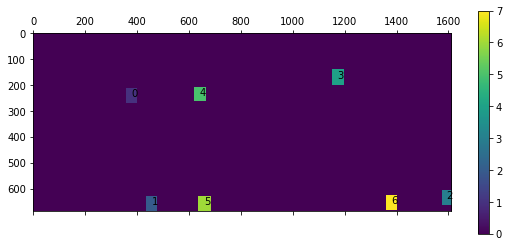

In [3]:
_ = imze.list_regions()

In [59]:
max(imze.mzValues)

30009.582432568535

Start with prozessing the first region , region 0

In [9]:
spectra0_orig = imze.get_region_array(0, makeNullLine=True)
spectra0_intra = imze.normalize_region_array(spectra0_orig, normalize="intra_median")
spectra0 = imze.normalize_region_array(spectra0_intra, normalize="inter_median")

Fetching region range
Fetching region shape
Found region 0 with shape (45, 59, 17900)
Fetching region spectra
100% |########################################################################|
100% |########################################################################|
Started Log Value: 0.14000733569264412
100% |########################################################################|
Got 2655 median-enabled pixels
5-Number stats for medians: (2655, 2655, 0.2905536462232088, 0.5712127712945096, 0.6654297160132764, 0.7571640240536153, 1.119313296797138)
Started Log Value: 0.21725614592432976
100% |########################################################################|
Got a total of 47524500 fold changes
Median elements [23762250]
Median elements
Global Median 0.64579


In [6]:
spectra1_orig = imze.get_region_array(1, makeNullLine=True)
spectra1_intra = imze.normalize_region_array(spectra1_orig, normalize="intra_median")
spectra1 = imze.normalize_region_array(spectra1_intra, normalize="inter_median")

Fetching region range
Fetching region shape
Found region 1 with shape (43, 56, 17900)
Fetching region spectra
100% |########################################################################|
100% |########################################################################|
Started Log Value: 0.17063884288072587
100% |########################################################################|
Got 2408 median-enabled pixels
5-Number stats for medians: (2408, 2408, 0.3039763115205163, 0.5889737648019792, 0.6580512343895084, 0.7246390240951075, 1.0161616910876121)
Started Log Value: 0.2648863598704338
100% |########################################################################|
Got a total of 43103200 fold changes
Median elements [21551600]
Median elements
Global Median 0.64556


Started Log Value: 0.14000733569264412
Pixel (5, 30): (17900, 17378, 0.0, 0.3000152855836411, 0.5135824924264395, 0.7344595654119753, 2.2611690493488)
Pixel (10, 30): (17900, 17415, 0.0, 0.39868049486880436, 0.6664889512482384, 0.9484701114184119, 3.3750518583494378)
Pixel (20, 30): (17900, 17383, 0.0, 0.30503601128090446, 0.5314185949485604, 0.7923220497239329, 6.235906349286949)
Pixel (25, 30): (17900, 17428, 0.0, 0.3950999459189633, 0.6885953705312867, 1.0240869960679142, 9.995899992013957)
Pixel (35, 30): (17900, 17418, 0.0, 0.4646819976734369, 0.7766157701380663, 1.1079077863432891, 3.830067904466957)
Pixel (40, 30): (17900, 17481, 0.0, 0.46623002417433723, 0.7784697915953906, 1.1195665739896818, 2.987418624579341)


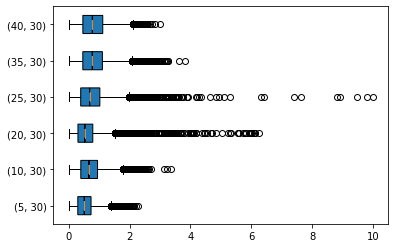

In [7]:
imze.plot_fcs(spectra0_orig, [(5,30),(10,30),(20,30),(25,30),(35,30),(40,30)])

Started Log Value: 0.21725614592432976
Pixel (5, 30): (17900, 17378, 0.0, 0.37675724844892067, 0.6453180876809363, 0.9261143633247905, 2.831509828912601)
Pixel (10, 30): (17900, 17415, 0.0, 0.3856033876806081, 0.6457432895466224, 0.9189111654645739, 3.336080855033527)
Pixel (20, 30): (17900, 17383, 0.0, 0.3701320966161331, 0.6460637676616463, 0.9644029829947063, 7.795461219782701)
Pixel (25, 30): (17900, 17428, 0.0, 0.37031708224993964, 0.6447782875497908, 0.9626202807074953, 9.664760037736253)
Pixel (35, 30): (17900, 17418, 0.0, 0.38559963415332804, 0.6451473899885882, 0.9213887462593586, 3.263557276825085)
Pixel (40, 30): (17900, 17481, 0.0, 0.3861231456557213, 0.6451822294317222, 0.9298251075901888, 2.45048607225067)


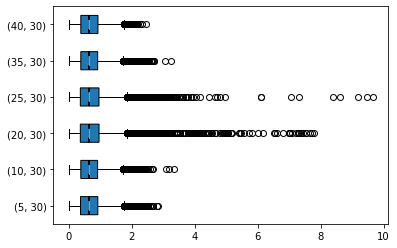

In [8]:
imze.plot_fcs(spectra0_intra, [(5,30),(10,30),(20,30),(25,30),(35,30),(40,30)])

Started Log Value: 0.3364191856862599
Pixel (5, 30): (17900, 17378, 0.0, 0.37675724844892067, 0.6453180876809363, 0.9261143633247904, 2.831509828912601)
Pixel (10, 30): (17900, 17415, 0.0, 0.38560338768060815, 0.6457432895466224, 0.9189111654645739, 3.336080855033527)
Pixel (20, 30): (17900, 17383, 0.0, 0.3701320966161331, 0.6460637676616463, 0.9644029829947063, 7.795461219782701)
Pixel (25, 30): (17900, 17428, 0.0, 0.37031708224993964, 0.6447782875497907, 0.9626202807074953, 9.664760037736254)
Pixel (35, 30): (17900, 17418, 0.0, 0.385599634153328, 0.6451473899885881, 0.9213887462593586, 3.263557276825085)
Pixel (40, 30): (17900, 17481, 0.0, 0.38612314565572137, 0.6451822294317222, 0.9298251075901889, 2.45048607225067)


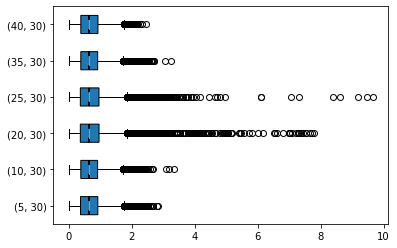

In [9]:
imze.plot_fcs(spectra0, [(5,30),(10,30),(20,30),(25,30),(35,30),(40,30)])

Started Log Value: 0.17063884288072587
Pixel (5, 30): (17900, 17392, 0.0, 0.28143266150713453, 0.46666477704943293, 0.671020570198586, 3.0481045450800455)
Pixel (10, 30): (17900, 17440, 0.0, 0.42338556277023276, 0.7149961931907834, 1.0190457174065637, 2.8927352113010523)
Pixel (20, 30): (17900, 17405, 0.0, 0.31021863347897666, 0.5293111750469717, 0.7750455076113096, 7.9786457932683135)
Pixel (25, 30): (17900, 17430, 0.0, 0.3844426277731959, 0.6502268785645964, 0.9530765679916557, 4.5151675253395345)
Pixel (35, 30): (17900, 17421, 0.0, 0.332916761761625, 0.5561829978292923, 0.7813345322713304, 2.646756292530384)
Pixel (40, 30): (17900, 17426, 0.0, 0.4260299237761488, 0.7368415904314141, 1.071674533592446, 3.213438587303454)


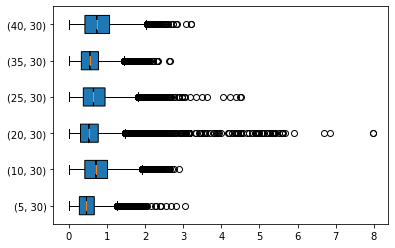

In [10]:
imze.plot_fcs(spectra1_orig, [(5,30),(10,30),(20,30),(25,30),(35,30),(40,30)])

Started Log Value: 0.2648863598704338
Pixel (5, 30): (17900, 17392, 0.0, 0.3892705359761788, 0.6467499934087995, 0.9269501125579998, 4.222170019528735)
Pixel (10, 30): (17900, 17440, 0.0, 0.38157493567832057, 0.6449443638642706, 0.9198495374666621, 2.6203658737841895)
Pixel (20, 30): (17900, 17405, 0.0, 0.37842562592529916, 0.6454877237708321, 0.9478771701190776, 9.734213650794924)
Pixel (25, 30): (17900, 17430, 0.0, 0.38097820053501863, 0.6443538964010982, 0.947805845389959, 4.487116618164834)
Pixel (35, 30): (17900, 17421, 0.0, 0.3869009187217882, 0.6461813799377314, 0.9084339047891007, 3.0700399978463206)
Pixel (40, 30): (17900, 17426, 0.0, 0.3726824206803851, 0.6454569260193321, 0.93867117495063, 2.851782815704191)


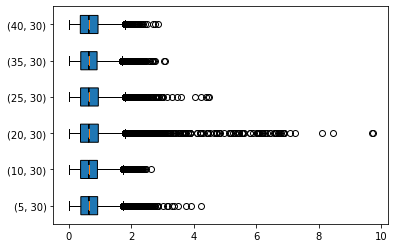

In [11]:
imze.plot_fcs(spectra1_intra, [(5,30),(10,30),(20,30),(25,30),(35,30),(40,30)])

Started Log Value: 0.4103202798662151
Pixel (5, 30): (17900, 17392, 0.0, 0.3892705359761787, 0.6467499934087995, 0.9269501125579998, 4.222170019528736)
Pixel (10, 30): (17900, 17440, 0.0, 0.38157493567832057, 0.6449443638642706, 0.9198495374666622, 2.6203658737841895)
Pixel (20, 30): (17900, 17405, 0.0, 0.37842562592529916, 0.6454877237708321, 0.9478771701190776, 9.734213650794924)
Pixel (25, 30): (17900, 17430, 0.0, 0.3809782005350187, 0.6443538964010982, 0.9478058453899592, 4.487116618164834)
Pixel (35, 30): (17900, 17421, 0.0, 0.3869009187217882, 0.6461813799377314, 0.9084339047891007, 3.0700399978463206)
Pixel (40, 30): (17900, 17426, 0.0, 0.3726824206803851, 0.6454569260193321, 0.93867117495063, 2.8517828157041913)


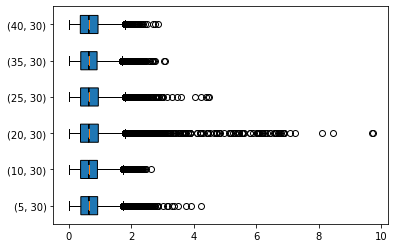

In [12]:
imze.plot_fcs(spectra1, [(5,30),(10,30),(20,30),(25,30),(35,30),(40,30)])

We can now ensure that the normalized spectra are indeed comparable.

Where are the highest peaks? This may give a hint on whether or not a normalization by max intensity would also have worked. => here: most probably yes!

3454.87441091502 39
3456.383544128344 278
3457.8926773416683 2332
4965.516757452595 2
14980.124761072322 2
14981.633894285647 2


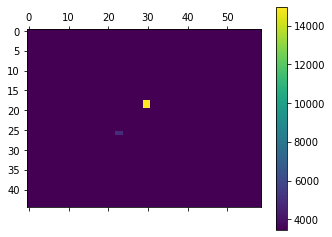

2655 45.060471276429595 282.8224196423905 133.18045036950951


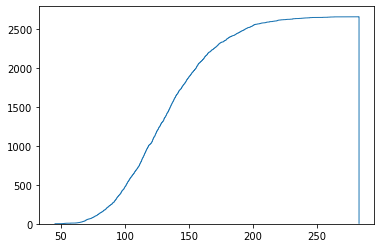

In [13]:
imze.list_highest_peaks(spectra0, counter=True)

Let's plot the norm of each spectrum

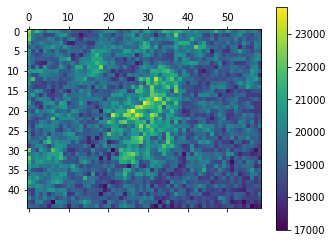

In [14]:
imze.plot_tic(spectra0)

It can be seen that the norm of the spectra differs. However, given that intensities should be comparable, and that there was sample everywhere => just continue

In [10]:
spec = SpectraRegion(spectra0, imze.mzValues)

In [11]:
spec.calculate_similarity(mode="spectra_log")

2020-12-13 13:32:25,420  SpectraRegion  INFO: dimensions inputarray: 17900
2020-12-13 13:32:25,421  SpectraRegion  INFO: Creating C++ obj
2020-12-13 13:32:25,421  SpectraRegion  INFO: 17900 (45, 59, 17900)
2020-12-13 13:32:25,422  SpectraRegion  INFO: dimensions 17900
2020-12-13 13:32:25,422  SpectraRegion  INFO: input dimensions (45, 59, 17900)
2020-12-13 13:32:25,423  SpectraRegion  INFO: Switching to dot mode
2020-12-13 13:32:25,487  SpectraRegion  INFO: Starting calc similarity c++
2020-12-13 13:32:34,734  SpectraRegion  INFO: outclust dimensions (2655, 2655)
2020-12-13 13:32:34,740  SpectraRegion  INFO: Calculating spectra similarity
2020-12-13 13:32:34,829  SpectraRegion  INFO: Calculating spectra similarity done


array([[1.        , 0.97618073, 0.9691782 , ..., 0.83840245, 0.8406169 ,
        0.85142994],
       [0.97618073, 1.        , 0.98342717, ..., 0.88986284, 0.8919327 ,
        0.90145195],
       [0.9691782 , 0.98342717, 1.        , ..., 0.90628433, 0.9039524 ,
        0.91665334],
       ...,
       [0.83840245, 0.88986284, 0.90628433, ..., 1.        , 0.9589327 ,
        0.96420807],
       [0.8406169 , 0.8919327 , 0.9039524 , ..., 0.9589327 , 1.        ,
        0.9649949 ],
       [0.85142994, 0.90145195, 0.91665334, ..., 0.96420807, 0.9649949 ,
        1.        ]], dtype=float32)

There are various (unsupervised) clustering techniques. Like UMAP+HDBSCAN

In [331]:
spec.segment(method="UMAP_DBSCAN", number_of_regions=15, min_cluster_size=9, num_samples=3000)

2020-12-14 17:05:05,631  SpectraRegion  INFO: Calculating clusters
2020-12-14 17:05:05,632  SpectraRegion  INFO: Elem Matrix of shape: (2655, 17900)
2020-12-14 17:05:05,729  SpectraRegion  INFO: UMAP reduction
2020-12-14 17:05:36,683  SpectraRegion  INFO: HDBSCAN reduction
2020-12-14 17:05:36,684  SpectraRegion  INFO: HDBSCAN reduction num_samples reset: 2655
2020-12-14 17:05:36,686  SpectraRegion  INFO: HDBSCAN Clusterer with matrix (2655, 2)
2020-12-14 17:05:36,754  SpectraRegion  INFO: HDBSCAN Soft Clusters with matrix (2655, 2)
2020-12-14 17:05:37,319  SpectraRegion  INFO: HDBSCAN Soft Clusters as output matrix (2655, 61)
2020-12-14 17:05:37,320  SpectraRegion  INFO: HDBSCAN Soft Clusters: (2655, 61)
2020-12-14 17:05:37,321  SpectraRegion  INFO: HDBSCAN Labeling
2020-12-14 17:05:37,328  SpectraRegion  INFO: Cluster Reduction for UMAP Result
2020-12-14 17:05:37,329  SpectraRegion  INFO: Cluster Reduction
2020-12-14 17:05:37,329  SpectraRegion  INFO: Calculating consensus spectra
202

[[5.79291214e-07 9.99924282e-01 4.37104186e-06 ... 1.03181176e-06
  1.29626119e-06 1.23519056e-06]
 [0.00000000e+00 9.99999999e-01 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [2.34805778e-04 9.87873146e-02 4.98649923e-02 ... 1.65625440e-03
  2.09304923e-03 1.98503426e-03]
 ...
 [9.36885327e-06 2.42800789e-03 2.53236478e-03 ... 5.51570684e-03
  5.52172446e-03 6.87937883e-03]
 [5.66011931e-48 1.96255999e-46 2.04495422e-46 ... 1.20086369e-02
  1.17557667e-02 1.48347541e-02]
 [4.85431658e-25 1.74983859e-23 1.83504530e-23 ... 1.21711041e-02
  1.23605638e-02 1.55668363e-02]]


2020-12-14 17:05:48,545  SpectraRegion  INFO: Calculating clusters done
2020-12-14 17:05:48,560  SpectraRegion  INFO: Calculating clusters saved


array([[15, 15, 15, ..., 11, 11, 11],
       [15, 12, 12, ..., 10, 11, 14],
       [15, 12, 11, ...,  8, 11, 14],
       ...,
       [15, 12, 11, ..., 14, 14, 11],
       [15, 12, 11, ..., 14, 14, 11],
       [12, 11, 11, ..., 11, 11, 11]], dtype=int16)

In [336]:
spec.redo_hdbscan_on_dimred(number_of_regions=15, min_cluster_size=10, num_samples=3000)

2020-12-14 17:06:58,659  SpectraRegion  INFO: HDBSCAN reduction
2020-12-14 17:06:58,660  SpectraRegion  INFO: HDBSCAN reduction num_samples reset: 2655
2020-12-14 17:06:58,662  SpectraRegion  INFO: HDBSCAN Clusterer with matrix (2655, 2)
2020-12-14 17:06:58,746  SpectraRegion  INFO: HDBSCAN Soft Clusters with matrix (2655, 2)
2020-12-14 17:06:59,225  SpectraRegion  INFO: HDBSCAN Soft Clusters as output matrix (2655, 51)
2020-12-14 17:06:59,226  SpectraRegion  INFO: HDBSCAN Soft Clusters: (2655, 51)
2020-12-14 17:06:59,226  SpectraRegion  INFO: HDBSCAN Labeling
2020-12-14 17:06:59,232  SpectraRegion  INFO: Cluster Reduction for UMAP Result
2020-12-14 17:06:59,232  SpectraRegion  INFO: Cluster Reduction
2020-12-14 17:06:59,233  SpectraRegion  INFO: Calculating consensus spectra
2020-12-14 17:06:59,265  SpectraRegion  INFO: Setting consensus spectra
2020-12-14 17:06:59,265  SpectraRegion  INFO: Calculating consensus spectra done


[[0.00000000e+00 9.99999999e-01 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 9.99999999e-01 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [1.17912603e-20 1.29405079e-01 6.29230346e-02 ... 2.47537269e-18
  2.27006344e-18 2.30304051e-18]
 ...
 [7.29580702e-15 4.90146488e-03 5.12025543e-03 ... 8.30158394e-03
  6.69769691e-03 7.28063776e-03]
 [1.79707035e-34 3.27301466e-33 3.41544118e-33 ... 1.78423365e-02
  1.45656655e-02 1.57431901e-02]
 [1.12853853e-21 2.13794430e-20 2.24549614e-20 ... 1.88732717e-02
  1.48266207e-02 1.62704296e-02]]


In [19]:
len(spec.dimred_labels)

2655

2020-12-14 17:08:32,647  SpectraRegion  INFO: Pixels    : 2655
2020-12-14 17:08:32,649  SpectraRegion  INFO: Unassigned: 0


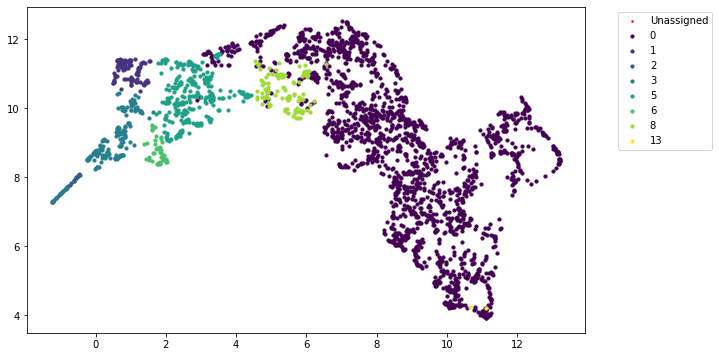

In [341]:
mpl.rcParams['figure.figsize'] = (10,6)
spec.vis_umap(legend=True)
mpl.rcParams['figure.figsize'] = (6,4)

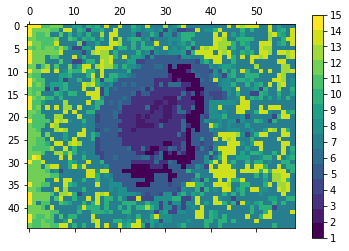

In [338]:
spec.plot_segments()

In [339]:
spec.filter_clusters(method='merge_background', bg_x=5, bg_y=5)
spec.filter_clusters(method='remove_singleton')
spec.filter_clusters(method='remove_islands')

2020-12-14 17:08:22,103  SpectraRegion  INFO: Assigning clusters to background: {4, 7, 9, 10, 11, 12, 14, 15}


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int16)

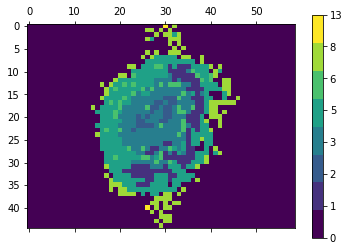

In [340]:
spec.plot_segments()

In [342]:
spec.set_background(8)

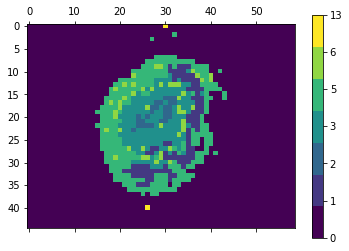

In [343]:
spec.plot_segments()

Which may or may not work well - more robustly, and maybe faster is a classic clustering of the similarity scores:

In [344]:
spec.segment(method="WARD", number_of_regions=15)

2020-12-14 17:42:21,433  SpectraRegion  INFO: Calculating clusters
2020-12-14 17:42:21,561  SpectraRegion  INFO: Calculating clusters done
2020-12-14 17:42:21,578  SpectraRegion  INFO: Calculating clusters saved


array([[6, 6, 6, ..., 2, 2, 4],
       [6, 6, 7, ..., 2, 4, 4],
       [6, 6, 7, ..., 1, 4, 4],
       ...,
       [6, 6, 6, ..., 4, 4, 4],
       [6, 6, 6, ..., 4, 4, 4],
       [6, 6, 7, ..., 4, 4, 4]], dtype=int16)

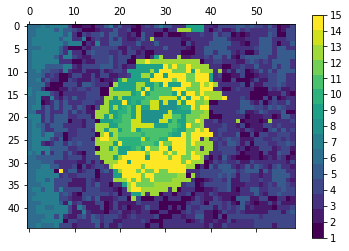

In [345]:
spec.plot_segments()

In [346]:
spec.filter_clusters(method='remove_singleton')
spec.filter_clusters(method='merge_background')
spec.filter_clusters(method='remove_islands')

2020-12-14 17:42:24,963  SpectraRegion  INFO: Assigning clusters to background: {1, 2, 3, 4, 5, 6, 7}


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int16)

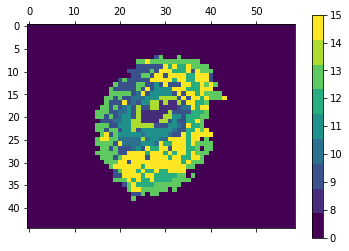

In [347]:
spec.plot_segments()

A manual curation of the segmentation is still possible!

In [348]:
spec.segmented[0:6,] = 0

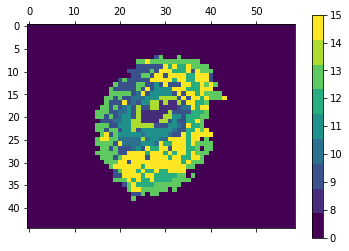

In [349]:
spec.plot_segments()

In [32]:
help(np.save)

Help on function save in module numpy:

save(file, arr, allow_pickle=True, fix_imports=True)
    Save an array to a binary file in NumPy ``.npy`` format.
    
    Parameters
    ----------
    file : file, str, or pathlib.Path
        File or filename to which the data is saved.  If file is a file-object,
        then the filename is unchanged.  If file is a string or Path, a ``.npy``
        extension will be appended to the filename if it does not already
        have one.
    arr : array_like
        Array data to be saved.
    allow_pickle : bool, optional
        Allow saving object arrays using Python pickles. Reasons for disallowing
        pickles include security (loading pickled data can execute arbitrary
        code) and portability (pickled objects may not be loadable on different
        Python installations, for example if the stored objects require libraries
        that are not available, and not all pickled data is compatible between
        Python 2 and Python 3).
  

In [33]:
with open("slided_0.spectra.npy", 'wb') as f:
    np.save(f, spectra0)
    
with open("slided_0.mzval.npy", 'wb') as f:
    np.save(f, imze.mzValues)
    
with open("slided_0.segments.npy", 'wb') as f:
    np.save(f, spec.segmented)

In [34]:
with open('slided_0.spectra.npy', 'rb') as f:
    spectra0 = np.load(f)
    
with open('slided_0.mzval.npy', 'rb') as f:
    mzValues = np.load(f)
    
with open('slided_0.segments.npy', 'rb') as f:
    segmented = np.load(f)

Consensus Analysis

In [355]:
spec.consensus

{0: array([0.67580456, 0.67580456, 0.67580456, ..., 0.28381686, 0.28381686,
        0.28381686]),
 9: array([0.65775871, 0.65775871, 0.65775871, ..., 0.3040875 , 0.3040875 ,
        0.3040875 ]),
 13: array([0.57613317, 0.57613317, 0.57613317, ..., 0.32186837, 0.32186837,
        0.32186837]),
 15: array([0.59695091, 0.59695091, 0.59695091, ..., 0.31012577, 0.31012577,
        0.31012577]),
 12: array([0.75340538, 0.75340538, 0.75340538, ..., 0.28799026, 0.28799026,
        0.28799026]),
 11: array([1.03077652, 1.03077652, 1.03077652, ..., 0.27485947, 0.27485947,
        0.27485947]),
 10: array([0.64412435, 0.64412435, 0.64412435, ..., 0.26182433, 0.26182433,
        0.26182433]),
 14: array([0.79604846, 0.79604846, 0.79604846, ..., 0.22558753, 0.22558753,
        0.22558753]),
 8: array([0.92792216, 0.92792216, 0.92792216, ..., 0.25138255, 0.25138255,
        0.25138255])}

In [350]:
spec.consensus_spectra()

2020-12-14 17:42:37,429  SpectraRegion  INFO: Calculating consensus spectra
2020-12-14 17:42:37,461  SpectraRegion  INFO: Setting consensus spectra
2020-12-14 17:42:37,462  SpectraRegion  INFO: Calculating consensus spectra done


{0: array([0.67580456, 0.67580456, 0.67580456, ..., 0.28381686, 0.28381686,
        0.28381686]),
 9: array([0.65775871, 0.65775871, 0.65775871, ..., 0.3040875 , 0.3040875 ,
        0.3040875 ]),
 13: array([0.57613317, 0.57613317, 0.57613317, ..., 0.32186837, 0.32186837,
        0.32186837]),
 15: array([0.59695091, 0.59695091, 0.59695091, ..., 0.31012577, 0.31012577,
        0.31012577]),
 12: array([0.75340538, 0.75340538, 0.75340538, ..., 0.28799026, 0.28799026,
        0.28799026]),
 11: array([1.03077652, 1.03077652, 1.03077652, ..., 0.27485947, 0.27485947,
        0.27485947]),
 10: array([0.64412435, 0.64412435, 0.64412435, ..., 0.26182433, 0.26182433,
        0.26182433]),
 14: array([0.79604846, 0.79604846, 0.79604846, ..., 0.22558753, 0.22558753,
        0.22558753]),
 8: array([0.92792216, 0.92792216, 0.92792216, ..., 0.25138255, 0.25138255,
        0.25138255])}

In [351]:
spec.consensus_similarity()

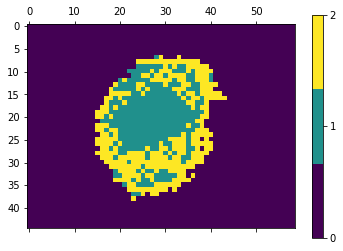

In [362]:
spec.plot_segments(highlight=[15,13])

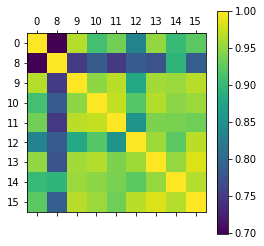

In [358]:
spec.plot_consensus_similarity()

2020-12-13 13:22:20,025  SpectraRegion  INFO: Found clusterLabels [0, 8, 9, 10, 11, 12, 13, 14, 15]
2020-12-13 13:22:20,026  SpectraRegion  INFO: Processing clusterLabel 0
2020-12-13 13:22:20,556  SpectraRegion  INFO: Processing clusterLabel 8
2020-12-13 13:22:20,557  SpectraRegion  INFO: Processing clusterLabel 9
2020-12-13 13:22:20,559  SpectraRegion  INFO: Processing clusterLabel 10
2020-12-13 13:22:20,560  SpectraRegion  INFO: Processing clusterLabel 11
2020-12-13 13:22:20,561  SpectraRegion  INFO: Processing clusterLabel 12
2020-12-13 13:22:20,562  SpectraRegion  INFO: Processing clusterLabel 13
2020-12-13 13:22:20,565  SpectraRegion  INFO: Processing clusterLabel 14
2020-12-13 13:22:20,565  SpectraRegion  INFO: Processing clusterLabel 15


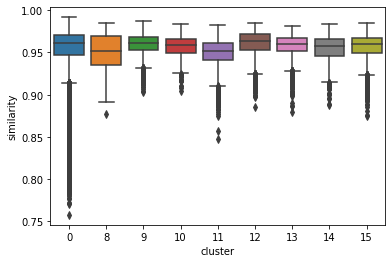

In [38]:
spec.plot_consensus_similarity(mode="spectra")

All clusters hare a 95% similarity in median. Cluster 0 (background) is the most heterogeneous one.

In [39]:
#spec.plot_inter_consensus_similarity()

2020-12-13 13:22:21,709  SpectraRegion  INFO: Processing Mass 12478 with best existing mass 12477.981893380715


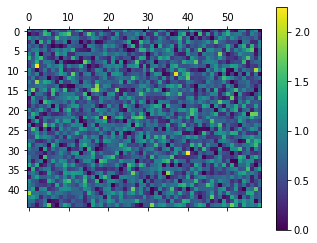

array([[0.89098611, 0.42600214, 0.63789896, ..., 0.84346678, 1.08623662,
        0.03814456],
       [0.        , 0.30615459, 0.20707593, ..., 0.98815546, 0.76648459,
        0.39656919],
       [1.14467647, 0.76193964, 0.86135823, ..., 0.49728898, 0.78187405,
        0.28662613],
       ...,
       [1.08764609, 1.26740949, 0.95459563, ..., 1.08937334, 0.59542704,
        0.6711442 ],
       [0.82855809, 0.81543693, 0.37041644, ..., 1.1150713 , 0.0438142 ,
        0.63432558],
       [0.68790783, 0.48452746, 0.14090304, ..., 1.03100806, 0.84850002,
        1.37623054]])

In [40]:
spec.mass_heatmap(12478)
#dfobj = spec.mass_dabest(12476)

2020-12-13 13:22:21,835  SpectraRegion  INFO: Processing Mass 14195 with best existing mass 14195.375490143713


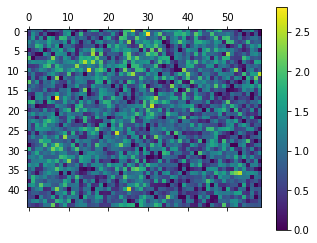

2020-12-13 13:22:21,945  SpectraRegion  INFO: Processing Mass 14195 with best existing mass 14195.375490143713


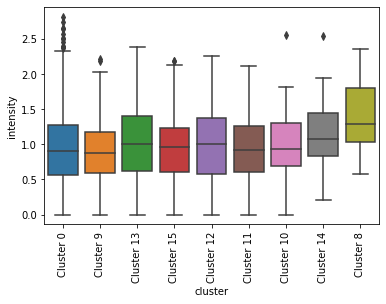

/usr/local/lib/python3.8/dist-packages/IPython/core/pylabtools.py:132: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


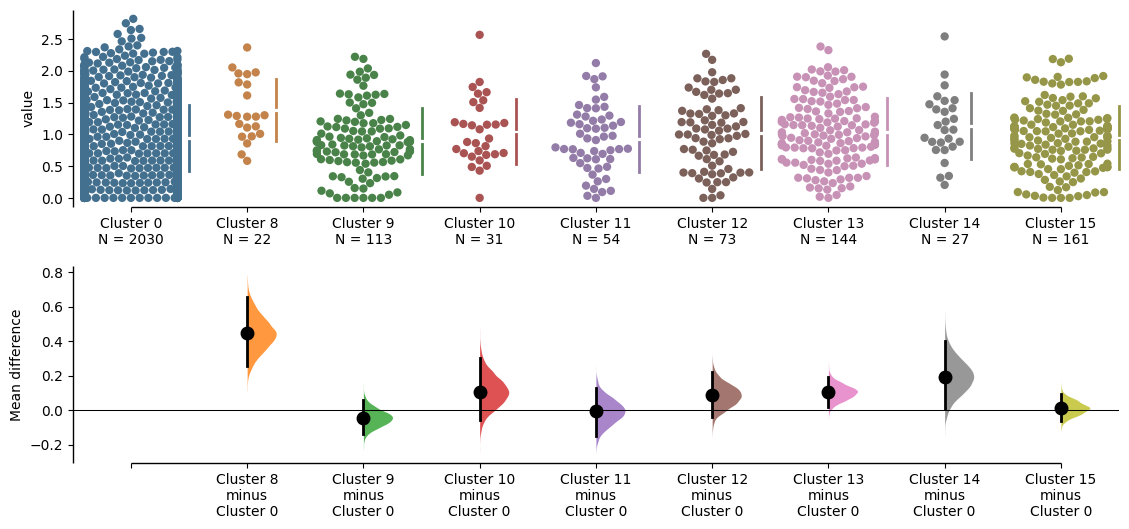

In [41]:
spec.mass_heatmap(14195)
dfobj = spec.mass_dabest(14195)

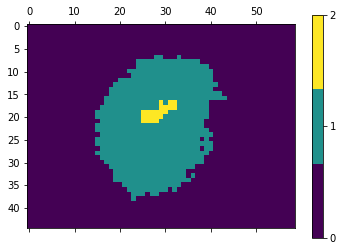

In [42]:
spec.plot_segments(highlight=[8])

# Differential Analysis

One of the stand-alone features of pyIMS is the integration with differential expression analysis. Here several key-features are presented.

First, single masses are looked at:

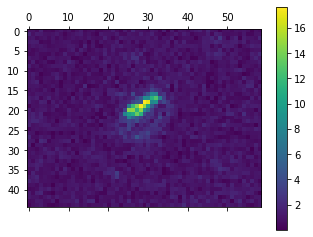

array([[0.82385149, 0.86264522, 0.49721109, ..., 0.24492729, 0.86041828,
        0.65921243],
       [1.87043287, 0.78807366, 1.3411693 , ..., 0.4120491 , 0.9107944 ,
        1.00745731],
       [0.95879405, 1.16647921, 0.54069431, ..., 0.90882606, 0.74983204,
        1.82300519],
       ...,
       [1.20795686, 0.93115886, 0.90644756, ..., 0.73014098, 1.17134226,
        1.13743474],
       [0.62210889, 0.69715361, 1.27652689, ..., 1.65667113, 0.7134432 ,
        1.15874405],
       [0.26637443, 0.77544398, 1.02433959, ..., 0.29809782, 0.75653545,
        1.09764161]])

In [43]:
spec.mass_heatmap(14954, min_cut_off=0.0025)

In [363]:
pw_theo.get_protein_from_mass(14954)

[('Ifitm3', 14954.185999999994), ('Tnfrsf12a', 14952.97469999999)]

In [364]:
pw_theo.get_masses_for_protein("Ifitm3")

{14954.185999999994}

The mass with m/z-value 14954 apparently is most active within the aorta structure (center of the image). Is this specific to a specific cluster

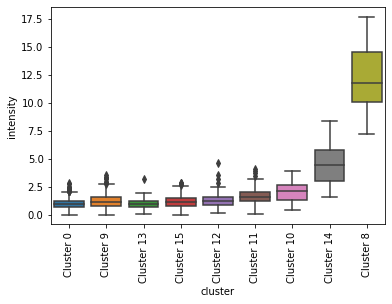

/usr/local/lib/python3.8/dist-packages/IPython/core/pylabtools.py:132: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


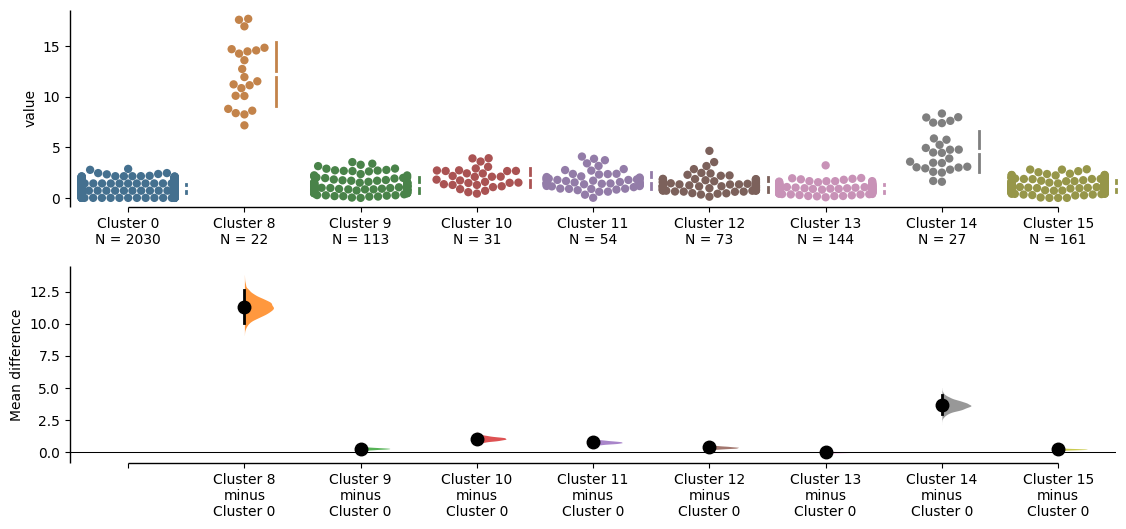

In [44]:
dfobj = spec.mass_dabest(14954)

The DABEST-Plot also clearly reveals that in contrast to the background, cluster 8 intensity values for this mass are quite higher than for all other clusters.

Abviously this mass is most intense in Cluster 8, but also cluster 14. We can now take a look at this mass by setting cluster 14 as reference cluster

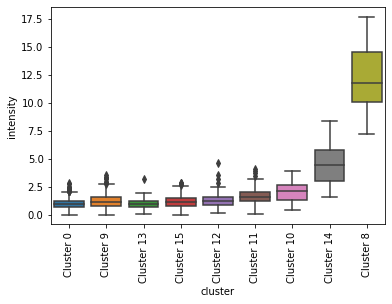

/usr/local/lib/python3.8/dist-packages/IPython/core/pylabtools.py:132: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


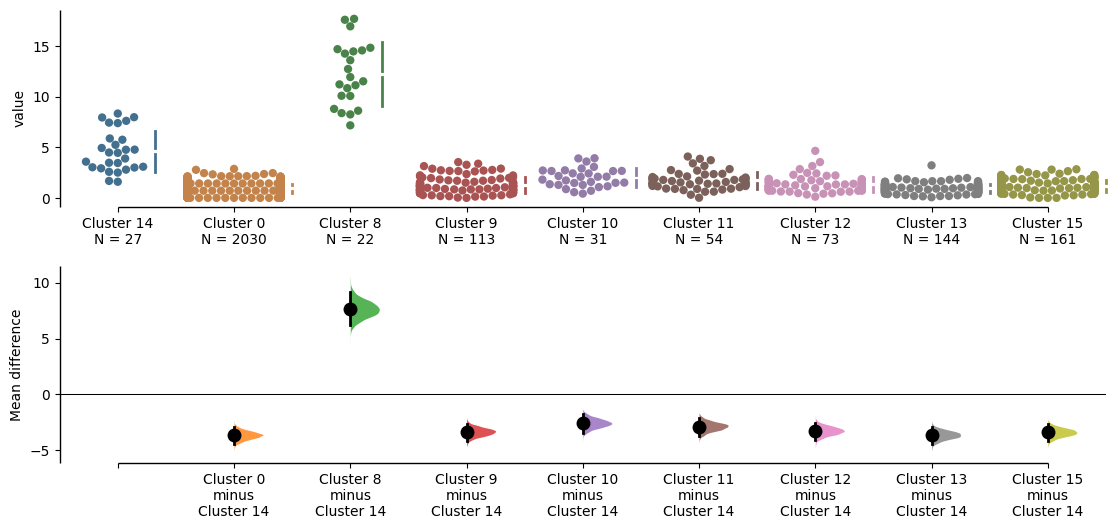

In [45]:
spec.mass_dabest(14954, background=14)

Not knowing where this cluster 8 is, we can highlight it specifically:

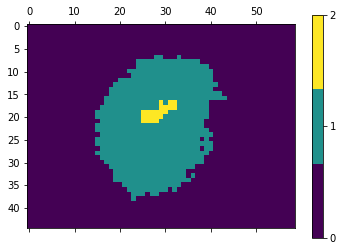

In [46]:
spec.plot_segments(highlight=8)

Or together with cluster 14, where this mass is also prevalent.

On a sidenote: background is set to 0, other regions == 1, and the target region is set to 2

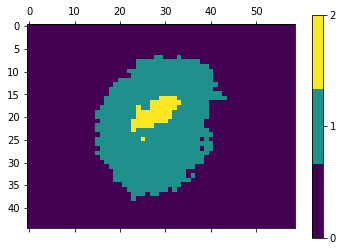

In [52]:
spec.plot_segments(highlight=[8,14])

Just for the sake of clarity: we now remove all differential expression results!

In [53]:
spec.clear_de_results()

## Protein m/z to name

For any combination of sequencing results with these IMS analyses, knowing which protein was measured is of interest.

Using a previously performed LC-MS/MS experiment, which delivers detected proteins together with the masses, allows an easy translation of m/z values to protein name.
This work is done in the ProteinWeights object.

In [4]:
pw_theo = ProteinWeights("protein_weights.theo.tsv", max_mass=30010)

2021-01-27 09:32:41,122  ProteinWeights  INFO: Loaded a total of 7283 proteins with 10191 masses


In [5]:
pw_theo.print_collisions(print_proteins=False)

2021-01-27 09:32:43,555  ProteinWeights  INFO:          Number of total proteins: 7283
2021-01-27 09:32:43,556  ProteinWeights  INFO:            Number of total masses: 10191
2021-01-27 09:32:43,556  ProteinWeights  INFO: Number of proteins with collision: 6316
2021-01-27 09:32:43,558  ProteinWeights  INFO:         Mean Number of collisions: 2.8738125395820138
2021-01-27 09:32:43,560  ProteinWeights  INFO:       Median Number of collisions: 2.0
2021-01-27 09:32:43,561  ProteinWeights  INFO: Proteins with collision: [('Mbp', 30), ('Crem', 25), ('Homer1', 18), ('Clta', 18), ('Eif4e2', 18), ('U2af1l4', 16), ('Tspan32', 16), ('Tpd52', 16), ('Asph', 16), ('Hmga1', 15)]


In [6]:
pw_theo.print_collisions(maxdist=1.0, print_proteins=False)

2021-01-27 09:32:45,241  ProteinWeights  INFO:          Number of total proteins: 7283
2021-01-27 09:32:45,242  ProteinWeights  INFO:            Number of total masses: 10191
2021-01-27 09:32:45,242  ProteinWeights  INFO: Number of proteins with collision: 4881
2021-01-27 09:32:45,243  ProteinWeights  INFO:         Mean Number of collisions: 1.9096496619545176
2021-01-27 09:32:45,245  ProteinWeights  INFO:       Median Number of collisions: 2.0
2021-01-27 09:32:45,246  ProteinWeights  INFO: Proteins with collision: [('Mbp', 19), ('Spcs2', 11), ('Tpd52', 11), ('Erh', 10), ('Crem', 10), ('Vps25', 10), ('Ifi27', 10), ('Nudt7', 10), ('Clta', 10), ('Eif4e2', 10)]


With the m/z->protein object we can now find all marker masses for the 15 detected regions

For example we can also try to find out, which protein corresponds to mass 14954 ! (it's Ifitm3 ...)

In [7]:
pw_theo.get_protein_from_mass(14954)

[('Ifitm3', 14954.185999999994), ('Tnfrsf12a', 14952.97469999999)]

In [8]:
spec.plot_segments()

NameError: name 'spec' is not defined

2020-12-13 13:37:28,482  SpectraRegion  INFO: Processing Mass 15271.877899999985 with best existing mass 15271.387471243903


15271.877899999985 [('Il11', 15271.877899999985)]


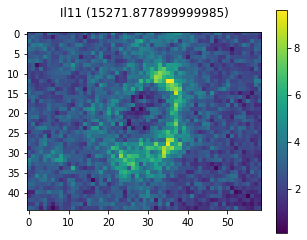

2020-12-13 13:37:28,587  SpectraRegion  INFO: Processing Mass 14107.345999999974 with best existing mass 14107.845763770905


14107.345999999974 [('Il13', 14107.345999999974), ('Tnfrsf18', 14106.149199999985)]


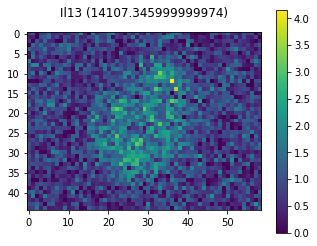

2020-12-13 13:37:28,702  SpectraRegion  INFO: Processing Mass 10167.716399999996 with best existing mass 10167.498943781287


10167.716399999996 [('Ccl4', 10167.716399999996), ('Rad54b', 10169.499699999991)]


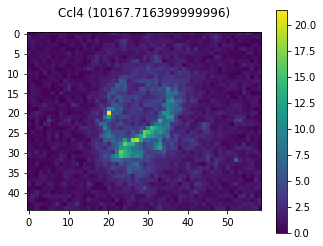

2020-12-13 13:37:28,814  SpectraRegion  INFO: Processing Mass 10254.250199999993 with best existing mass 10253.51953694077


10254.250199999993 [('Cxcl1', 10254.250199999993)]


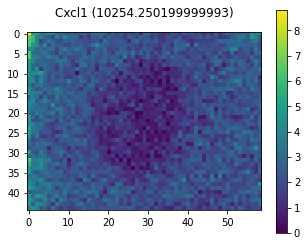

2020-12-13 13:37:28,928  SpectraRegion  INFO: Processing Mass 21899.871200000005 with best existing mass 21899.500544164013


21899.871200000005 [('Il18bp', 21899.871200000005), ('Psmb1', 21900.825699999972)]


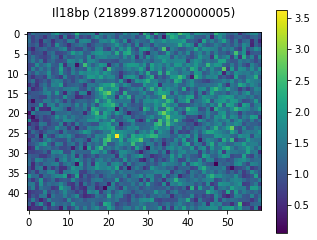

2020-12-13 13:37:29,040  SpectraRegion  INFO: Processing Mass 11199.70799999999 with best existing mass 11199.746061695076


11199.70799999999 [('Il31', 11199.70799999999), ('Ss18l2', 11201.606299999994)]


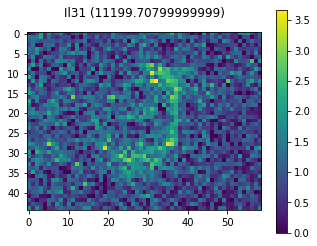

2020-12-13 13:37:29,160  SpectraRegion  INFO: Processing Mass 18119.635499999997 with best existing mass 18119.121844786765


18119.635499999997 [('Il31', 18119.635499999997), ('Tpo', 18119.2567)]


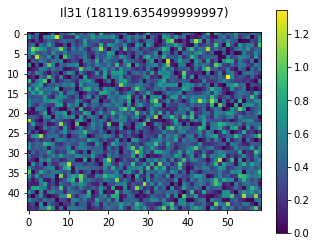

In [24]:
for y in pw_theo.protein2mass:
    
    if not y in ["Il11","Il13","Ccl4","Cxcl1","Il18bp","Il31"]:
        continue
    
    for x in pw_theo.get_masses_for_protein(y):
        massprots = pw_theo.get_protein_from_mass(x)
        
        if len(massprots) <= 2:
            print(x, massprots)
            spec.mass_heatmap(x, title=y+" ({mz})")
            
            

2020-12-14 19:10:22,350  SpectraRegion  INFO: Processing Mass 21522.116500000004 with best existing mass 21522.21724083295
2020-12-14 19:10:22,359  SpectraRegion  INFO: Processing Mass 15271.877899999985 with best existing mass 15271.387471243903


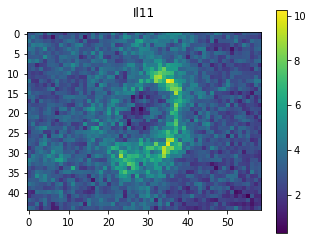

In [365]:
_ = spec.mass_heatmap("Il11", pw=pw_theo)

In [368]:
pw_theo.get_protein_from_mass(15271)

[('Il11', 15271.877899999985)]

2020-12-14 19:10:45,175  SpectraRegion  INFO: Processing Mass 15271 with best existing mass 15271.387471243903


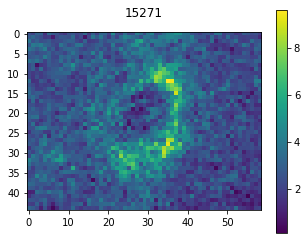

In [367]:
_ = spec.mass_heatmap(15271, pw=pw_theo)

Marker masses/proteins/genes are genes which are differentially regulated when compared to the specific cluster and all other clusters (including or excluding the background cluster).

Making the distinction regarding the background cluster might be required if the target tissue is embedded in another tissue. Excluding the background might then deliver more sensitive results.

In [25]:
mgenes = spec.find_all_markers(pw_theo, includeBackground=False, backgroundCluster=[0],
                               replaceExisting=False,
                               outdirectory="./deresults/",
                               use_methods=["ttest"]) #, "rank"

2020-12-13 13:40:11,090  SpectraRegion  INFO: DE data for case: [9]
2020-12-13 13:40:11,091  SpectraRegion  INFO: DE data for control: [13, 15, 12, 11, 10, 14, 8]
2020-12-13 13:40:11,091  SpectraRegion  INFO: Running [9] against [13, 15, 12, 11, 10, 14, 8]
2020-12-13 13:40:11,092  SpectraRegion  INFO: DE result key: ((9,), (8, 10, 11, 12, 13, 14, 15))
100% |########################################################################|
100% |########################################################################|
100% |########################################################################|
100% |########################################################################|
100% |########################################################################|
100% |########################################################################|
100% |########################################################################|
100% |########################################################################|
2020-1

In [26]:
spec.list_de_results()

[('ttest', ((9,), (8, 10, 11, 12, 13, 14, 15))),
 ('ttest', ((13,), (8, 9, 10, 11, 12, 14, 15))),
 ('ttest', ((15,), (8, 9, 10, 11, 12, 13, 14))),
 ('ttest', ((12,), (8, 9, 10, 11, 13, 14, 15))),
 ('ttest', ((11,), (8, 9, 10, 12, 13, 14, 15))),
 ('ttest', ((10,), (8, 9, 11, 12, 13, 14, 15))),
 ('ttest', ((14,), (8, 9, 10, 11, 12, 13, 15))),
 ('ttest', ((8,), (9, 10, 11, 12, 13, 14, 15)))]

In [27]:
for x in spec.df_results_all:
    for y in spec.df_results_all[x]:
        if x != "ttest":
            continue
        
        print(x,y)
        
        spec.export_deres(x, y, "./deresults/deres.{}.{}.html".format("_".join([str(j) for j in y[0]]), "_".join([str(j) for j in y[1]])))
        

2020-12-13 13:42:47,037  SpectraRegion  INFO: Fetching Mass Heatmaps for all 115 required masses


ttest ((9,), (8, 10, 11, 12, 13, 14, 15))


2020-12-13 13:43:01,010  SpectraRegion  INFO: Adding Mass Heatmap at pos 3 of 15 with 303 entries
2020-12-13 13:43:01,011  SpectraRegion  INFO: Got Columns: [('clusterID', '"string"'), ('gene_ident', '"string"'), ('gene_mass', '"number"'), ('Mass Heatmap', '"string"'), ('gene', '"string"'), ('protein_mass', '"number"'), ('avg_logFC', '"number"'), ('qvalue', '"number"'), ('num', '"number"'), ('anum', '"number"'), ('mean', '"number"'), ('median', '"number"'), ('num_bg', '"number"'), ('anum_bg', '"number"'), ('mean_bg', '"number"'), ('median_bg', '"number"')]
2020-12-13 13:43:01,753  SpectraRegion  INFO: copy tablefilter files from ../pIMZ/tablefilter to ./deresults/tablefilter
2020-12-13 13:43:03,466  SpectraRegion  INFO: Fetching Mass Heatmaps for all 510 required masses


ttest ((13,), (8, 9, 10, 11, 12, 14, 15))


2020-12-13 13:43:55,894  SpectraRegion  INFO: Adding Mass Heatmap at pos 3 of 15 with 1247 entries
2020-12-13 13:43:55,896  SpectraRegion  INFO: Got Columns: [('clusterID', '"string"'), ('gene_ident', '"string"'), ('gene_mass', '"number"'), ('Mass Heatmap', '"string"'), ('gene', '"string"'), ('protein_mass', '"number"'), ('avg_logFC', '"number"'), ('qvalue', '"number"'), ('num', '"number"'), ('anum', '"number"'), ('mean', '"number"'), ('median', '"number"'), ('num_bg', '"number"'), ('anum_bg', '"number"'), ('mean_bg', '"number"'), ('median_bg', '"number"')]
2020-12-13 13:43:58,146  SpectraRegion  INFO: copy tablefilter files from ../pIMZ/tablefilter to ./deresults/tablefilter
2020-12-13 13:43:59,705  SpectraRegion  INFO: Fetching Mass Heatmaps for all 171 required masses


ttest ((15,), (8, 9, 10, 11, 12, 13, 14))


2020-12-13 13:44:18,711  SpectraRegion  INFO: Adding Mass Heatmap at pos 3 of 15 with 433 entries
2020-12-13 13:44:18,713  SpectraRegion  INFO: Got Columns: [('clusterID', '"string"'), ('gene_ident', '"string"'), ('gene_mass', '"number"'), ('Mass Heatmap', '"string"'), ('gene', '"string"'), ('protein_mass', '"number"'), ('avg_logFC', '"number"'), ('qvalue', '"number"'), ('num', '"number"'), ('anum', '"number"'), ('mean', '"number"'), ('median', '"number"'), ('num_bg', '"number"'), ('anum_bg', '"number"'), ('mean_bg', '"number"'), ('median_bg', '"number"')]
2020-12-13 13:44:19,723  SpectraRegion  INFO: copy tablefilter files from ../pIMZ/tablefilter to ./deresults/tablefilter
2020-12-13 13:44:21,241  SpectraRegion  INFO: Fetching Mass Heatmaps for all 582 required masses


ttest ((12,), (8, 9, 10, 11, 13, 14, 15))


2020-12-13 13:45:18,091  SpectraRegion  INFO: Adding Mass Heatmap at pos 3 of 15 with 1450 entries
2020-12-13 13:45:18,093  SpectraRegion  INFO: Got Columns: [('clusterID', '"string"'), ('gene_ident', '"string"'), ('gene_mass', '"number"'), ('Mass Heatmap', '"string"'), ('gene', '"string"'), ('protein_mass', '"number"'), ('avg_logFC', '"number"'), ('qvalue', '"number"'), ('num', '"number"'), ('anum', '"number"'), ('mean', '"number"'), ('median', '"number"'), ('num_bg', '"number"'), ('anum_bg', '"number"'), ('mean_bg', '"number"'), ('median_bg', '"number"')]
2020-12-13 13:45:20,387  SpectraRegion  INFO: copy tablefilter files from ../pIMZ/tablefilter to ./deresults/tablefilter
2020-12-13 13:45:21,876  SpectraRegion  INFO: Fetching Mass Heatmaps for all 1006 required masses


ttest ((11,), (8, 9, 10, 12, 13, 14, 15))


2020-12-13 13:46:51,275  SpectraRegion  INFO: Adding Mass Heatmap at pos 3 of 15 with 2264 entries
2020-12-13 13:46:51,277  SpectraRegion  INFO: Got Columns: [('clusterID', '"string"'), ('gene_ident', '"string"'), ('gene_mass', '"number"'), ('Mass Heatmap', '"string"'), ('gene', '"string"'), ('protein_mass', '"number"'), ('avg_logFC', '"number"'), ('qvalue', '"number"'), ('num', '"number"'), ('anum', '"number"'), ('mean', '"number"'), ('median', '"number"'), ('num_bg', '"number"'), ('anum_bg', '"number"'), ('mean_bg', '"number"'), ('median_bg', '"number"')]
2020-12-13 13:46:53,714  SpectraRegion  INFO: copy tablefilter files from ../pIMZ/tablefilter to ./deresults/tablefilter
2020-12-13 13:46:55,273  SpectraRegion  INFO: Fetching Mass Heatmaps for all 243 required masses


ttest ((10,), (8, 9, 11, 12, 13, 14, 15))


2020-12-13 13:47:15,145  SpectraRegion  INFO: Adding Mass Heatmap at pos 3 of 15 with 610 entries
2020-12-13 13:47:15,147  SpectraRegion  INFO: Got Columns: [('clusterID', '"string"'), ('gene_ident', '"string"'), ('gene_mass', '"number"'), ('Mass Heatmap', '"string"'), ('gene', '"string"'), ('protein_mass', '"number"'), ('avg_logFC', '"number"'), ('qvalue', '"number"'), ('num', '"number"'), ('anum', '"number"'), ('mean', '"number"'), ('median', '"number"'), ('num_bg', '"number"'), ('anum_bg', '"number"'), ('mean_bg', '"number"'), ('median_bg', '"number"')]
2020-12-13 13:47:16,433  SpectraRegion  INFO: copy tablefilter files from ../pIMZ/tablefilter to ./deresults/tablefilter
2020-12-13 13:47:17,848  SpectraRegion  INFO: Fetching Mass Heatmaps for all 588 required masses


ttest ((14,), (8, 9, 10, 11, 12, 13, 15))


2020-12-13 13:48:10,667  SpectraRegion  INFO: Adding Mass Heatmap at pos 3 of 15 with 1521 entries
2020-12-13 13:48:10,668  SpectraRegion  INFO: Got Columns: [('clusterID', '"string"'), ('gene_ident', '"string"'), ('gene_mass', '"number"'), ('Mass Heatmap', '"string"'), ('gene', '"string"'), ('protein_mass', '"number"'), ('avg_logFC', '"number"'), ('qvalue', '"number"'), ('num', '"number"'), ('anum', '"number"'), ('mean', '"number"'), ('median', '"number"'), ('num_bg', '"number"'), ('anum_bg', '"number"'), ('mean_bg', '"number"'), ('median_bg', '"number"')]
2020-12-13 13:48:12,795  SpectraRegion  INFO: copy tablefilter files from ../pIMZ/tablefilter to ./deresults/tablefilter
2020-12-13 13:48:14,214  SpectraRegion  INFO: Fetching Mass Heatmaps for all 1592 required masses


ttest ((8,), (9, 10, 11, 12, 13, 14, 15))


2020-12-13 13:50:22,659  SpectraRegion  INFO: Adding Mass Heatmap at pos 3 of 15 with 3953 entries
2020-12-13 13:50:22,661  SpectraRegion  INFO: Got Columns: [('clusterID', '"string"'), ('gene_ident', '"string"'), ('gene_mass', '"number"'), ('Mass Heatmap', '"string"'), ('gene', '"string"'), ('protein_mass', '"number"'), ('avg_logFC', '"number"'), ('qvalue', '"number"'), ('num', '"number"'), ('anum', '"number"'), ('mean', '"number"'), ('median', '"number"'), ('num_bg', '"number"'), ('anum_bg', '"number"'), ('mean_bg', '"number"'), ('median_bg', '"number"')]
2020-12-13 13:50:25,325  SpectraRegion  INFO: copy tablefilter files from ../pIMZ/tablefilter to ./deresults/tablefilter


In [32]:
mgenes_bg = spec.find_all_markers(pw_theo, includeBackground=True, replaceExisting=False, use_methods = ["ttest"])#, "rank"

2020-12-13 14:20:03,093  SpectraRegion  INFO: DE data for case: [0]
2020-12-13 14:20:03,094  SpectraRegion  INFO: DE data for control: [9, 13, 15, 12, 11, 10, 14, 8]
2020-12-13 14:20:03,094  SpectraRegion  INFO: Running [0] against [9, 13, 15, 12, 11, 10, 14, 8]
2020-12-13 14:20:03,095  SpectraRegion  INFO: DE result key: ((0,), (8, 9, 10, 11, 12, 13, 14, 15))
100% |########################################################################|
100% |########################################################################|
100% |########################################################################|
100% |########################################################################|
100% |########################################################################|
100% |########################################################################|
100% |########################################################################|
100% |#######################################################################

In [35]:
def judge_de_masses(so, row):
    prot = row["gene"]
    mass = float(row["gene_mass"])
    massIdx = spec.idx_for_mass(mass)

    bgMass = spec.consensus[0][massIdx]
    allMedianMasses = [spec.consensus[x][massIdx] for x in sorted(spec.consensus)]
    allMedienPercs = sorted([abs((x/bgMass)-1.0) for x in allMedianMasses if not x == bgMass])
    
    
    if max(allMedianMasses) == bgMass and allMedienPercs[0] > 0.1: #  and 
        #print(prot, mass,bgMass, allMedienPercs[0], allMedianMasses)
        return False
    
    return True

spec.judge_de_masses( judge_de_masses )

2020-12-13 14:23:32,571  SpectraRegion  INFO: Judging results from ttest and comparison ((9,), (8, 10, 11, 12, 13, 14, 15))
2020-12-13 14:23:34,371  SpectraRegion  INFO: Storing results from ttest and comparison ((9,), (8, 10, 11, 12, 13, 14, 15)) (position 3)
2020-12-13 14:23:34,371  SpectraRegion  INFO: Judging results from ttest and comparison ((13,), (8, 9, 10, 11, 12, 14, 15))
2020-12-13 14:23:41,590  SpectraRegion  INFO: Storing results from ttest and comparison ((13,), (8, 9, 10, 11, 12, 14, 15)) (position 3)
2020-12-13 14:23:41,591  SpectraRegion  INFO: Judging results from ttest and comparison ((15,), (8, 9, 10, 11, 12, 13, 14))
2020-12-13 14:23:44,188  SpectraRegion  INFO: Storing results from ttest and comparison ((15,), (8, 9, 10, 11, 12, 13, 14)) (position 3)
2020-12-13 14:23:44,188  SpectraRegion  INFO: Judging results from ttest and comparison ((12,), (8, 9, 10, 11, 13, 14, 15))
2020-12-13 14:23:52,887  SpectraRegion  INFO: Storing results from ttest and comparison ((12,

After both find_all_markers runs we can list all DE results, which are then printed.
Each row shows one contained DE results beginning with the test performed and then a tuple of two region/cluster IDs. In the first row here:

a t-test was performed on cluster 9 versus clusters 8,10,11,12,13,14,15 .

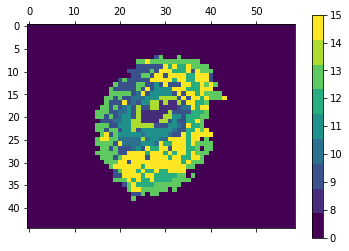

In [62]:
spec.plot_segments()

In [36]:
spec.list_de_results()

[('ttest', ((9,), (8, 10, 11, 12, 13, 14, 15))),
 ('ttest', ((13,), (8, 9, 10, 11, 12, 14, 15))),
 ('ttest', ((15,), (8, 9, 10, 11, 12, 13, 14))),
 ('ttest', ((12,), (8, 9, 10, 11, 13, 14, 15))),
 ('ttest', ((11,), (8, 9, 10, 12, 13, 14, 15))),
 ('ttest', ((10,), (8, 9, 11, 12, 13, 14, 15))),
 ('ttest', ((14,), (8, 9, 10, 11, 12, 13, 15))),
 ('ttest', ((8,), (9, 10, 11, 12, 13, 14, 15))),
 ('ttest', ((0,), (8, 9, 10, 11, 12, 13, 14, 15))),
 ('ttest', ((9,), (0, 8, 10, 11, 12, 13, 14, 15))),
 ('ttest', ((13,), (0, 8, 9, 10, 11, 12, 14, 15))),
 ('ttest', ((15,), (0, 8, 9, 10, 11, 12, 13, 14))),
 ('ttest', ((12,), (0, 8, 9, 10, 11, 13, 14, 15))),
 ('ttest', ((11,), (0, 8, 9, 10, 12, 13, 14, 15))),
 ('ttest', ((10,), (0, 8, 9, 11, 12, 13, 14, 15))),
 ('ttest', ((14,), (0, 8, 9, 10, 11, 12, 13, 15))),
 ('ttest', ((8,), (0, 9, 10, 11, 12, 13, 14, 15)))]

It's also easy to save the result to disk:

In [37]:
markerGenes = pd.DataFrame()

for comp in spec.df_results_all["ttest"]:
    
    if 0 in comp[0] or 0 in comp[1]:
        print("skip", comp)
        continue
    
    resDF = spec.df_results_all["ttest"][comp]
    resDF = resDF.loc[resDF.de_judge == True,]
    markerGenes = pd.concat([markerGenes, resDF], sort=False)

markerGenes.to_csv("deresults/marker_genes.tsv", sep="\t", index=False)

skip ((0,), (8, 9, 10, 11, 12, 13, 14, 15))
skip ((9,), (0, 8, 10, 11, 12, 13, 14, 15))
skip ((13,), (0, 8, 9, 10, 11, 12, 14, 15))
skip ((15,), (0, 8, 9, 10, 11, 12, 13, 14))
skip ((12,), (0, 8, 9, 10, 11, 13, 14, 15))
skip ((11,), (0, 8, 9, 10, 12, 13, 14, 15))
skip ((10,), (0, 8, 9, 11, 12, 13, 14, 15))
skip ((14,), (0, 8, 9, 10, 11, 12, 13, 15))
skip ((8,), (0, 9, 10, 11, 12, 13, 14, 15))


In [38]:
markerGenes

clusterID               gene_ident     gene_mass  de_judge    gene  \
0            9   mass_3447_328744848399   3447.328745      True   Fxyd3   
1            9   mass_3448_837878061723   3448.837878      True   Fxyd3   
6            9   mass_3456_383544128344   3456.383544      True   Rpl41   
7            9  mass_3457_8926773416683   3457.892677      True   Rpl41   
8            9  mass_3536_3676044345293   3536.367604      True  Ggnbp1   
...        ...                      ...           ...       ...     ...   
3948         8   mass_29947_70797082224  29947.707971      True  Capn10   
3949         8  mass_29949_217104035568  29949.217104      True  Exosc8   
3950         8  mass_29949_217104035568  29949.217104      True  Tollip   
3951         8   mass_29950_72623724889  29950.726237      True  Exosc8   
3952         8   mass_29950_72623724889  29950.726237      True  Tollip   

      protein_mass  avg_logFC        qvalue  num  anum        mean  \
0        3450.0089   0.515087  5.697727e-14  113   113    5.209013   
1        3450.0089   0.548282  6.445610e-16  113   113    5.374649   
6        3456.3183   0.540669  4.165329e-30  113   113  131.544631   
7        3456.3183   0.513741  1.361453e-27  113   113  152.614760   
8        3538.0160   0.523572  1.479116e-13  113   113    4.065103   
...            ...        ...           ...  ...   ...         ...   
3948    29946.0126   0.759363  4.251159e-03   22    22    0.532271   
3949    29948.9162   0.692339  1.219412e-02   22    22    0.512144   
3950    29948.0327   0.692339  1.219412e-02   22    22    0.512144   
3951    29948.9162   0.638204  2.212891e-02   22    22    0.499968   
3952    29948.0327   0.638204  2.212891e-02   22    22    0.499968   

          median  num_bg  anum_bg     mean_bg   median_bg  
0       5.202022     512      512    3.645011    3.657542  
1       5.412235     512      512    3.675370    3.560427  
6     123.444582     512      512   90.430570   89.349045  
7     144.543150     512      512  106.891950  104.068272  
8       4.047986     512      512    2.827879    2.793763  
...          ...     ...      ...         ...         ...  
3948    0.524174     603      564    0.314443    0.302384  
3949    0.526945     603      568    0.316940    0.297317  
3950    0.526945     603      568    0.316940    0.297317  
3951    0.485754     603      569    0.321236    0.290991  
3952    0.485754     603      569    0.321236    0.290991  

[9721 rows x 16 columns]

In [39]:
markerGenesBG = pd.DataFrame()

for comp in spec.df_results_all["ttest"]:
    if not (0 in comp[0] or 0 in comp[1]):
        continue
    
    resDF = spec.df_results_all["ttest"][comp]
    resDF = resDF.loc[resDF.de_judge == True,]
    markerGenesBG = pd.concat([markerGenesBG, resDF], sort=False)

markerGenesBG.to_csv("deresults/marker_genes_bg.tsv", sep="\t", index=False)

In [40]:
print("Number of unique, differentially detected proteins (from masses): {}".format(len(set(mgenes["ttest"]["gene"]))))

Number of unique, differentially detected proteins (from masses): 1769


In [41]:
print("Number of unique, differentially detected proteins (from masses): {}".format(len(set(mgenes_bg["ttest"]["gene"]))))

Number of unique, differentially detected proteins (from masses): 2709


In order to save the results, the SpectraRegion object can be pickled:

In [69]:
with open("slideD_region_0.spec.pickle", "wb") as fout:
    pickle.dump(spec, fout)

# Cell-type detection

Cell-type detection requires analyseMarkers.py from https://github.com/mjoppich/scrnaseq_celltype_prediction .

One (obvious) question is: what can I do with those marker proteins? Well, a lot!

First, these are the proteins which you are interested in: these define your clusters, because they are present.

Second, these proteins give a clue about which cell types might be present, if cell-type specific genes were found.

Using the scrnaseq-celltype-prediction tool, this can be analysed! Let's download it first (requires wget, python3 and several other libraries - maybe).
Did you know? This tool achieves better predictions than SingleR :)

Because we know what kind of sample we got (aorta embedded in liver), we can specify organs to specifically check for cell types.
Organs to be considered are "Connective tissue" "Vasculature" "Heart" "Skeletal Muscle" "Smooth muscle" "Immune system" "Blood" "Epithelium" "Liver".
This allows a context-specific evaluation!

In [70]:
! ls analyseMarkers.py

analyseMarkers.py


In [71]:
! wget https://raw.githubusercontent.com/mjoppich/scrnaseq_celltype_prediction/master/analyseMarkers.py

--2020-12-08 12:07:23--  https://raw.githubusercontent.com/mjoppich/scrnaseq_celltype_prediction/master/analyseMarkers.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.112.133
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.112.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 20292 (20K) [text/plain]
Saving to: ‘analyseMarkers.py.1’

analyseMarkers.py.1 100%[===================>]  19.82K  --.-KB/s    in 0.005s  

2020-12-08 12:07:24 (3.99 MB/s) - ‘analyseMarkers.py.1’ saved [20292/20292]



In [42]:
! python3 analyseMarkers.py --organs "Connective tissue" "Vasculature" "Heart" "Skeletal Muscle" "Smooth muscle" "Immune system" "Blood" "Epithelium" "Liver" --pvaladj qvalue --markers deresults/marker_genes.tsv -n 3

Taking value gene from gene
Taking value cluster from clusterID
Taking value logfc from avg_logFC
Taking value pvaladj from qvalue
Taking value expr-mean from mean
Taking value expressing-cell-count from num
Taking value cluster-cell-count from anum
Got 8 clusters.
Starting analysis
Loaded Databases
known genes 327
known (celltype, organ) 136
8	Monocytes;Immune system	7.024700643179011	4	6	2	2	{'IL1RN', 'IFITM3'}	{'IL1RN', 'IFITM3', 'LY6C1', 'RGS2'}
8	Endothelial cells;Vasculature	6.615677160578961	8	10	6	6	{'IFI27', 'RBP7', 'GLYCAM1', 'APLN', 'ELK3', 'CLIC4'}	{'IFI27', 'LY6C1', 'RBP7', 'GLYCAM1', 'APLN', 'ID1', 'ELK3', 'CLIC4'}
8	Hepatocytes;Liver	5.704189582427714	11	13	6	8	{'GRP', 'OCIAD1', 'MRPS18C', 'APOA5', 'ANG', 'TM7SF2'}	{'APOC3', 'OCIAD1', 'GRP', 'SLPI', 'SAT2', 'MRPS18C', 'HSD11B1', 'TTR', 'APOA5', 'TM7SF2', 'ANG'}
9	B cells;Immune system	0.36137190148268017	1	9	1	2	{'POLD4'}	{'POLD4'}
9	Basal cells;Epithelium	0.08356622137122802	2	5	1	2	{'HEBP2'}	{'S100A14', 'HEBP2'}
9	T me

In [52]:
! python3 analyseMarkers.py --organs "Connective tissue" "Vasculature" "Heart" "Skeletal Muscle" "Smooth muscle" "Immune system" "Blood" "Epithelium" --pvaladj qvalue --markers deresults/marker_genes_bg.tsv -n 3

Taking value gene from gene
Taking value cluster from clusterID
Taking value logfc from avg_logFC
Taking value pvaladj from qvalue
Taking value expr-mean from mean
Taking value expressing-cell-count from num
Taking value cluster-cell-count from anum
Got 9 clusters.
Starting analysis
Loaded Databases
known genes 493
known (celltype, organ) 147
0	Mast cells;Immune system	0.28310110562942586	5	16	1	5	{'SLC31A2'}	{'RGS13', 'PCP4L1', 'SLC31A2', 'FCER1A', 'IL4'}
0	Basophils;Immune system	0.1255634596929066	5	11	1	3	{'DEFB40'}	{'DEFB40', 'FCER1A', 'CCL4', 'CCL9', 'IL4'}
0	Basal cells;Epithelium	0.07815107601329994	3	6	1	3	{'HEBP2'}	{'S100A14', 'RAB38', 'HEBP2'}
8	Macrophages;Immune system	9.998087912449986	17	19	3	3	{'TYROBP', 'CD209F', 'HILPDA'}	{'CD209F', 'CCL9', 'TYROBP', 'SCIMP', 'CYTH4', 'WFDC17', 'CCL5', 'H2-DMA', 'CD209A', 'NMB', 'LY6C1', 'TREML4', 'CCL6', 'RAB7B', 'HILPDA', 'LGALS2', 'RETNLA'}
8	Smooth muscle cells;Smooth muscle	5.5771866552352005	8	12	3	4	{'SSPN', 'SEC24D', 'MSRB3'}	

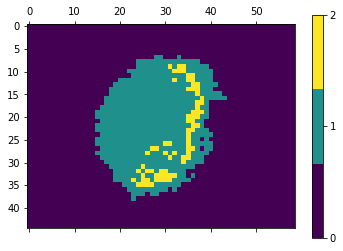

In [374]:
spec.plot_segments(highlight=[12])

2020-12-14 19:58:05,491  SpectraRegion  INFO: Processing Mass 20709.590600000018 with best existing mass 20710.303572064502


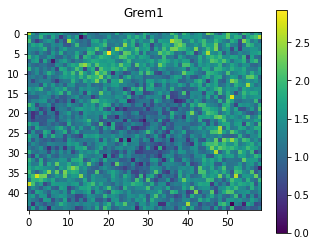

In [370]:
_ = spec.mass_heatmap("Grem1", pw=pw_theo)

This is quite interesting. For cluster 8 this tool predicts mainly monocytes or gamma delta t cells - cells which do not migrate into other tissues.

This makes sense, because one would expect these cell-types in the inner of the vessel.

H2AFX is known to be upregulated in lymphoblasts (check wikipedia ;) ).
Ifitm3 is highly expressed in both, Liver and Monocytes: https://www.proteinatlas.org/ENSG00000142089-IFITM3/tissue (Consensus dataset)spec.plot_segments(highlight=(10))

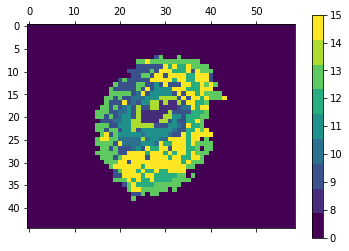

In [73]:
spec.plot_segments()

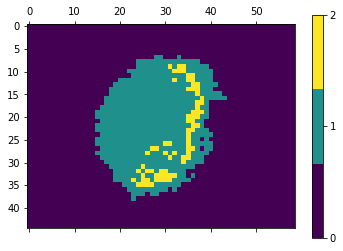

In [74]:
spec.plot_segments(highlight=(12))

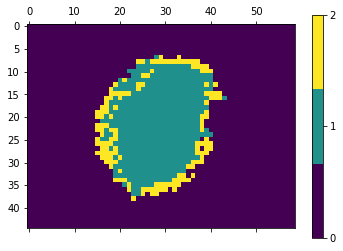

In [75]:
spec.plot_segments(highlight=(13))

In [76]:
! python3 analyseMarkers.py --organs "Connective tissue" "Vasculature" "Heart" "Skeletal Muscle" "Smooth muscle" "Immune system" "Blood" "Epithelium" "Liver" --pvaladj qvalue --markers deresults/marker_genes_bg.tsv -n 2

Taking value gene from gene
Taking value cluster from clusterID
Taking value logfc from avg_logFC
Taking value pvaladj from qvalue
Taking value expr-mean from mean
Taking value expressing-cell-count from num
Taking value cluster-cell-count from anum
Got 9 clusters.
Starting analysis
Loaded Databases
known genes 493
known (celltype, organ) 147
0	Mast cells;Immune system	0.28310110562942586	5	16	1	5	{'SLC31A2'}	{'PCP4L1', 'RGS13', 'FCER1A', 'IL4', 'SLC31A2'}
0	Basophils;Immune system	0.1255634596929066	5	11	1	3	{'DEFB40'}	{'DEFB40', 'FCER1A', 'IL4', 'CCL4', 'CCL9'}
8	Hepatocytes;Liver	20.2528741770176	13	17	8	10	{'OCIAD1', 'SLBP', 'APOA5', 'GRP', 'TM7SF2', 'ANG', 'APOA2', 'MRPS18C'}	{'OCIAD1', 'SLPI', 'TTR', 'HSD11B1', 'APOC3', 'SLBP', 'APOA5', 'GRP', 'SAT2', 'TM7SF2', 'ANG', 'APOA2', 'MRPS18C'}
8	Macrophages;Immune system	9.998087912449986	17	19	3	3	{'TYROBP', 'HILPDA', 'CD209F'}	{'H2-DMA', 'NMB', 'TREML4', 'RAB7B', 'CCL6', 'LGALS2', 'HILPDA', 'CYTH4', 'RETNLA', 'LY6C1', 'CD209A', 'WFDC

In this analysis, the background was kept in. More differential genes are found, but also more liver-related cell types are found.

This suggests that the analysis which includes the liver background has influenced the found differential proteins too much.

Nonetheless, the results remain consistent. For cluster 8, the missing monocytes are replaced by hepatocytes, which are monocyte-like cells residing in the liver.

Cluster 9 showing high amounds of cardiomyocytes is also not unlikely, given its location at the outer area of the aorta.

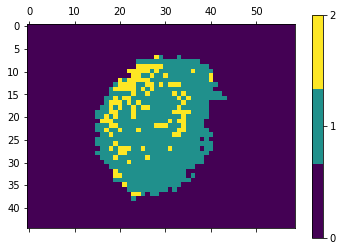

In [77]:
spec.plot_segments(highlight=(9))

Finally the SpectraRegion can also be exported to Aorta3D.

In [78]:
#spec.to_aorta3d("./slided_test/", "slided", 0, protWeights=pw, nodf=False, pathPrefix="../data/test_msi/")

In [79]:
!ls slided_test

slided.0.0.tsv	 slided.0.12.tsv  slided.0.15.tsv  slided.0.info
slided.0.10.tsv  slided.0.13.tsv  slided.0.8.tsv   slided.0.upgma.png
slided.0.11.tsv  slided.0.14.tsv  slided.0.9.tsv


# Preparations for CombinedSpectra - A comparative analysis

So far the results were only for one IMS sample.

Now the idea is to integrate multiple samples, in order to compare the different samples which were measured on the same slide.

Hence the remaining samples are processed, all in the same fashion. With the inter and intro normalization, the sample are made comparable.

In [12]:
# this uses theo!
pw = ProteinWeights("protein_weights.theo.tsv")

def judge_de_masses(spec, row):
    prot = row["gene"]
    mass = float(row["gene_mass"])
    massIdx = spec.idx_for_mass(mass)

    bgMass = spec.consensus[0][massIdx]
    allMedianMasses = [spec.consensus[x][massIdx] for x in sorted(spec.consensus)]
    allMedienPercs = sorted([abs((x/bgMass)-1.0) for x in allMedianMasses if not x == bgMass])
    
    
    if max(allMedianMasses) == bgMass and allMedienPercs[0] > 0.1: #  and 
        #print(prot, mass,bgMass, allMedienPercs[0], allMedianMasses)
        return False
    
    return True


def process_imzeregion(imze, regionID, basename):
    
    print("Processing regionID", regionID, "for basename", basename)
    
    spectra_orig = imze.get_region_array(regionID, makeNullLine=True)
    spectra_intra = imze.normalize_region_array(spectra_orig, normalize="intra_median")
    spectra = imze.normalize_region_array(spectra_intra, normalize="inter_median")
    
    rspec = SpectraRegion(spectra, imze.mzValues, name=basename + "_" + str(regionID))
    rspec.calculate_similarity(mode="spectra_log_dist")
    rspec.segment(method="WARD", number_of_regions=15)
    rspec.plot_segments()
    
    rspec.filter_clusters(method='remove_singleton')
    rspec.filter_clusters(method='merge_background')
    rspec.filter_clusters(method='remove_islands')
    rspec.filter_clusters(method='remove_islands', minIslandSize=15)
    rspec.plot_segments()
    
    rspec.consensus_spectra()
    #rspec.consensus_similarity()
    #rspec.plot_consensus_similarity()

    mgenes = rspec.find_all_markers(pw, includeBackground=False, replaceExisting=False, use_methods = ["ttest"])
    mgenes_bg = rspec.find_all_markers(pw, includeBackground=True, replaceExisting=False, use_methods = ["ttest"])
    
    rspec.judge_de_masses( judge_de_masses )

    
    markerGenes = pd.DataFrame()
    for comp in rspec.df_results_all["ttest"]:

        if 0 in comp[0] or 0 in comp[1]:
            print("skip", comp)
            continue

        resDF = rspec.df_results_all["ttest"][comp]
        resDF = resDF.loc[resDF.de_judge == True,]
        markerGenes = pd.concat([markerGenes, resDF], sort=False)
        

    markerGenesBG = pd.DataFrame()
    for comp in rspec.df_results_all["ttest"]:

        if not (0 in comp[0] or 0 in comp[1]):
            print("skip", comp)
            continue

        resDF = rspec.df_results_all["ttest"][comp]
        resDF = resDF.loc[resDF.de_judge == True,]
        markerGenesBG = pd.concat([markerGenesBG, resDF], sort=False)
    
    return rspec, markerGenes, markerGenesBG
    

2021-01-27 09:48:50,255  ProteinWeights  INFO: Loaded a total of 21506 proteins with 36368 masses
2021-01-27 09:48:50,255  ProteinWeights  INFO: Loaded a total of 21506 proteins with 36368 masses
2021-01-27 09:48:50,255  ProteinWeights  INFO: Loaded a total of 21506 proteins with 36368 masses
2021-01-27 09:48:50,255  ProteinWeights  INFO: Loaded a total of 21506 proteins with 36368 masses


First set the logging level to warn, to remove too many messages ...

In [81]:
#loggers = [logging.getLogger(name) for name in logging.root.manager.loggerDict]
#for logger in loggers:
#    logger.setLevel(logging.WARN)

Fetching region range
Fetching region shape
Found region 0 with shape (45, 59, 17900)
Fetching region spectra


Processing regionID 0 for basename slideD


100% |########################################################################|
100% |########################################################################|
Started Log Value: 0.14000733569264412
100% |########################################################################|
Got 2655 median-enabled pixels
5-Number stats for medians: (2655, 2655, 0.2905536462232088, 0.5712127712945096, 0.6654297160132764, 0.7571640240536153, 1.119313296797138)
Started Log Value: 0.21725614592432976
100% |########################################################################|
Got a total of 47524500 fold changes
Median elements [23762250]
Median elements
Global Median 0.64579
2021-01-27 09:49:18,633  SpectraRegion  INFO: dimensions inputarray: 17900
2021-01-27 09:49:18,634  SpectraRegion  INFO: Creating C++ obj
2021-01-27 09:49:18,635  SpectraRegion  INFO: 17900 (45, 59, 17900)
2021-01-27 09:49:18,635  SpectraRegion  INFO: dimensions 17900
2021-01-27 09:49:18,635  SpectraRegion  INFO: input dimensio

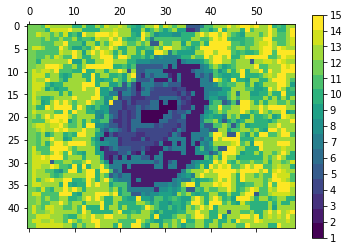

2021-01-27 09:50:02,027  SpectraRegion  INFO: Assigning clusters to background: {10, 11, 12, 13, 14, 15}


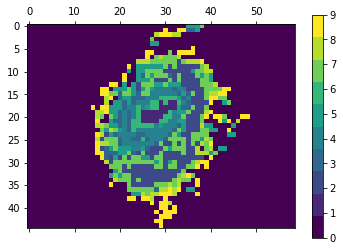

2021-01-27 09:50:02,124  SpectraRegion  INFO: Calculating consensus spectra
2021-01-27 09:50:02,156  SpectraRegion  INFO: Setting consensus spectra
2021-01-27 09:50:02,156  SpectraRegion  INFO: Calculating consensus spectra done
2021-01-27 09:50:02,159  SpectraRegion  INFO: DE data for case: [5]
2021-01-27 09:50:02,159  SpectraRegion  INFO: DE data for control: [7, 9, 3, 8, 2, 4, 6, 1]
2021-01-27 09:50:02,160  SpectraRegion  INFO: Running [5] against [7, 9, 3, 8, 2, 4, 6, 1]
2021-01-27 09:50:02,160  SpectraRegion  INFO: DE result key: ((5,), (1, 2, 3, 4, 6, 7, 8, 9))
100% |########################################################################|
100% |########################################################################|
100% |########################################################################|
100% |########################################################################|
100% |########################################################################|
100% |####################

skip ((0,), (1, 2, 3, 4, 5, 6, 7, 8, 9))
skip ((5,), (0, 1, 2, 3, 4, 6, 7, 8, 9))
skip ((7,), (0, 1, 2, 3, 4, 5, 6, 8, 9))
skip ((9,), (0, 1, 2, 3, 4, 5, 6, 7, 8))
skip ((3,), (0, 1, 2, 4, 5, 6, 7, 8, 9))
skip ((8,), (0, 1, 2, 3, 4, 5, 6, 7, 9))
skip ((2,), (0, 1, 3, 4, 5, 6, 7, 8, 9))
skip ((4,), (0, 1, 2, 3, 5, 6, 7, 8, 9))
skip ((6,), (0, 1, 2, 3, 4, 5, 7, 8, 9))
skip ((1,), (0, 2, 3, 4, 5, 6, 7, 8, 9))
skip ((5,), (1, 2, 3, 4, 6, 7, 8, 9))
skip ((7,), (1, 2, 3, 4, 5, 6, 8, 9))
skip ((9,), (1, 2, 3, 4, 5, 6, 7, 8))
skip ((3,), (1, 2, 4, 5, 6, 7, 8, 9))
skip ((8,), (1, 2, 3, 4, 5, 6, 7, 9))
skip ((2,), (1, 3, 4, 5, 6, 7, 8, 9))
skip ((4,), (1, 2, 3, 5, 6, 7, 8, 9))
skip ((6,), (1, 2, 3, 4, 5, 7, 8, 9))
skip ((1,), (2, 3, 4, 5, 6, 7, 8, 9))
Processing regionID 1 for basename slideD


100% |########################################################################|
100% |########################################################################|
Started Log Value: 0.17063884288072587
100% |########################################################################|
Got 2408 median-enabled pixels
5-Number stats for medians: (2408, 2408, 0.3039763115205163, 0.5889737648019792, 0.6580512343895084, 0.7246390240951075, 1.0161616910876121)
Started Log Value: 0.2648863598704338
100% |########################################################################|
Got a total of 43103200 fold changes
Median elements [21551600]
Median elements
Global Median 0.64556
2021-01-27 10:00:24,326  SpectraRegion  INFO: dimensions inputarray: 17900
2021-01-27 10:00:24,327  SpectraRegion  INFO: Creating C++ obj
2021-01-27 10:00:24,327  SpectraRegion  INFO: 17900 (43, 56, 17900)
2021-01-27 10:00:24,328  SpectraRegion  INFO: dimensions 17900
2021-01-27 10:00:24,328  SpectraRegion  INFO: input dimensio

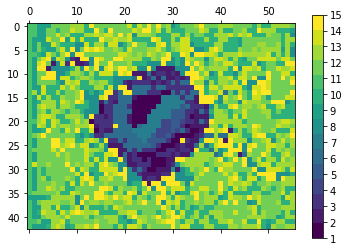

2021-01-27 10:01:00,238  SpectraRegion  INFO: Assigning clusters to background: {8, 9, 10, 11, 12, 13, 14}


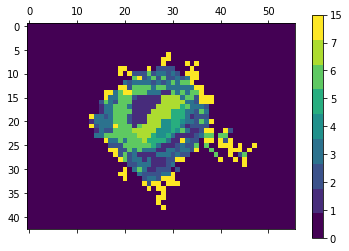

2021-01-27 10:01:00,340  SpectraRegion  INFO: Calculating consensus spectra
2021-01-27 10:01:00,370  SpectraRegion  INFO: Setting consensus spectra
2021-01-27 10:01:00,371  SpectraRegion  INFO: Calculating consensus spectra done
2021-01-27 10:01:00,373  SpectraRegion  INFO: DE data for case: [15]
2021-01-27 10:01:00,374  SpectraRegion  INFO: DE data for control: [2, 6, 3, 1, 7, 5, 4]
2021-01-27 10:01:00,375  SpectraRegion  INFO: Running [15] against [2, 6, 3, 1, 7, 5, 4]
2021-01-27 10:01:00,376  SpectraRegion  INFO: DE result key: ((15,), (1, 2, 3, 4, 5, 6, 7))
100% |########################################################################|
100% |########################################################################|
100% |########################################################################|
100% |########################################################################|
100% |########################################################################|
100% |##########################

skip ((0,), (1, 2, 3, 4, 5, 6, 7, 15))
skip ((15,), (0, 1, 2, 3, 4, 5, 6, 7))
skip ((2,), (0, 1, 3, 4, 5, 6, 7, 15))
skip ((6,), (0, 1, 2, 3, 4, 5, 7, 15))
skip ((3,), (0, 1, 2, 4, 5, 6, 7, 15))
skip ((1,), (0, 2, 3, 4, 5, 6, 7, 15))
skip ((7,), (0, 1, 2, 3, 4, 5, 6, 15))
skip ((5,), (0, 1, 2, 3, 4, 6, 7, 15))
skip ((4,), (0, 1, 2, 3, 5, 6, 7, 15))
skip ((15,), (1, 2, 3, 4, 5, 6, 7))
skip ((2,), (1, 3, 4, 5, 6, 7, 15))
skip ((6,), (1, 2, 3, 4, 5, 7, 15))
skip ((3,), (1, 2, 4, 5, 6, 7, 15))
skip ((1,), (2, 3, 4, 5, 6, 7, 15))
skip ((7,), (1, 2, 3, 4, 5, 6, 15))
skip ((5,), (1, 2, 3, 4, 6, 7, 15))
skip ((4,), (1, 2, 3, 5, 6, 7, 15))
Processing regionID 4 for basename slideD


100% |########################################################################|
100% |########################################################################|
Started Log Value: 0.22751572877168655
100% |########################################################################|
Got 2744 median-enabled pixels
5-Number stats for medians: (2744, 2744, 0.29120835853070265, 0.5888907621230302, 0.660637862228705, 0.7270544871043271, 0.9875144181541924)
Started Log Value: 0.3518995396792889
100% |########################################################################|
Got a total of 49117600 fold changes
Median elements [24558800]
Median elements
Global Median 0.64784
2021-01-27 10:08:50,032  SpectraRegion  INFO: dimensions inputarray: 17900
2021-01-27 10:08:50,033  SpectraRegion  INFO: Creating C++ obj
2021-01-27 10:08:50,034  SpectraRegion  INFO: 17900 (49, 56, 17900)
2021-01-27 10:08:50,034  SpectraRegion  INFO: dimensions 17900
2021-01-27 10:08:50,035  SpectraRegion  INFO: input dimensio

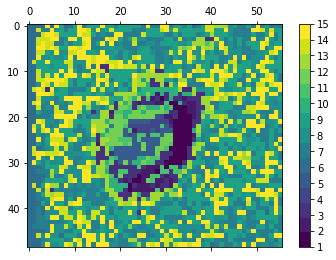

2021-01-27 10:09:36,244  SpectraRegion  INFO: Assigning clusters to background: {6, 7, 8, 9, 14, 15}


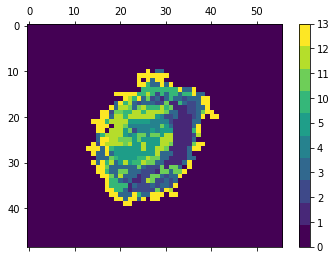

2021-01-27 10:09:36,330  SpectraRegion  INFO: Calculating consensus spectra
2021-01-27 10:09:36,363  SpectraRegion  INFO: Setting consensus spectra
2021-01-27 10:09:36,363  SpectraRegion  INFO: Calculating consensus spectra done
2021-01-27 10:09:36,366  SpectraRegion  INFO: DE data for case: [13]
2021-01-27 10:09:36,366  SpectraRegion  INFO: DE data for control: [3, 10, 12, 2, 11, 1, 5, 4]
2021-01-27 10:09:36,367  SpectraRegion  INFO: Running [13] against [3, 10, 12, 2, 11, 1, 5, 4]
2021-01-27 10:09:36,367  SpectraRegion  INFO: DE result key: ((13,), (1, 2, 3, 4, 5, 10, 11, 12))
100% |########################################################################|
100% |########################################################################|
100% |########################################################################|
100% |########################################################################|
100% |########################################################################|
100% |########

skip ((0,), (1, 2, 3, 4, 5, 10, 11, 12, 13))
skip ((13,), (0, 1, 2, 3, 4, 5, 10, 11, 12))
skip ((3,), (0, 1, 2, 4, 5, 10, 11, 12, 13))
skip ((10,), (0, 1, 2, 3, 4, 5, 11, 12, 13))
skip ((12,), (0, 1, 2, 3, 4, 5, 10, 11, 13))
skip ((2,), (0, 1, 3, 4, 5, 10, 11, 12, 13))
skip ((11,), (0, 1, 2, 3, 4, 5, 10, 12, 13))
skip ((1,), (0, 2, 3, 4, 5, 10, 11, 12, 13))
skip ((5,), (0, 1, 2, 3, 4, 10, 11, 12, 13))
skip ((4,), (0, 1, 2, 3, 5, 10, 11, 12, 13))
skip ((13,), (1, 2, 3, 4, 5, 10, 11, 12))
skip ((3,), (1, 2, 4, 5, 10, 11, 12, 13))
skip ((10,), (1, 2, 3, 4, 5, 11, 12, 13))
skip ((12,), (1, 2, 3, 4, 5, 10, 11, 13))
skip ((2,), (1, 3, 4, 5, 10, 11, 12, 13))
skip ((11,), (1, 2, 3, 4, 5, 10, 12, 13))
skip ((1,), (2, 3, 4, 5, 10, 11, 12, 13))
skip ((5,), (1, 2, 3, 4, 10, 11, 12, 13))
skip ((4,), (1, 2, 3, 5, 10, 11, 12, 13))
Processing regionID 5 for basename slideD


100% |########################################################################|
100% |########################################################################|
Started Log Value: 0.22961045652627946
100% |########################################################################|
Got 3068 median-enabled pixels
5-Number stats for medians: (3068, 3068, 0.3318104865334491, 0.5890882557317825, 0.6596343025206233, 0.728007829747179, 0.9846777519403345)
Started Log Value: 0.35571027994155885
100% |########################################################################|
Got a total of 54917200 fold changes
Median elements [27458600]
Median elements
Global Median 0.64714
2021-01-27 10:20:36,626  SpectraRegion  INFO: dimensions inputarray: 17900
2021-01-27 10:20:36,627  SpectraRegion  INFO: Creating C++ obj
2021-01-27 10:20:36,628  SpectraRegion  INFO: 17900 (52, 59, 17900)
2021-01-27 10:20:36,628  SpectraRegion  INFO: dimensions 17900
2021-01-27 10:20:36,628  SpectraRegion  INFO: input dimensio

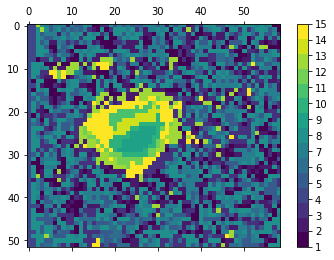

2021-01-27 10:21:35,307  SpectraRegion  INFO: Assigning clusters to background: {1, 2, 3, 4, 5, 6, 7, 8, 13}


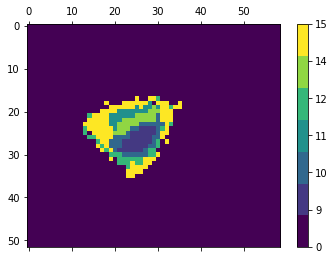

2021-01-27 10:21:35,389  SpectraRegion  INFO: Calculating consensus spectra
2021-01-27 10:21:35,425  SpectraRegion  INFO: Setting consensus spectra
2021-01-27 10:21:35,426  SpectraRegion  INFO: Calculating consensus spectra done
2021-01-27 10:21:35,428  SpectraRegion  INFO: DE data for case: [15]
2021-01-27 10:21:35,429  SpectraRegion  INFO: DE data for control: [12, 11, 14, 10, 9]
2021-01-27 10:21:35,429  SpectraRegion  INFO: Running [15] against [12, 11, 14, 10, 9]
2021-01-27 10:21:35,430  SpectraRegion  INFO: DE result key: ((15,), (9, 10, 11, 12, 14))
100% |########################################################################|
100% |########################################################################|
100% |########################################################################|
100% |########################################################################|
100% |########################################################################|
100% |################################

skip ((0,), (9, 10, 11, 12, 14, 15))
skip ((15,), (0, 9, 10, 11, 12, 14))
skip ((12,), (0, 9, 10, 11, 14, 15))
skip ((11,), (0, 9, 10, 12, 14, 15))
skip ((14,), (0, 9, 10, 11, 12, 15))
skip ((10,), (0, 9, 11, 12, 14, 15))
skip ((9,), (0, 10, 11, 12, 14, 15))
skip ((15,), (9, 10, 11, 12, 14))
skip ((12,), (9, 10, 11, 14, 15))
skip ((11,), (9, 10, 12, 14, 15))
skip ((14,), (9, 10, 11, 12, 15))
skip ((10,), (9, 11, 12, 14, 15))
skip ((9,), (10, 11, 12, 14, 15))


In [13]:
slided_0, slided0_mgenes, slided0_mgenes_bg = process_imzeregion(imze=imze, regionID= 0, basename="slideD")
slided_1, slided1_mgenes, slided1_mgenes_bg = process_imzeregion(imze=imze, regionID= 1, basename="slideD")

slided_4, slided4_mgenes, slided4_mgenes_bg = process_imzeregion(imze=imze, regionID= 4, basename="slideD")
slided_5, slided5_mgenes, slided5_mgenes_bg = process_imzeregion(imze=imze, regionID= 5, basename="slideD")

In [76]:
markerGenes0 = slided0_mgenes
markerGenes0.to_csv("deresults/marker_genes_region_0.tsv", sep="\t", index=False)
markerGenes1 = slided1_mgenes
markerGenes1.to_csv("deresults/marker_genes_region_1.tsv", sep="\t", index=False)
markerGenes4 = slided4_mgenes
markerGenes4.to_csv("deresults/marker_genes_region_4.tsv", sep="\t", index=False)
markerGenes5 = slided5_mgenes
markerGenes5.to_csv("deresults/marker_genes_region_5.tsv", sep="\t", index=False)


In [77]:
! python3 analyseMarkers.py --organs "Connective tissue" "Vasculature" "Heart" "Skeletal Muscle" "Smooth muscle" "Immune system" "Blood" "Epithelium" --pvaladj qvalue --markers deresults/marker_genes_region_0.tsv --aorta3d --output deresults/marker_genes_region_0.pred.tsv 
! python3 analyseMarkers.py --organs "Connective tissue" "Vasculature" "Heart" "Skeletal Muscle" "Smooth muscle" "Immune system" "Blood" "Epithelium" --pvaladj qvalue --markers deresults/marker_genes_region_1.tsv --aorta3d --output deresults/marker_genes_region_1.pred.tsv 
! python3 analyseMarkers.py --organs "Connective tissue" "Vasculature" "Heart" "Skeletal Muscle" "Smooth muscle" "Immune system" "Blood" "Epithelium" --pvaladj qvalue --markers deresults/marker_genes_region_4.tsv --aorta3d --output deresults/marker_genes_region_4.pred.tsv 
! python3 analyseMarkers.py --organs "Connective tissue" "Vasculature" "Heart" "Skeletal Muscle" "Smooth muscle" "Immune system" "Blood" "Epithelium" --pvaladj qvalue --markers deresults/marker_genes_region_5.tsv --aorta3d --output deresults/marker_genes_region_5.pred.tsv 

Setting number of predictions to 1
Taking value gene from gene
Taking value cluster from clusterID
Taking value logfc from avg_logFC
Taking value pvaladj from qvalue
Taking value expr-mean from mean
Taking value expressing-cell-count from num
Taking value cluster-cell-count from anum
Got 8 clusters.
Starting analysis
Loaded Databases
known genes 327
known (celltype, organ) 136
Setting number of predictions to 1
Taking value gene from gene
Taking value cluster from clusterID
Taking value logfc from avg_logFC
Taking value pvaladj from qvalue
Taking value expr-mean from mean
Taking value expressing-cell-count from num
Taking value cluster-cell-count from anum
Got 8 clusters.
Starting analysis
Loaded Databases
known genes 327
known (celltype, organ) 136
Setting number of predictions to 1
Taking value gene from gene
Taking value cluster from clusterID
Taking value logfc from avg_logFC
Taking value pvaladj from qvalue
Taking value expr-mean from mean
Taking value expressing-cell-count from n

In [78]:
slided_0.to_aorta3d("./aorta3d/slided/", "slided", 0, protWeights=pw, ctpred="deresults/marker_genes_region_0.pred.tsv")
slided_1.to_aorta3d("./aorta3d/slided/", "slided", 1, protWeights=pw, ctpred="deresults/marker_genes_region_1.pred.tsv")
slided_4.to_aorta3d("./aorta3d/slided/", "slided", 4, protWeights=pw, ctpred="deresults/marker_genes_region_4.pred.tsv")
slided_5.to_aorta3d("./aorta3d/slided/", "slided", 5, protWeights=pw, ctpred="deresults/marker_genes_region_5.pred.tsv")

2020-12-13 20:59:13,797  SpectraRegion  INFO: Cell-type assigned: 8 -> Monocytes;Immune system
2020-12-13 20:59:13,797  SpectraRegion  INFO: Cell-type assigned: 9 -> B cells;Immune system
2020-12-13 20:59:13,798  SpectraRegion  INFO: Cell-type assigned: 10 -> Smooth muscle cells;Smooth muscle
2020-12-13 20:59:13,798  SpectraRegion  INFO: Cell-type assigned: 11 -> Macrophages;Immune system
2020-12-13 20:59:13,799  SpectraRegion  INFO: Cell-type assigned: 12 -> Satellite cells;Skeletal muscle
2020-12-13 20:59:13,799  SpectraRegion  INFO: Cell-type assigned: 13 -> Mast cells;Immune system
2020-12-13 20:59:13,800  SpectraRegion  INFO: Cell-type assigned: 14 -> B cells naive;Immune system
2020-12-13 20:59:13,801  SpectraRegion  INFO: Cell-type assigned: 15 -> Basal cells;Epithelium
2020-12-13 20:59:13,805  SpectraRegion  INFO: Segment Image: ./aorta3d/slided/slided.0.clustering.png
2020-12-13 20:59:13,813  SpectraRegion  INFO: Segment Matrix: /mnt/f/dev/git/pyIMS/examples/aorta3d/slided/sli

In [80]:
! python3 /mnt/f/dev/git/Aorta3D/files2model/register/register_pimz.py --id slided \
--files \
/mnt/f/dev/git/pyIMS/examples/aorta3d/slided/slided.1.info \
/mnt/f/dev/git/pyIMS/examples/aorta3d/slided/slided.0.info \
/mnt/f/dev/git/pyIMS/examples/aorta3d/slided/slided.4.info \
/mnt/f/dev/git/pyIMS/examples/aorta3d/slided/slided.5.info \
--output /mnt/f/dev/git/pyIMS/examples/aorta3d/slided/registered/slided_server.conf

2020-12-13 21:17:16.880480: W tensorflow/stream_executor/platform/default/dso_loader.cc:59] Could not load dynamic library 'libcudart.so.10.1'; dlerror: libcudart.so.10.1: cannot open shared object file: No such file or directory
2020-12-13 21:17:16.880546: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
<frozen importlib._bootstrap>:219: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
/mnt/f/dev/git/pyIMS/examples/aorta3d/slided/slided.1.info
['region', 'path_upgma', 'info', 'segment_file', 'hdf5_file']
/mnt/f/dev/git/pyIMS/examples/aorta3d/slided/slided.0.info
['region', 'path_upgma', 'info', 'segment_file', 'hdf5_file']
/mnt/f/dev/git/pyIMS/examples/aorta3d/slided/slided.4.info
['region', 'path_upgma', 'info', 'segment_file', 'hdf5_file']
/mnt/f/dev/git/pyIMS/examples/aorta3d/slided/slided.

In [81]:
! python3 analyseMarkers.py --organs "Connective tissue" "Vasculature" "Heart" "Skeletal Muscle" "Smooth muscle" "Immune system" "Blood" "Epithelium" --pvaladj qvalue --markers deresults/marker_genes_region_0.tsv -n 2

Taking value gene from gene
Taking value cluster from clusterID
Taking value logfc from avg_logFC
Taking value pvaladj from qvalue
Taking value expr-mean from mean
Taking value expressing-cell-count from num
Taking value cluster-cell-count from anum
Got 8 clusters.
Starting analysis
Loaded Databases
known genes 327
known (celltype, organ) 136
8	Monocytes;Immune system	7.024700643179011	4	6	2	2	{'IFITM3', 'IL1RN'}	{'LY6C1', 'RGS2', 'IFITM3', 'IL1RN'}
8	Endothelial cells;Vasculature	6.615677160578961	8	10	6	6	{'IFI27', 'ELK3', 'RBP7', 'CLIC4', 'APLN', 'GLYCAM1'}	{'IFI27', 'LY6C1', 'ELK3', 'RBP7', 'CLIC4', 'APLN', 'GLYCAM1', 'ID1'}
9	B cells;Immune system	0.36137190148268017	1	9	1	2	{'POLD4'}	{'POLD4'}
9	Basal cells;Epithelium	0.08356622137122802	2	5	1	2	{'HEBP2'}	{'HEBP2', 'S100A14'}
10	Smooth muscle cells;Smooth muscle	6.30809942596703	3	9	2	3	{'MSRB3', 'SEC24D'}	{'SEC24D', 'MSRB3', 'RGS5'}
10	Dendritic cells;Immune system	1.4120186433259918	4	12	1	3	{'CLEC9A'}	{'MIF', 'LST1', 'H2-DMA',

In [82]:
! python3 analyseMarkers.py --organs "Connective tissue" "Vasculature" "Heart" "Skeletal Muscle" "Smooth muscle" "Immune system" "Blood" "Epithelium" --pvaladj qvalue --markers deresults/marker_genes_region_1.tsv -n 2

Taking value gene from gene
Taking value cluster from clusterID
Taking value logfc from avg_logFC
Taking value pvaladj from qvalue
Taking value expr-mean from mean
Taking value expressing-cell-count from num
Taking value cluster-cell-count from anum
Got 8 clusters.
Starting analysis
Loaded Databases
known genes 327
known (celltype, organ) 136
8	Monocytes;Immune system	7.024700643179011	4	6	2	2	{'IFITM3', 'IL1RN'}	{'IFITM3', 'LY6C1', 'RGS2', 'IL1RN'}
8	Endothelial cells;Vasculature	6.615677160578961	8	10	6	6	{'GLYCAM1', 'IFI27', 'CLIC4', 'ELK3', 'APLN', 'RBP7'}	{'GLYCAM1', 'IFI27', 'ID1', 'CLIC4', 'ELK3', 'LY6C1', 'APLN', 'RBP7'}
9	B cells;Immune system	0.36137190148268017	1	9	1	2	{'POLD4'}	{'POLD4'}
9	Basal cells;Epithelium	0.08356622137122802	2	5	1	2	{'HEBP2'}	{'HEBP2', 'S100A14'}
10	Smooth muscle cells;Smooth muscle	6.30809942596703	3	9	2	3	{'SEC24D', 'MSRB3'}	{'SEC24D', 'RGS5', 'MSRB3'}
10	Dendritic cells;Immune system	1.4120186433259918	4	12	1	3	{'CLEC9A'}	{'H2-DMA', 'MIF', 'LST1',

In [83]:
! python3 analyseMarkers.py --organs "Connective tissue" "Vasculature" "Heart" "Skeletal Muscle" "Smooth muscle" "Immune system" "Blood" "Epithelium" --pvaladj qvalue --markers deresults/marker_genes_region_4.tsv -n 2

Taking value gene from gene
Taking value cluster from clusterID
Taking value logfc from avg_logFC
Taking value pvaladj from qvalue
Taking value expr-mean from mean
Taking value expressing-cell-count from num
Taking value cluster-cell-count from anum
Got 8 clusters.
Starting analysis
Loaded Databases
known genes 327
known (celltype, organ) 136
8	Monocytes;Immune system	7.024700643179011	4	6	2	2	{'IL1RN', 'IFITM3'}	{'IL1RN', 'RGS2', 'LY6C1', 'IFITM3'}
8	Endothelial cells;Vasculature	6.615677160578961	8	10	6	6	{'ELK3', 'GLYCAM1', 'RBP7', 'IFI27', 'APLN', 'CLIC4'}	{'ELK3', 'GLYCAM1', 'RBP7', 'IFI27', 'APLN', 'ID1', 'CLIC4', 'LY6C1'}
9	B cells;Immune system	0.36137190148268017	1	9	1	2	{'POLD4'}	{'POLD4'}
9	Basal cells;Epithelium	0.08356622137122802	2	5	1	2	{'HEBP2'}	{'S100A14', 'HEBP2'}
10	Smooth muscle cells;Smooth muscle	6.30809942596703	3	9	2	3	{'MSRB3', 'SEC24D'}	{'MSRB3', 'SEC24D', 'RGS5'}
10	Dendritic cells;Immune system	1.4120186433259918	4	12	1	3	{'CLEC9A'}	{'H2-DMA', 'CLEC9A', 'MIF

In [84]:
! python3 analyseMarkers.py --organs "Connective tissue" "Vasculature" "Heart" "Skeletal Muscle" "Smooth muscle" "Immune system" "Blood" "Epithelium" --pvaladj qvalue --markers deresults/marker_genes_region_5.tsv -n 2

Taking value gene from gene
Taking value cluster from clusterID
Taking value logfc from avg_logFC
Taking value pvaladj from qvalue
Taking value expr-mean from mean
Taking value expressing-cell-count from num
Taking value cluster-cell-count from anum
Got 8 clusters.
Starting analysis
Loaded Databases
known genes 327
known (celltype, organ) 136
8	Monocytes;Immune system	7.024700643179011	4	6	2	2	{'IFITM3', 'IL1RN'}	{'IFITM3', 'IL1RN', 'LY6C1', 'RGS2'}
8	Endothelial cells;Vasculature	6.615677160578961	8	10	6	6	{'CLIC4', 'APLN', 'ELK3', 'RBP7', 'GLYCAM1', 'IFI27'}	{'CLIC4', 'APLN', 'ID1', 'ELK3', 'LY6C1', 'RBP7', 'GLYCAM1', 'IFI27'}
9	B cells;Immune system	0.36137190148268017	1	9	1	2	{'POLD4'}	{'POLD4'}
9	Basal cells;Epithelium	0.08356622137122802	2	5	1	2	{'HEBP2'}	{'S100A14', 'HEBP2'}
10	Smooth muscle cells;Smooth muscle	6.30809942596703	3	9	2	3	{'SEC24D', 'MSRB3'}	{'SEC24D', 'MSRB3', 'RGS5'}
10	Dendritic cells;Immune system	1.4120186433259918	4	12	1	3	{'CLEC9A'}	{'LST1', 'H2-DMA', 'CLEC9

From these cell type predictions it can be seen that mostly atherosclerosis relates cell types are showing up.

# Creating a CombinedSpectra

In [14]:
slided_0.name = "slided_0"
slided_1.name = "slided_1"
slided_4.name = "slided_4"
slided_5.name = "slided_5"

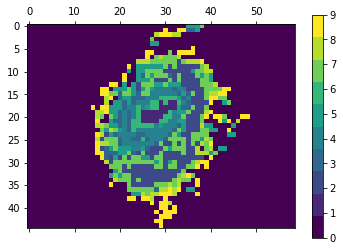

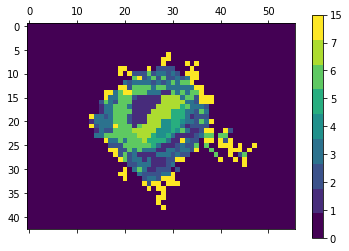

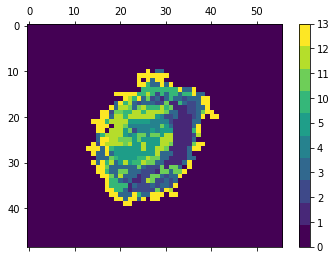

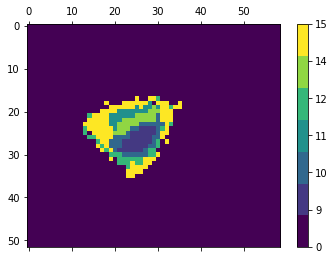

In [15]:
slided_0.plot_segments()
slided_1.plot_segments()
slided_4.plot_segments()
slided_5.plot_segments()

In [ ]:
#slided_0 = SpectraRegion.from_pickle("slideD_region_0.pickle")
#slided_1 = SpectraRegion.from_pickle("slideD_region_1.pickle")
#slided_4 = SpectraRegion.from_pickle("slideD_region_4.pickle")
#slided_5 = SpectraRegion.from_pickle("slideD_region_5pickle")

Of course a SpectraRegion can also be re-processed to yield a more realistic clustering.

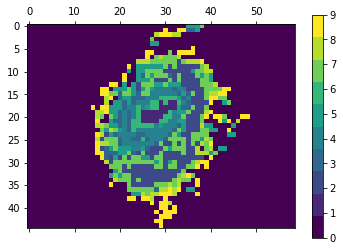

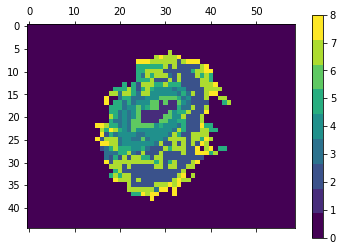

In [16]:
slided_0.plot_segments()
slided_0.set_background(9)
slided_0.segmented[0:5, ] = 0
slided_0.filter_clusters(method='remove_islands')
slided_0.plot_segments()

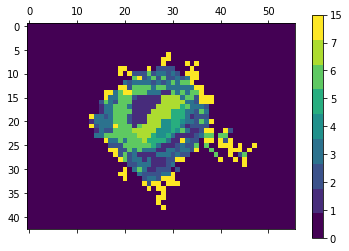

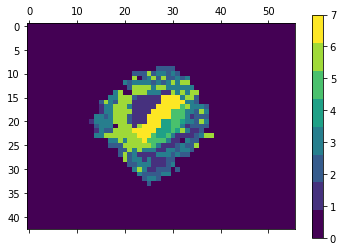

In [17]:
slided_1.plot_segments()
slided_1.set_background(15)
slided_1.filter_clusters(method='remove_islands')
slided_1.plot_segments()

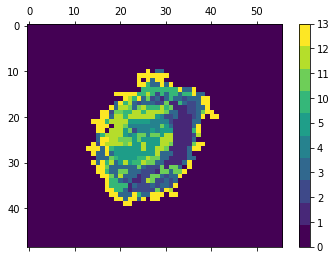

In [18]:
slided_4.plot_segments()

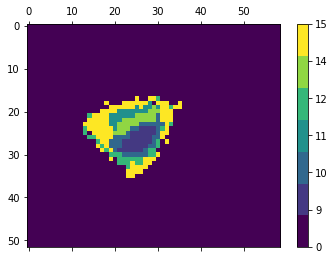

In [19]:
slided_5.plot_segments()

Here a CombinedSpectra is creates. This class allows to compare multiple SpectraRegions

In [20]:
combSpec = CombinedSpectra({0: slided_0, 1: slided_1, 4: slided_4, 5: slided_5})

2021-01-27 10:40:08,552  SpectraRegion  INFO: Calculating consensus spectra
2021-01-27 10:40:09,808  SpectraRegion  INFO: Started Log Value: 0.3346063897079888
2021-01-27 10:40:10,302  SpectraRegion  INFO: Started Log Value: 0.3316924724706006
2021-01-27 10:40:10,736  SpectraRegion  INFO: Started Log Value: 0.3112542304632495
2021-01-27 10:40:11,202  SpectraRegion  INFO: Started Log Value: 0.3340273363387298
2021-01-27 10:40:11,645  SpectraRegion  INFO: Started Log Value: 0.3204370805671126
2021-01-27 10:40:12,079  SpectraRegion  INFO: Started Log Value: 0.3082049056525591
2021-01-27 10:40:12,521  SpectraRegion  INFO: Started Log Value: 0.31153078419172886
2021-01-27 10:40:12,950  SpectraRegion  INFO: Started Log Value: 0.2943068333413746
2021-01-27 10:40:13,400  SpectraRegion  INFO: Started Log Value: 0.2923150758685397
2021-01-27 10:40:13,401  SpectraRegion  INFO: Calculating consensus spectra done
2021-01-27 10:40:13,516  SpectraRegion  INFO: Calculating consensus spectra   |


['slided_0', 'slided_1', 'slided_4', 'slided_5']


2021-01-27 10:40:14,770  SpectraRegion  INFO: Started Log Value: 0.4092138762648083
2021-01-27 10:40:15,267  SpectraRegion  INFO: Started Log Value: 0.3927018813337858
2021-01-27 10:40:15,717  SpectraRegion  INFO: Started Log Value: 0.39314711400069324
2021-01-27 10:40:16,172  SpectraRegion  INFO: Started Log Value: 0.399294870165956
2021-01-27 10:40:16,609  SpectraRegion  INFO: Started Log Value: 0.39058825343549974
2021-01-27 10:40:17,045  SpectraRegion  INFO: Started Log Value: 0.3757598599327475
2021-01-27 10:40:17,473  SpectraRegion  INFO: Started Log Value: 0.34499256871352146
2021-01-27 10:40:17,899  SpectraRegion  INFO: Started Log Value: 0.3229899583411517
2021-01-27 10:40:17,900  SpectraRegion  INFO: Calculating consensus spectra done
2021-01-27 10:40:18,006  CombinedSpectra  INFO: FiveNumber Stats for bgFoldChanges before: (17900, 17900, 0.44071094760164276, 0.7987407855670907, 0.8162779120139174, 0.8376378107977943, 3.1343334525810844)
2021-01-27 10:40:18,006  CombinedSpect

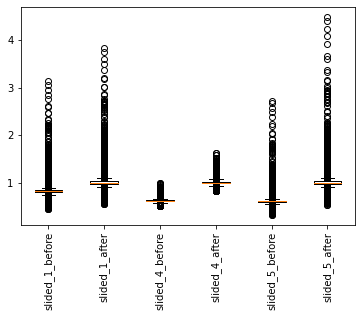

In [21]:
combSpec.get_internormed_regions()

The consensus_smilarity() function calculates the similarity between all the contained spectra's regions using the average cluster/region spectra.

In [22]:
combSpec.consensus_similarity()

2021-01-27 10:40:42,501  SpectraRegion  INFO: Calculating consensus spectra
2021-01-27 10:40:42,532  SpectraRegion  INFO: Calculating consensus spectra done
2021-01-27 10:40:42,533  SpectraRegion  INFO: Calculating consensus spectra
2021-01-27 10:40:42,561  SpectraRegion  INFO: Calculating consensus spectra done
2021-01-27 10:40:42,562  SpectraRegion  INFO: Calculating consensus spectra
2021-01-27 10:40:42,594  SpectraRegion  INFO: Calculating consensus spectra done
2021-01-27 10:40:42,595  SpectraRegion  INFO: Calculating consensus spectra
2021-01-27 10:40:42,630  SpectraRegion  INFO: Calculating consensus spectra done


In [23]:
combSpec.consensus_similarity_matrix

(slided_0, 0)  (slided_0, 1)  (slided_0, 2)  (slided_0, 3)  \
(slided_0, 0)        1.000000       0.698640       0.868351       0.927293   
(slided_0, 1)        0.698640       1.000000       0.790356       0.792716   
(slided_0, 2)        0.868351       0.790356       1.000000       0.958746   
(slided_0, 3)        0.927293       0.792716       0.958746       1.000000   
(slided_0, 4)        0.936375       0.760136       0.895306       0.978516   
(slided_0, 5)        0.966391       0.738648       0.903048       0.949694   
(slided_0, 6)        0.903673       0.895901       0.942304       0.960109   
(slided_0, 7)        0.952160       0.779704       0.969895       0.977655   
(slided_0, 8)        0.938510       0.770766       0.971052       0.971331   
(slided_1, 0)        0.978866       0.722716       0.892657       0.935801   
(slided_1, 1)        0.836560       0.781204       0.989884       0.947748   
(slided_1, 2)        0.931743       0.768459       0.964377       0.969777   
(slided_1, 3)        0.915220       0.775927       0.973239       0.984840   
(slided_1, 4)        0.825169       0.716445       0.892673       0.929695   
(slided_1, 5)        0.802698       0.624623       0.782435       0.879215   
(slided_1, 6)        0.938229       0.727546       0.897101       0.960924   
(slided_1, 7)        0.877778       0.723109       0.891824       0.932738   
(slided_4, 0)        0.995704       0.712081       0.881637       0.936978   
(slided_4, 1)        0.847646       0.740338       0.944157       0.953874   
(slided_4, 2)        0.827785       0.782662       0.993854       0.948123   
(slided_4, 3)        0.903783       0.787587       0.987269       0.985728   
(slided_4, 4)        0.769036       0.914067       0.948262       0.901958   
(slided_4, 5)        0.894024       0.846611       0.960576       0.983600   
(slided_4, 10)       0.924374       0.747052       0.927419       0.988209   
(slided_4, 11)       0.936577       0.789544       0.951661       0.977970   
(slided_4, 12)       0.945051       0.740933       0.891006       0.969738   
(slided_4, 13)       0.961558       0.762101       0.951232       0.981237   
(slided_5, 0)        0.972038       0.729431       0.902334       0.941673   
(slided_5, 9)        0.692741       0.595188       0.758347       0.819444   
(slided_5, 10)       0.825437       0.643060       0.803602       0.901665   
(slided_5, 11)       0.804393       0.774189       0.976576       0.931443   
(slided_5, 12)       0.875832       0.755048       0.944479       0.970890   
(slided_5, 14)       0.864896       0.720240       0.892360       0.932830   
(slided_5, 15)       0.919130       0.740097       0.914753       0.975159   

                (slided_0, 4)  (slided_0, 5)  (slided_0, 6)  (slided_0, 7)  \
(slided_0, 0)        0.936375       0.966391       0.903673       0.952160   
(slided_0, 1)        0.760136       0.738648       0.895901       0.779704   
(slided_0, 2)        0.895306       0.903048       0.942304       0.969895   
(slided_0, 3)        0.978516       0.949694       0.960109       0.977655   
(slided_0, 4)        1.000000       0.964751       0.947501       0.955569   
(slided_0, 5)        0.964751       1.000000       0.947172       0.978817   
(slided_0, 6)        0.947501       0.947172       1.000000       0.967164   
(slided_0, 7)        0.955569       0.978817       0.967164       1.000000   
(slided_0, 8)        0.925146       0.926168       0.937774       0.976516   
(slided_1, 0)        0.939326       0.970019       0.922586       0.964574   
(slided_1, 1)        0.881340       0.875349       0.932120       0.950012   
(slided_1, 2)        0.949323       0.971458       0.962714       0.992164   
(slided_1, 3)        0.953304       0.945085       0.956224       0.982569   
(slided_1, 4)        0.902899       0.837423       0.874826       0.887623   
(slided_1, 5)        0.896297       0.810926       0.806171       0.820341   
(slided_1, 6)        0.980527       0

Since the inspection of this matrix becomes tidious, particularly if large, it an be plotted :)

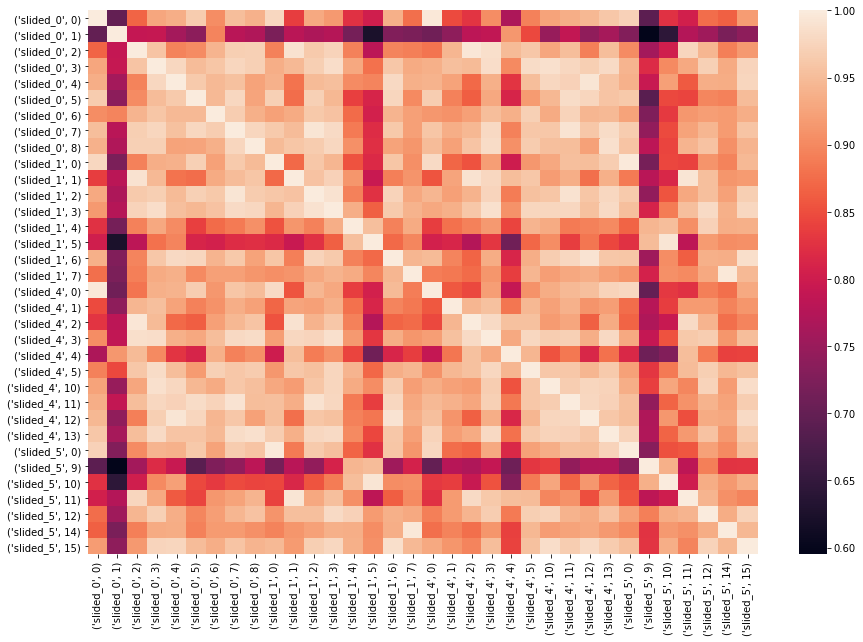

In [24]:
mpl.rcParams['figure.figsize'] = (15,10)
combSpec.plot_consensus_similarity()
mpl.rcParams['figure.figsize'] = (6,4)

It can already be seen that some classes are more similar to each other, than others.

Now the single slide/region clusters are reclustered.

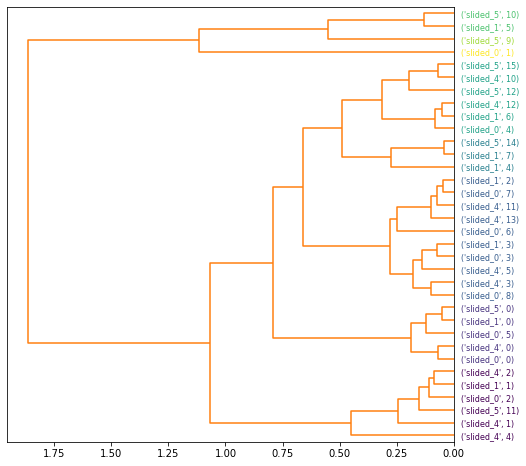

In [25]:
combSpec.cluster_concensus_spectra(number_of_clusters=8)

A detailed print out of the newly assigned cluster for each slide, region.

In [26]:
combSpec.region_cluster2cluster

{('slided_0', 0): 2,
 ('slided_0', 1): 8,
 ('slided_0', 2): 1,
 ('slided_0', 3): 3,
 ('slided_0', 4): 5,
 ('slided_0', 5): 2,
 ('slided_0', 6): 3,
 ('slided_0', 7): 3,
 ('slided_0', 8): 3,
 ('slided_1', 0): 2,
 ('slided_1', 1): 1,
 ('slided_1', 2): 3,
 ('slided_1', 3): 3,
 ('slided_1', 4): 4,
 ('slided_1', 5): 6,
 ('slided_1', 6): 5,
 ('slided_1', 7): 4,
 ('slided_4', 0): 2,
 ('slided_4', 1): 1,
 ('slided_4', 2): 1,
 ('slided_4', 3): 3,
 ('slided_4', 4): 1,
 ('slided_4', 5): 3,
 ('slided_4', 10): 5,
 ('slided_4', 11): 3,
 ('slided_4', 12): 5,
 ('slided_4', 13): 3,
 ('slided_5', 0): 2,
 ('slided_5', 9): 7,
 ('slided_5', 10): 6,
 ('slided_5', 11): 1,
 ('slided_5', 12): 5,
 ('slided_5', 14): 4,
 ('slided_5', 15): 5}

{0.0: 0, 1.0: 1, 2.0: 2, 3.0: 3, 4.0: 4, 5.0: 5, 6.0: 6, 7.0: 7, 8.0: 8, 9.0: 9, 10.0: 10, 11.0: 11, 12.0: 12, 13.0: 13, 14.0: 14, 15.0: 15}


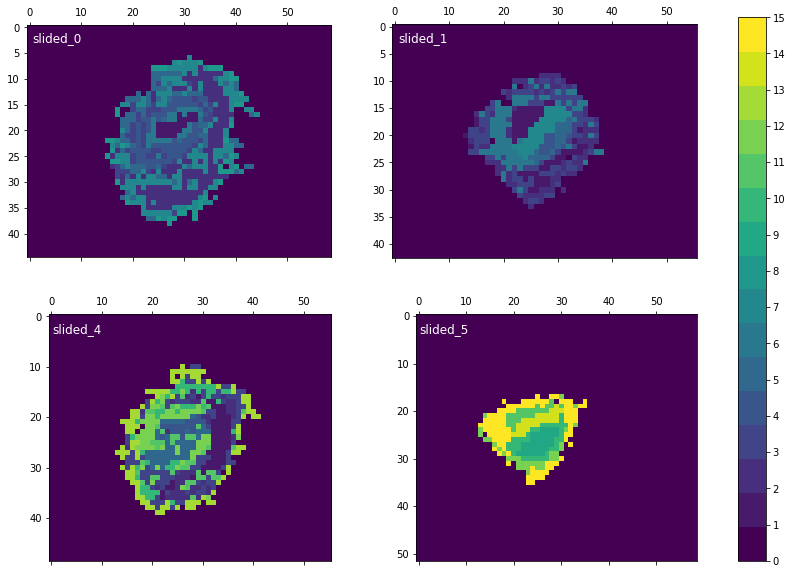

In [27]:
mpl.rcParams['figure.figsize'] = (15,10)
combSpec.plot_segments()
mpl.rcParams['figure.figsize'] = (6,4)

The new assignment can also be plotted:

{0: 2, 1: 8, 2: 1, 3: 3, 4: 5, 5: 2, 6: 3, 7: 3, 8: 3}
{0: 2, 1: 1, 2: 3, 3: 3, 4: 4, 5: 6, 6: 5, 7: 4}
{0: 2, 1: 1, 2: 1, 3: 3, 4: 1, 5: 3, 10: 5, 11: 3, 12: 5, 13: 3}
{0: 2, 9: 7, 10: 6, 11: 1, 12: 5, 14: 4, 15: 5}
{1.0: 1.0, 2.0: 2.0, 3.0: 3.0, 4.0: 4.0, 5.0: 5.0, 6.0: 6.0, 7.0: 7.0, 8.0: 8.0}


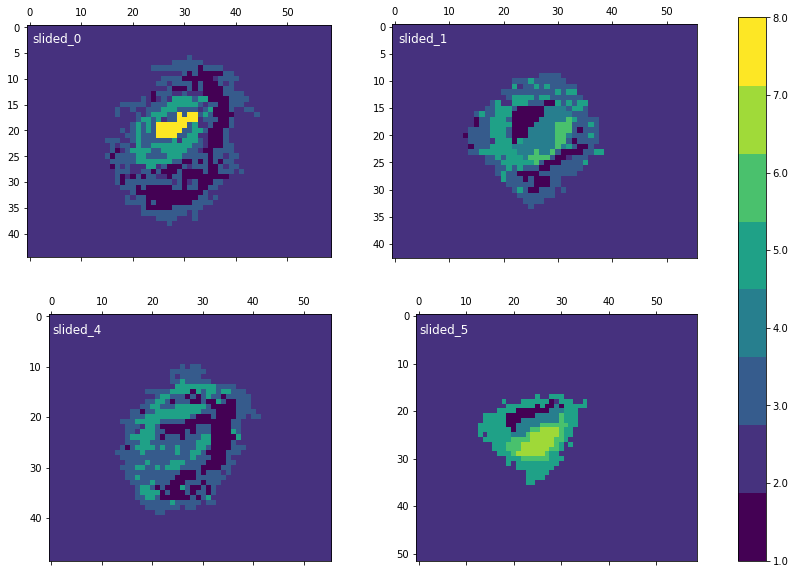

In [28]:
mpl.rcParams['figure.figsize'] = (15,10)
combSpec.plot_common_segments()
mpl.rcParams['figure.figsize'] = (6,4)

And of course, interpreted.

Slide 1 and Slide 5 appear to be similar, and slide 0 and slide 4.



{0: 2, 1: 8, 2: 1, 3: 3, 4: 5, 5: 2, 6: 3, 7: 3, 8: 3}
{0: 2, 1: 1, 2: 3, 3: 3, 4: 4, 5: 6, 6: 5, 7: 4}
{0: 2, 1: 1, 2: 1, 3: 3, 4: 1, 5: 3, 10: 5, 11: 3, 12: 5, 13: 3}
{0: 2, 9: 7, 10: 6, 11: 1, 12: 5, 14: 4, 15: 5}
{1.0: 1.0, 2.0: 2.0}


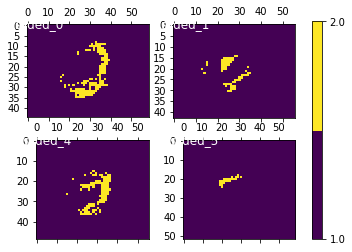

In [29]:
combSpec.plot_common_segments(highlight=(1))

In [31]:
pw.get_protein_from_mass(14954)

[('Ifitm3', 14954.185999999994), ('Tnfrsf12a', 14952.97469999999)]

Similar to a normal SpectraRegion, also specific masses can be plotted. Here we can see that mass 14954 (Ifitm3/Tnfrsf12a) is not present in slides 1 and 5!

2021-01-27 10:41:17,072  CombinedSpectra  INFO: Processing Mass 14954 with best existing mass 14954.46949644581
2021-01-27 10:41:17,083  CombinedSpectra  INFO: Processing Mass 14954 with best existing mass 14954.46949644581
2021-01-27 10:41:17,095  CombinedSpectra  INFO: Processing Mass 14954 with best existing mass 14954.46949644581
2021-01-27 10:41:17,105  CombinedSpectra  INFO: Processing Mass 14954 with best existing mass 14954.46949644581


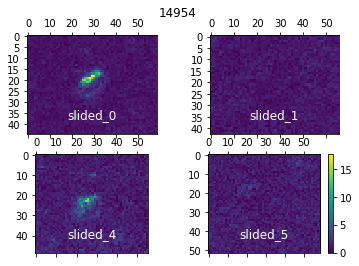

In [30]:
_ = combSpec.mass_heatmap(14954)

2021-01-27 10:42:57,460  CombinedSpectra  INFO: Processing Mass 14954 with best existing mass 14954.46949644581
2021-01-27 10:42:57,472  CombinedSpectra  INFO: Processing Mass 14954 with best existing mass 14954.46949644581
2021-01-27 10:42:57,482  CombinedSpectra  INFO: Processing Mass 14954 with best existing mass 14954.46949644581
2021-01-27 10:42:57,493  CombinedSpectra  INFO: Processing Mass 14954 with best existing mass 14954.46949644581


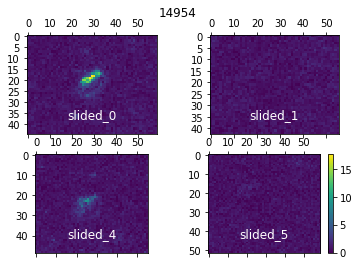

In [32]:
_ = combSpec.mass_heatmap(14954, scaled=True )

## A first DE Analysis: Tunica Media

Slide 0 cluster 2 and slide 4 cluster 1 seem to be very similar. We now want to see whether some differences can be observed.

For this, we suspect that slides 0 and 4 are disease-samples, and slides 1 and 5 are corresponding controls.

We now compare the outer regions of both samples:

2021-01-27 10:43:15,420  SpectraRegion  INFO: Calculating consensus spectra
2021-01-27 10:43:16,696  SpectraRegion  INFO: Started Log Value: 0.3346063897079888
2021-01-27 10:43:17,190  SpectraRegion  INFO: Started Log Value: 0.3316924724706006
2021-01-27 10:43:17,625  SpectraRegion  INFO: Started Log Value: 0.3112542304632495
2021-01-27 10:43:18,090  SpectraRegion  INFO: Started Log Value: 0.3340273363387298
2021-01-27 10:43:18,537  SpectraRegion  INFO: Started Log Value: 0.3204370805671126
2021-01-27 10:43:18,975  SpectraRegion  INFO: Started Log Value: 0.3082049056525591
2021-01-27 10:43:19,427  SpectraRegion  INFO: Started Log Value: 0.31153078419172886
2021-01-27 10:43:19,858  SpectraRegion  INFO: Started Log Value: 0.2943068333413746
2021-01-27 10:43:20,288  SpectraRegion  INFO: Started Log Value: 0.2923150758685397
2021-01-27 10:43:20,289  SpectraRegion  INFO: Calculating consensus spectra done
2021-01-27 10:43:20,394  SpectraRegion  INFO: Calculating consensus spectra   |


['slided_0', 'slided_1', 'slided_4', 'slided_5']


2021-01-27 10:43:21,646  SpectraRegion  INFO: Started Log Value: 0.4092138762648083
2021-01-27 10:43:22,123  SpectraRegion  INFO: Started Log Value: 0.3927018813337858
2021-01-27 10:43:22,571  SpectraRegion  INFO: Started Log Value: 0.39314711400069324
2021-01-27 10:43:23,026  SpectraRegion  INFO: Started Log Value: 0.399294870165956
2021-01-27 10:43:23,469  SpectraRegion  INFO: Started Log Value: 0.39058825343549974
2021-01-27 10:43:23,901  SpectraRegion  INFO: Started Log Value: 0.3757598599327475
2021-01-27 10:43:24,330  SpectraRegion  INFO: Started Log Value: 0.34499256871352146
2021-01-27 10:43:24,758  SpectraRegion  INFO: Started Log Value: 0.3229899583411517
2021-01-27 10:43:24,760  SpectraRegion  INFO: Calculating consensus spectra done
2021-01-27 10:43:24,862  CombinedSpectra  INFO: FiveNumber Stats for bgFoldChanges before: (17900, 17900, 0.44071094760164276, 0.7987407855670907, 0.8162779120139174, 0.8376378107977943, 3.1343334525810844)
2021-01-27 10:43:24,863  CombinedSpect

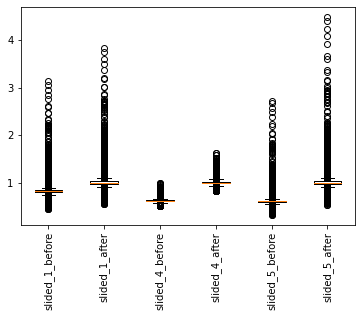

In [33]:
combSpec.get_internormed_regions()

2021-01-27 10:43:51,582  CombinedSpectra  INFO: Processing Mass 12476 with best existing mass 12476.472760167391


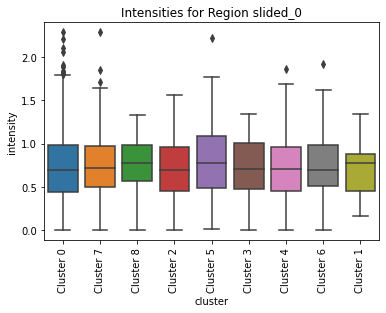

2021-01-27 10:43:51,725  CombinedSpectra  INFO: Processing Mass 12476 with best existing mass 12476.472760167391


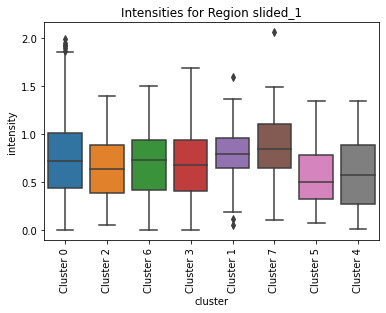

2021-01-27 10:43:51,849  CombinedSpectra  INFO: Processing Mass 12476 with best existing mass 12476.472760167391


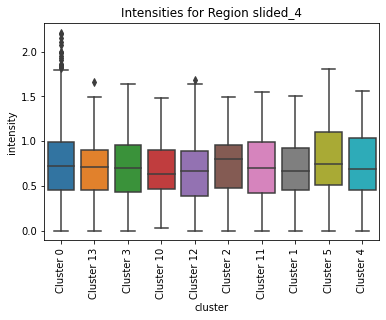

2021-01-27 10:43:51,986  CombinedSpectra  INFO: Processing Mass 12476 with best existing mass 12476.472760167391


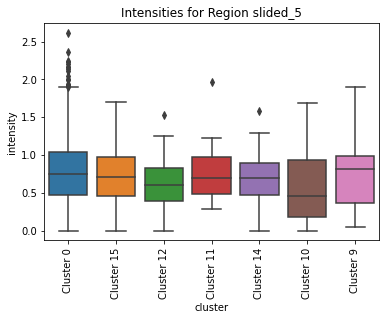

In [35]:
_ = combSpec.mass_intensity(12476, scaled=True )

2021-01-27 10:43:54,783  CombinedSpectra  INFO: Processing Mass 14195 with best existing mass 14195.375490143713


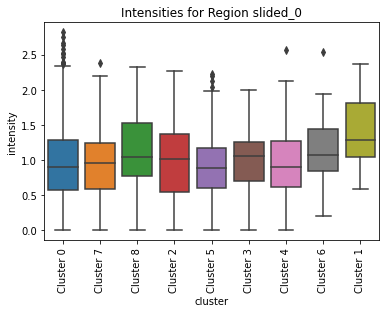

2021-01-27 10:43:54,933  CombinedSpectra  INFO: Processing Mass 14195 with best existing mass 14195.375490143713


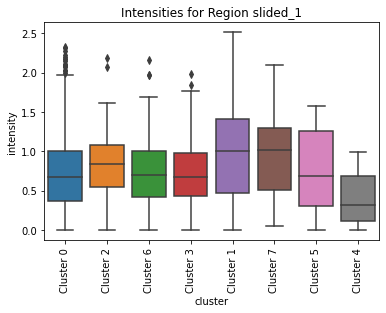

2021-01-27 10:43:55,281  CombinedSpectra  INFO: Processing Mass 14195 with best existing mass 14195.375490143713


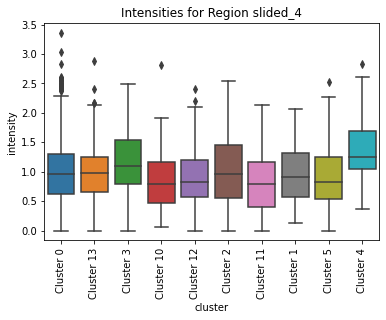

2021-01-27 10:43:55,425  CombinedSpectra  INFO: Processing Mass 14195 with best existing mass 14195.375490143713


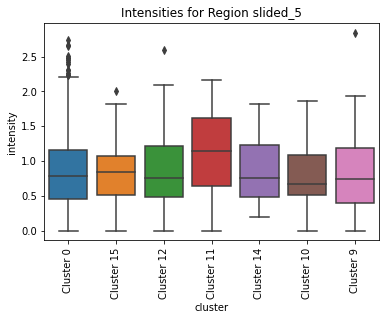

In [36]:
_ = combSpec.mass_intensity(14195, scaled=True )

2021-01-27 10:43:58,921  CombinedSpectra  INFO: Processing Mass 14954 with best existing mass 14954.46949644581


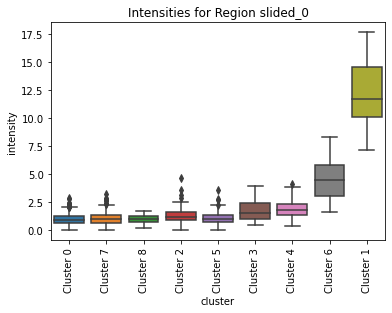

2021-01-27 10:43:59,081  CombinedSpectra  INFO: Processing Mass 14954 with best existing mass 14954.46949644581


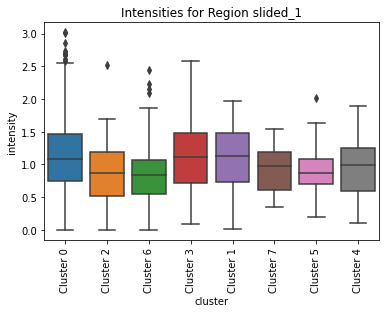

In [37]:
combSpec.mass_intensity(14954, regions=["slided_0", "slided_1"], scaled=False)

2021-01-27 10:44:01,656  CombinedSpectra  INFO: Processing Mass 14954 with best existing mass 14954.46949644581


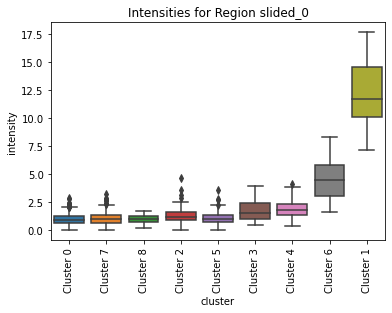

2021-01-27 10:44:01,816  CombinedSpectra  INFO: Processing Mass 14954 with best existing mass 14954.46949644581


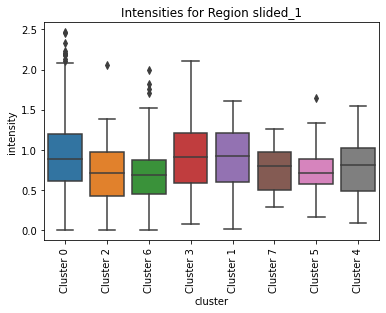

In [38]:
combSpec.mass_intensity(14954, regions=["slided_0", "slided_1"], scaled=True)

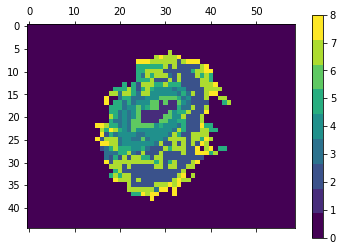

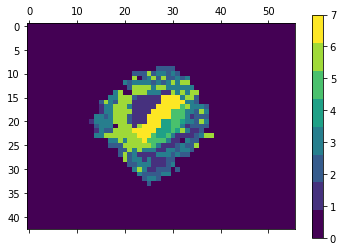

In [39]:
combSpec.regions["slided_0"].plot_segments()
combSpec.regions["slided_1"].plot_segments()

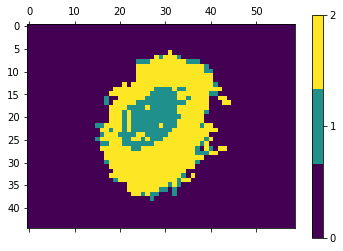

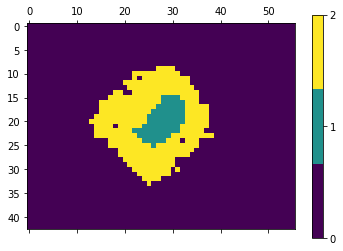

In [40]:
combSpec.regions["slided_0"].plot_segments(highlight=[2, 3, 5, 7])
combSpec.regions["slided_1"].plot_segments(highlight=[1, 2, 3, 6])

In [41]:
slided_0_vessel = [("slided_0", x) for x in [2, 3, 5, 7]]

In [42]:
slided_1_vessel = [("slided_1", x) for x in [1, 2, 3, 6]]

In [170]:
vessel_key = tuple(list(combSpec.to_region_cluster_input(slided_0_vessel)[0]) + list(combSpec.to_region_cluster_input(slided_1_vessel)[0]))

In [168]:
resdf, expr, pdata = combSpec.find_markers(slided_0_vessel, slided_1_vessel, pw, scaled=True, use_methods=["ttest"])

2020-12-13 22:41:20,151  CombinedSpectra  INFO: Processing region slided_0 cluster: 2
100% |########################################################################|
2020-12-13 22:41:20,248  CombinedSpectra  INFO: Processing region slided_0 cluster: 3
100% |########################################################################|
2020-12-13 22:41:20,296  CombinedSpectra  INFO: Processing region slided_0 cluster: 5
100% |########################################################################|
2020-12-13 22:41:20,390  CombinedSpectra  INFO: Processing region slided_0 cluster: 7
100% |########################################################################|
2020-12-13 22:41:20,518  CombinedSpectra  INFO: Processing region slided_1 cluster: 1
100% |########################################################################|
2020-12-13 22:41:20,601  CombinedSpectra  INFO: Processing region slided_1 cluster: 2
100% |########################################################################|
2020

In order to plot a volcano plot for the differential masses/proteins, the result DF is subset to only have masses displayed that have a mean intensity of at least 2.

In [204]:
mydf_vessel = resdf["ttest"][vessel_key]
mydf_vessel.to_csv("slide.d.vessel.tsv", sep="\t")
mydf_vessel

clusterID               gene_ident     gene_mass     gene  \
0    slided_0_2_3_5_7  mass_3159_0843011034667   3159.084301    Apoc1   
1    slided_0_2_3_5_7   mass_3160_593434316791   3160.593434    Apoc1   
2    slided_0_2_3_5_7  mass_3168_1391003834124   3168.139100  Gm37419   
3    slided_0_2_3_5_7  mass_3344_7076863423495   3344.707686    Anxa3   
4    slided_0_2_3_5_7  mass_3346_2168195556737   3346.216820    Anxa3   
..                ...                      ...           ...      ...   
606  slided_0_2_3_5_7   mass_18710_70206440987  18710.702064      Lep   
607  slided_0_2_3_5_7  mass_18712_211197623197  18712.211198   Gm8879   
608  slided_0_2_3_5_7  mass_18712_211197623197  18712.211198     Cfl2   
609  slided_0_2_3_5_7   mass_18713_72033083652  18713.720331  Gm11569   
610  slided_0_2_3_5_7   mass_18713_72033083652  18713.720331  Dnajc5g   

     protein_mass  avg_logFC        qvalue  num  anum      mean    median  \
0       3160.8824   0.643106  1.341435e-14  443   433  0.960969  0.832218   
1       3160.8824   0.586717  2.108304e-09  443   443  0.690115  0.507539   
2       3170.2332  -0.533914  4.866616e-17  443   443  2.262040  2.118569   
3       3347.6387  -0.745564  7.013787e-40  443   442  2.822322  2.785057   
4       3347.6387  -0.873291  3.386833e-58  443   443  3.666538  3.459385   
..            ...        ...           ...  ...   ...       ...       ...   
606    18708.4055  -0.568902  7.140742e-16  443   442  1.309449  1.091056   
607    18710.0595  -0.544498  5.944563e-15  443   442  1.234513  1.032077   
608    18709.3611  -0.544498  5.944563e-15  443   442  1.234513  1.032077   
609    18715.3232  -0.506910  1.038608e-13  443   443  1.165494  0.992988   
610    18716.2973  -0.506910  1.038608e-13  443   443  1.165494  0.992988   

     num_bg  anum_bg   mean_bg  median_bg  
0       316      315  1.500733   1.397297  
1       316      316  1.036433   0.895306  
2       316      315  1.562342   1.394354  
3       316      311  1.683330   1.665188  
4       316      316  2.001565   1.962595  
..      ...      ...       ...        ...  
606     316      312  0.882739   0.805873  
607     316      313  0.846420   0.767054  
608     316      313  0.846420   0.767054  
609     316      311  0.820190   0.756105  
610     316      311  0.820190   0.756105  

[611 rows x 15 columns]

In [382]:
print("DE masses", len(set(mydf_vessel.gene_mass)))
print("DE up masses", len(set(mydf_vessel.loc[mydf_vessel.avg_logFC > 0].gene_mass)))
print("DE down masses", len(set(mydf_vessel.loc[mydf_vessel.avg_logFC < 0].gene_mass)))
print("DE gene", len(set(mydf_vessel.gene)))

DE masses 259
DE up masses 46
DE down masses 213
DE gene 186


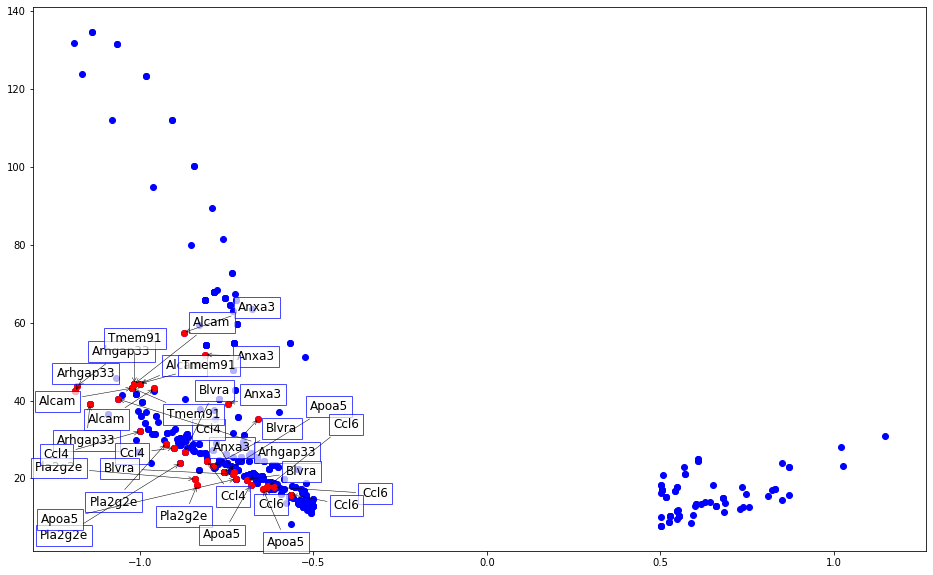

In [383]:
plt.figure(figsize=(16,10))
xydots = [(x,y) for x,y in zip(list(mydf_vessel["avg_logFC"]), list(-np.log10(mydf_vessel["qvalue"])))]
dotgene = list(mydf["gene"])
texts = []
seenProts = set()

for i in range(len(xydots)):
    x = xydots[i][0]
    y = xydots[i][1]
    plt.plot(x, y, 'bo')
    
for i in range(len(xydots)):
    x = xydots[i][0]
    y = xydots[i][1]
    if dotgene[i] in ["Pla2g2e", "Ccl4", "Ccl6", "Apoa5", "Tmem91", "Alcam", "Blvra", "Arhgap33", "Anxa3", "Igf1"]:
        t = plt.text(x, y , dotgene[i], fontsize=12)
        t.set_bbox(dict(facecolor='white', alpha=0.7, edgecolor='blue'))
        texts.append(t)
        plt.plot(x, y, 'ro')
        seenProts.add(dotgene[i])

adjust_text(texts, force_points=1.0, force_text=1.5, expand_points=(1.5, 1.5), expand_text=(1.0, 1.0), arrowprops=dict(arrowstyle="->", color='black', lw=0.5))
plt.show()

In [196]:
pw.get_masses_for_protein("Ccl4")

{10167.716399999996}

2020-12-14 12:51:28,993  CombinedSpectra  INFO: Processing Mass 17092.86939999998 with best existing mass 17092.911259726272
2020-12-14 12:51:29,002  CombinedSpectra  INFO: Processing Mass 18473.192599999988 with best existing mass 18473.768149917963
2020-12-14 12:51:29,010  CombinedSpectra  INFO: Processing Mass 15991.425699999983 with best existing mass 15991.24401399957
2020-12-14 12:51:29,018  CombinedSpectra  INFO: Processing Mass 15196.506799999977 with best existing mass 15195.93081057769
2020-12-14 12:51:29,026  CombinedSpectra  INFO: Processing Mass 17887.78829999999 with best existing mass 17888.22446314815
2020-12-14 12:51:29,034  CombinedSpectra  INFO: Processing Mass 17092.86939999998 with best existing mass 17092.911259726272
2020-12-14 12:51:29,042  CombinedSpectra  INFO: Processing Mass 18473.192599999988 with best existing mass 18473.768149917963
2020-12-14 12:51:29,051  CombinedSpectra  INFO: Processing Mass 15991.425699999983 with best existing mass 15991.24401399957

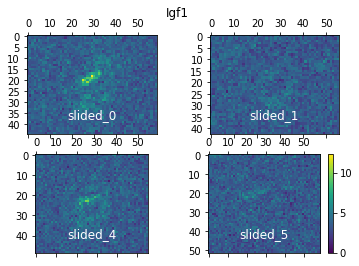

2020-12-14 12:51:29,416  CombinedSpectra  INFO: Processing Mass 8426.702599999993 with best existing mass 8425.959215605102
2020-12-14 12:51:29,424  CombinedSpectra  INFO: Processing Mass 15942.401899999986 with best existing mass 15942.951751173196
2020-12-14 12:51:29,432  CombinedSpectra  INFO: Processing Mass 8426.702599999993 with best existing mass 8425.959215605102
2020-12-14 12:51:29,440  CombinedSpectra  INFO: Processing Mass 15942.401899999986 with best existing mass 15942.951751173196
2020-12-14 12:51:29,448  CombinedSpectra  INFO: Processing Mass 8426.702599999993 with best existing mass 8425.959215605102
2020-12-14 12:51:29,456  CombinedSpectra  INFO: Processing Mass 15942.401899999986 with best existing mass 15942.951751173196
2020-12-14 12:51:29,465  CombinedSpectra  INFO: Processing Mass 8426.702599999993 with best existing mass 8425.959215605102
2020-12-14 12:51:29,474  CombinedSpectra  INFO: Processing Mass 15942.401899999986 with best existing mass 15942.951751173196


Empty DataFrame
Columns: [clusterID, gene_ident, gene_mass, gene, protein_mass, avg_logFC, qvalue, num, anum, mean, median, num_bg, anum_bg, mean_bg, median_bg]
Index: []


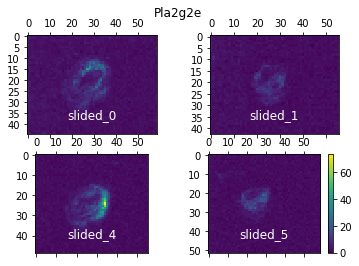

2020-12-14 12:51:30,202  CombinedSpectra  INFO: Processing Mass 10167.716399999996 with best existing mass 10167.498943781287
2020-12-14 12:51:30,211  CombinedSpectra  INFO: Processing Mass 10167.716399999996 with best existing mass 10167.498943781287
2020-12-14 12:51:30,219  CombinedSpectra  INFO: Processing Mass 10167.716399999996 with best existing mass 10167.498943781287
2020-12-14 12:51:30,227  CombinedSpectra  INFO: Processing Mass 10167.716399999996 with best existing mass 10167.498943781287


           clusterID              gene_ident    gene_mass     gene  \
56  slided_0_2_3_5_7  mass_8424_450082391777  8424.450082  Pla2g2e   
57  slided_0_2_3_5_7  mass_8425_959215605102  8425.959216  Pla2g2e   
59  slided_0_2_3_5_7  mass_8427_468348818427  8427.468349  Pla2g2e   
64  slided_0_2_3_5_7   mass_8428_97748203175  8428.977482  Pla2g2e   

    protein_mass  avg_logFC        qvalue  num  anum      mean    median  \
56     8426.7026  -0.835053  5.316729e-19  443   443  6.665220  4.992400   
57     8426.7026  -0.840820  1.590234e-20  443   443  5.651176  4.352082   
59     8426.7026  -0.883181  1.189801e-24  443   443  5.435240  4.317104   
64     8426.7026  -0.925130  1.166401e-29  443   443  5.812032  4.720183   

    num_bg  anum_bg   mean_bg  median_bg  
56     316      315  3.736275   2.624589  
57     316      314  3.155199   2.327937  
59     316      313  2.946829   2.346610  
64     316      315  3.060809   2.562911  


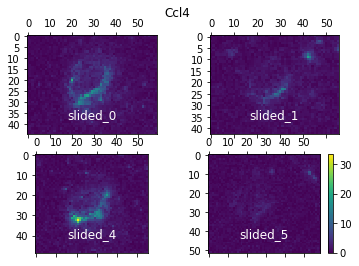

2020-12-14 12:51:30,458  CombinedSpectra  INFO: Processing Mass 12983.867999999982 with best existing mass 12983.541519844339
2020-12-14 12:51:30,467  CombinedSpectra  INFO: Processing Mass 12983.867999999982 with best existing mass 12983.541519844339
2020-12-14 12:51:30,475  CombinedSpectra  INFO: Processing Mass 12983.867999999982 with best existing mass 12983.541519844339
2020-12-14 12:51:30,484  CombinedSpectra  INFO: Processing Mass 12983.867999999982 with best existing mass 12983.541519844339


            clusterID               gene_ident     gene_mass  gene  \
227  slided_0_2_3_5_7  mass_10165_989810567964  10165.989811  Ccl4   
229  slided_0_2_3_5_7  mass_10167_498943781287  10167.498944  Ccl4   
233  slided_0_2_3_5_7   mass_10169_00807699461  10169.008077  Ccl4   
237  slided_0_2_3_5_7  mass_10170_517210207936  10170.517210  Ccl4   

     protein_mass  avg_logFC        qvalue  num  anum      mean    median  \
227    10167.7164  -0.998870  7.714476e-33  443   443  5.444276  4.287327   
229    10167.7164  -0.901157  1.411265e-28  443   443  4.958446  3.863115   
233    10167.7164  -0.806584  3.484229e-25  443   443  4.261620  3.335701   
237    10167.7164  -0.728652  1.802976e-22  443   443  3.534296  2.816573   

     num_bg  anum_bg   mean_bg  median_bg  
227     316      316  2.724269   2.146680  
229     316      316  2.655037   2.101104  
233     316      316  2.436512   1.946483  
237     316      316  2.132833   1.757771  


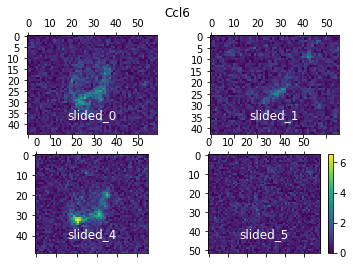

2020-12-14 12:51:30,719  CombinedSpectra  INFO: Processing Mass 12977.634799999993 with best existing mass 12977.504986991042
2020-12-14 12:51:30,730  CombinedSpectra  INFO: Processing Mass 41261.697100000136 with best existing mass 30009.582432568535
2020-12-14 12:51:30,738  CombinedSpectra  INFO: Processing Mass 5229.984300000001 with best existing mass 5229.615069784339
2020-12-14 12:51:30,748  CombinedSpectra  INFO: Processing Mass 12977.634799999993 with best existing mass 12977.504986991042
2020-12-14 12:51:30,757  CombinedSpectra  INFO: Processing Mass 41261.697100000136 with best existing mass 30009.582432568535
2020-12-14 12:51:30,766  CombinedSpectra  INFO: Processing Mass 5229.984300000001 with best existing mass 5229.615069784339
2020-12-14 12:51:30,774  CombinedSpectra  INFO: Processing Mass 12977.634799999993 with best existing mass 12977.504986991042
2020-12-14 12:51:30,782  CombinedSpectra  INFO: Processing Mass 41261.697100000136 with best existing mass 30009.582432568

            clusterID               gene_ident     gene_mass  gene  \
277  slided_0_2_3_5_7  mass_12982_032386631015  12982.032387  Ccl6   
279  slided_0_2_3_5_7  mass_12983_541519844339  12983.541520  Ccl6   
284  slided_0_2_3_5_7  mass_12985_050653057664  12985.050653  Ccl6   
287  slided_0_2_3_5_7  mass_12986_559786270987  12986.559786  Ccl6   

     protein_mass  avg_logFC        qvalue  num  anum      mean    median  \
277     12983.868  -0.637911  3.673801e-18  443   442  1.369790  1.161473   
279     12983.868  -0.629713  8.717657e-19  443   442  1.329828  1.141130   
284     12983.868  -0.612690  1.686640e-18  443   441  1.279388  1.114558   
287     12983.868  -0.565322  1.380649e-16  443   440  1.199139  1.071091   

     num_bg  anum_bg   mean_bg  median_bg  
277     316      308  0.880286   0.800855  
279     316      314  0.859475   0.766122  
284     316      312  0.836690   0.775023  
287     316      310  0.810384   0.759489  


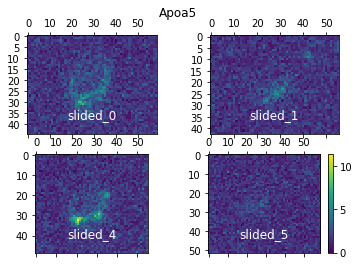

2020-12-14 12:51:31,094  CombinedSpectra  INFO: Processing Mass 14975.600299999976 with best existing mass 14975.59736143235
2020-12-14 12:51:31,103  CombinedSpectra  INFO: Processing Mass 18084.31839999998 with best existing mass 18084.411780880306
2020-12-14 12:51:31,111  CombinedSpectra  INFO: Processing Mass 13191.723099999981 with best existing mass 13191.801903283085
2020-12-14 12:51:31,121  CombinedSpectra  INFO: Processing Mass 14975.600299999976 with best existing mass 14975.59736143235
2020-12-14 12:51:31,129  CombinedSpectra  INFO: Processing Mass 18084.31839999998 with best existing mass 18084.411780880306
2020-12-14 12:51:31,137  CombinedSpectra  INFO: Processing Mass 13191.723099999981 with best existing mass 13191.801903283085
2020-12-14 12:51:31,145  CombinedSpectra  INFO: Processing Mass 14975.600299999976 with best existing mass 14975.59736143235
2020-12-14 12:51:31,153  CombinedSpectra  INFO: Processing Mass 18084.31839999998 with best existing mass 18084.41178088030

            clusterID               gene_ident     gene_mass   gene  \
267  slided_0_2_3_5_7  mass_12975_995853777718  12975.995854  Apoa5   
268  slided_0_2_3_5_7  mass_12977_504986991042  12977.504987  Apoa5   
273  slided_0_2_3_5_7  mass_12979_014120204367  12979.014120  Apoa5   
276  slided_0_2_3_5_7   mass_12980_52325341769  12980.523253  Apoa5   

     protein_mass  avg_logFC        qvalue  num  anum      mean    median  \
267    12977.6348  -0.758797  2.905672e-22  443   443  1.768569  1.452701   
268    12977.6348  -0.723447  1.426154e-20  443   443  1.686594  1.415017   
273    12977.6348  -0.681208  4.962347e-19  443   441  1.605987  1.368653   
276    12977.6348  -0.645870  6.021602e-18  443   441  1.476000  1.245229   

     num_bg  anum_bg   mean_bg  median_bg  
267     316      314  1.045205   0.896426  
268     316      314  1.021483   0.879931  
273     316      315  1.001562   0.871320  
276     316      309  0.943322   0.852022  


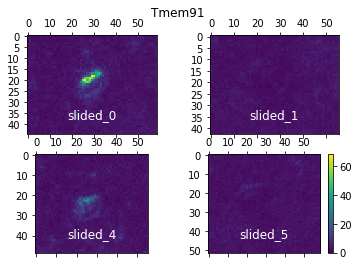

            clusterID               gene_ident     gene_mass    gene  \
335  slided_0_2_3_5_7  mass_14974_088228219027  14974.088228  Tmem91   
337  slided_0_2_3_5_7   mass_14975_59736143235  14975.597361  Tmem91   
343  slided_0_2_3_5_7  mass_14977_106494645675  14977.106495  Tmem91   

     protein_mass  avg_logFC        qvalue  num  anum      mean    median  \
335    14975.6003  -0.999996  4.503674e-45  443   443  3.387263  2.728120   
337    14975.6003  -1.016247  5.840727e-45  443   443  3.750112  3.022549   
343    14975.6003  -1.021479  6.075005e-44  443   443  4.096347  3.280383   

     num_bg  anum_bg   mean_bg  median_bg  
335     316      316  1.693637   1.607578  
337     316      316  1.854059   1.755224  
343     316      316  2.017907   1.902623  


In [329]:
for protid in ["Igf1", "Pla2g2e", "Ccl4", "Ccl6", "Apoa5", "Tmem91"]: #"Il11", "Cst3", "Tnfrsf12a", "Bcl7c", 
    _ = combSpec.mass_heatmap(pw.get_masses_for_protein(protid), scaled=True, title=protid )
    print(mydf_vessel.loc[mydf_vessel.gene == protid,])

![title](https://medicalartlibrary.com/wp-content/uploads/atherosclerosis-renal.jpg)

In this comparison the tunica media of atherosclerotic (slided_0) and control (slided_1) aorta was compared.
It must be noted, that the selected regions are considerably thicker in slided_1 compared to slided_0, but it is a known phenomenon that "The media underlying intimal athero- sclerotic plaque is considerably thinner" (Milutinović, A., Šuput, D., & Zorc-Pleskovič, R. (2020). Pathogenesis of atherosclerosis in the tunica intima, media, and adventitia of coronary arteries: An updated review. In Bosnian Journal of Basic Medical Sciences (Vol. 20, Issue 1, pp. 21–30). Association of Basic Medical Sciences of FBIH. https://doi.org/10.17305/bjbms.2019.4320 ).

However, due to the proximity to the background tissue (liver), for each mass it should be checked whether this mass is not also prevalent in the background tissue and therefore is present in the cluster due to diffusion, bad clustering, or other reasons. The mass_heatmap-function give a good and fast overview!

#### Tmsb4x -
First it is very interesting to see a difference in Tmsb4x between the (suspected) control and disease aortas.
The diseased-aorta-media has significantly less Tmsb4x (-0.5).
This is not surprising, but was already found 5 years ago ( Zaima, N., Sasaki, T., Tanaka, H., Cheng, X. W., Onoue, K., Hayasaka, T., Goto-Inoue, N., Enomoto, H., Unno, N., Kuzuya, M., & Setou, M. (2011). Imaging mass spectrometry-based histopathologic examination of atherosclerotic lesions. Atherosclerosis, 217(2), 427–432. https://doi.org/10.1016/j.atherosclerosis.2011.03.044 ). Indeed, this can be seen as proof-of-concept.

#### Ptges3 + // no

On the contrary, there are other proteins, which are up-regulated in the atherosclerotic aorta.
Among these is Ptges3 (+1.25), which was shown to be involved in the inflammatory response of bovine endometrial epithelial cells.
Almughlliq, F. B., Koh, Y. Q., Peiris, H. N., Vaswani, K., Arachchige, B. J., Reed, S., & Mitchell, M. D. (2018). Eicosanoid pathway expression in bovine endometrial epithelial and stromal cells in response to lipopolysaccharide, interleukin 1 beta, and tumor necrosis factor alpha. Reproductive Biology, 18(4), 390–396. https://doi.org/10.1016/j.repbio.2018.10.001

Further proteins of interest include

#### Chchd4 + // no
Chchd4 was already identified as a biomarker for chronic obstructive pulmonary disease (COPD), a chronic inflammatory disease - in such, maybe? comparable to atherosclerosis.
Chchd4 affects the mitochondrial metabolism, being named in the p53-axis controlling tumor proliferation.

Maghsoudloo, M., Azimzadeh Jamalkandi, S., Najafi, A., & Masoudi-Nejad, A. (2020). An efficient hybrid feature selection method to identify potential biomarkers in common chronic lung inflammatory diseases. Genomics, 112(5), 3284–3293. https://doi.org/10.1016/j.ygeno.2020.06.010

#### Coa6 --

The respiratory metabolism appears to play an important role in atherosclerosis. Many regulated proteins fall into this category.
A Coa6 deficiency is known to be causing many disease phenotypes, including cardiomyopathy, encephalomyopathy, skeletal muscle myopathy, Leigh syndrome, metabolic acidosis and occasional hepatic failure.
In summary: Coa6 deficiency does not contribute to a healthy Aorta.

Ghosh, A., Trivedi, P. P., Timbalia, S. A., Griffin, A. T., Rahn, J. J., Chan, S. S. L., & Gohil, V. M. (2014). Copper supplementation restores cytochrome c oxidase assembly defect in a mitochondrial disease model of COA6 deficiency. Human Molecular Genetics, 23(13), 3596–3606. https://doi.org/10.1093/hmg/ddu069

#### Cst3 +

Serum Cystein3 is associated with subclinical atherosclerosis, which can also be seen in the middle of the IMS aorta. It also does not seem unlikely, that Cst3 is elsewhere upregulated in atherosclerotic aorta.

Chung, Y. K., Lee, Y. J., Kim, K. W., Cho, R. K., Chung, S. M., Moon, J. S., Yoon, J. S., Won, K. C., & Lee, H. W. (2018). Serum cystatin C is associated with subclinical atherosclerosis in patients with type 2 diabetes: A retrospective study. Diabetes and Vascular Disease Research, 15(1), 24–30. https://doi.org/10.1177/1479164117738156

#### Ndufa11 +, Cox7a2 -

This proteins is of interesting, and together with other identified proteins ( like Cox7a2 ), is part of the mitochondria.
Atherosclerosis therefore might have an effect on the energy metabolism, similar to an ischemic stroke: James, R., Searcy, J. L., Le Bihan, T., Martin, S. F., Gliddon, C. M., Povey, J., Deighton, R. F., Kerr, L. E., McCulloch, J., & Horsburgh, K. (2012). Proteomic analysis of mitochondria in APOE transgenic mice and in response to an ischemic challenge. Journal of Cerebral Blood Flow and Metabolism, 32(1), 164–176. https://doi.org/10.1038/jcbfm.2011.120 

#### Ndufb6 +

Ndufb6 was identified to being critical for the development of PM2.5-induced fibrosis in mouse lungs. Therefore it is likely related to inflammatory processes.

Han, X., Liu, H., Zhang, Z., Yang, W., Wu, C., Liu, X., Zhang, F., Sun, B., Zhao, Y., Jiang, G., Yang, Y. G., & Ding, W. (2020). Epitranscriptomic 5-Methylcytosine Profile in PM2.5-induced Mouse Pulmonary Fibrosis. Genomics, Proteomics and Bioinformatics, 18(1), 41–51. https://doi.org/10.1016/j.gpb.2019.11.005



In [ ]:
_ = combSpec.mass_heatmap(pw.protein2mass.get("Tmsb4x"), scaled=True)

In [ ]:
combSpec.mass_intensity(pw.protein2mass.get("Tmsb4x"), regions=["slided_0", "slided_1"], scaled=True)

In [ ]:
for gene in np.unique(mydf["gene"]):
    print(gene)
    _ = combSpec.mass_heatmap(pw.protein2mass.get(gene), scaled=True)

In [ ]:
combSpec.mass_intensity(pw.protein2mass.get("Ptges3"), regions=["slided_0", "slided_1"], scaled=True)

In [325]:

slided_0_outer_regions = tuple(sorted([x for x in np.unique(slided_0.segmented) if x > 0 and not x in [1,3,4,6]]))
slided_1_outer_regions = tuple(sorted([x for x in np.unique(slided_1.segmented) if x > 0 and not x in [2,3,7,8,9]]))

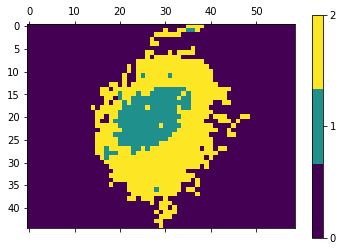

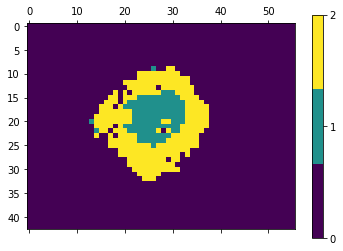

In [326]:
combSpec.regions["slided_0"].plot_segments(highlight=slided_0_outer_regions)
combSpec.regions["slided_1"].plot_segments(highlight=slided_1_outer_regions)

In [327]:
resdf_outer, expr, pdata = combSpec.find_markers("slided_0", slided_0_outer_regions, "slided_1", slided_1_outer_regions, pw, scaled=True)

100% |########################################################################|


Running slided_0 (2, 5, 7, 8, 9) against slided_1 (4, 5, 10, 12, 14, 15)


100% |########################################################################|
100% |########################################################################|
100% |########################################################################|
100% |########################################################################|
100% |########################################################################|
100% |########################################################################|
100% |########################################################################|
100% |########################################################################|
100% |########################################################################|
100% |########################################################################|
/usr/local/lib/python3.8/dist-packages/anndata/_core/anndata.py:119: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


In [328]:
mydf_outer = resdf_outer["ttest"][('slided_0', slided_0_outer_regions, 'slided_1', slided_1_outer_regions)]
mydf_outer.to_csv("slide.d.0.{}.1.{}.tsv".format("_".join([str(x) for x in slided_0_outer_regions]), "_".join([str(x) for x in slided_1_outer_regions])), sep="\t")
mydf_outer

clusterID               gene_ident     gene_mass    gene  protein_mass  \
0    slided_0  mass_3159_0843011034667   3159.084301   Apoc1     3160.8824   
1    slided_0   mass_3160_593434316791   3160.593434   Apoc1     3160.8824   
2    slided_0  mass_3344_7076863423495   3344.707686   Anxa3     3347.6387   
3    slided_0  mass_3346_2168195556737   3346.216820   Anxa3     3347.6387   
4    slided_0   mass_3347_725952768998   3347.725953   Anxa3     3347.6387   
..        ...                      ...           ...     ...           ...   
640  slided_0   mass_18731_82992939641  18731.829929    Rhoj    18730.1821   
641  slided_0   mass_18731_82992939641  18731.829929   Ap1s1    18732.7742   
642  slided_0  mass_18733_339062609735  18733.339063  Speer1    18733.0994   
643  slided_0  mass_18733_339062609735  18733.339063   Ap1s1    18732.7742   
644  slided_0  mass_18733_339062609735  18733.339063   Glrx2    18736.1575   

     avg_logFC        qvalue  num  anum      mean    median  num_bg  anum_bg  \
0     0.781821  2.897855e-19  555   545  0.940194  0.799049     260      259   
1     0.721799  8.669578e-13  555   555  0.677479  0.514346     260      260   
2    -0.794451  1.098320e-43  555   554  2.786782  2.702099     260      255   
3    -0.900115  8.388295e-64  555   555  3.576281  3.387264     260      260   
4    -0.788220  1.250035e-54  555   555  3.626491  3.440319     260      260   
..         ...           ...  ...   ...       ...       ...     ...      ...   
640  -0.547629  5.162496e-17  555   546  0.689593  0.628841     260      253   
641  -0.547629  5.162496e-17  555   546  0.689593  0.628841     260      253   
642  -0.524069  2.313169e-15  555   548  0.663450  0.604091     260      250   
643  -0.524069  2.313169e-15  555   548  0.663450  0.604091     260      250   
644  -0.524069  2.313169e-15  555   548  0.663450  0.604091     260      250   

      mean_bg  median_bg  
0    1.616474   1.473668  
1    1.117324   1.000060  
2    1.606754   1.587879  
3    1.916329   1.868496  
4    2.099950   2.056836  
..        ...        ...  
640  0.471780   0.430807  
641  0.471780   0.430807  
642  0.461368   0.424943  
643  0.461368   0.424943  
644  0.461368   0.424943  

[645 rows x 15 columns]

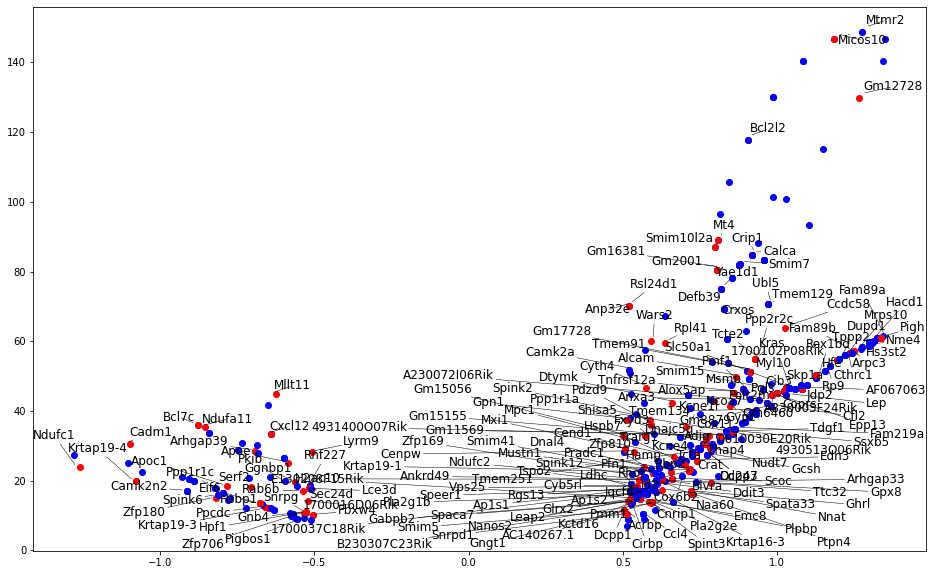

In [329]:
plt.figure(figsize=(16,10))
xydots = [(x,y) for x,y in zip(list(-mydf_outer["avg_logFC"]), list(-np.log10(mydf_outer["qvalue"])))]
dotgene = list(mydf_outer["gene"])
texts = []
seenProts = set()

for i in range(len(xydots)):
    x = xydots[i][0]
    y = xydots[i][1]
    
    if not dotgene[i] in seenProts and abs(y) >= 10 and abs(x) >= 0.5:
        texts.append(plt.text(x * (1 + 0.01), y * (1 + 0.01) , dotgene[i], fontsize=12))
        plt.plot(x, y, 'ro')
        seenProts.add(dotgene[i])
    else:
        plt.plot(x, y, 'bo')

adjust_text(texts, force_points=0.2, force_text=0.2, expand_points=(1, 1), expand_text=(1, 1), arrowprops=dict(arrowstyle="-", color='black', lw=0.5))
plt.show()

## Another DE Analysis: whole Artery

Having spotted several differences between the Tunica media of atherosclerotic and suspected healthy aorta, a full comparison might also be of interest.

For this, all slided_0 and slided_1 regions are compared  - with the exception of the backgrounds.

In [43]:
slided_0_regions = tuple(sorted([(slided_0.name, x) for x in np.unique(slided_0.segmented) if x > 0]))
slided_1_regions = tuple(sorted([(slided_1.name, x) for x in np.unique(slided_1.segmented) if x > 0]))

In [44]:
print(slided_0_regions, slided_1_regions)

(('slided_0', 1), ('slided_0', 2), ('slided_0', 3), ('slided_0', 4), ('slided_0', 5), ('slided_0', 6), ('slided_0', 7), ('slided_0', 8)) (('slided_1', 1), ('slided_1', 2), ('slided_1', 3), ('slided_1', 4), ('slided_1', 5), ('slided_1', 6), ('slided_1', 7))


../pIMZ/regions.py:1135: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if showcopy[i,j] in highlight:


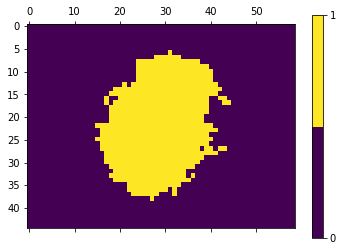

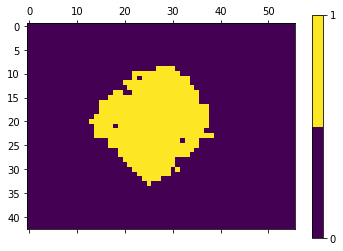

In [45]:
combSpec.regions["slided_0"].plot_segments(highlight=slided_0_regions)
combSpec.regions["slided_1"].plot_segments(highlight=slided_1_regions)

In [46]:
[x for x in combSpec.regions]

['slided_0', 'slided_1', 'slided_4', 'slided_5']

In [47]:
resdf_all, expr, pdata = combSpec.find_markers(slided_0_regions, slided_1_regions, pw, use_methods=["ttest"], scaled=True, )

2021-01-27 10:45:22,132  CombinedSpectra  INFO: Processing region slided_0 cluster: 1
100% |########################################################################|
2021-01-27 10:45:22,158  CombinedSpectra  INFO: Processing region slided_0 cluster: 2
100% |########################################################################|
2021-01-27 10:45:22,265  CombinedSpectra  INFO: Processing region slided_0 cluster: 3
100% |########################################################################|
2021-01-27 10:45:22,329  CombinedSpectra  INFO: Processing region slided_0 cluster: 4
100% |########################################################################|
2021-01-27 10:45:22,403  CombinedSpectra  INFO: Processing region slided_0 cluster: 5
100% |########################################################################|
2021-01-27 10:45:22,523  CombinedSpectra  INFO: Processing region slided_0 cluster: 6
100% |########################################################################|
2021

In [48]:
combSpec.list_de_results()

[('ttest',
  ('slided_0', (1, 2, 3, 4, 5, 6, 7, 8), 'slided_1', (1, 2, 3, 4, 5, 6, 7)))]

In [53]:
testID=tuple(list(combSpec.to_region_cluster_input(slided_0_regions)[0]) + list(combSpec.to_region_cluster_input(slided_1_regions)[0]))

In [49]:
mydf_all = resdf_all["ttest"][testID]
mydf_all.to_csv("slide.d.0.{}.1.{}.tsv".format("_".join([str(x) for x in slided_0_regions]), "_".join([str(x) for x in slided_1_regions])), sep="\t")
mydf_all

clusterID               gene_ident     gene_mass     gene  \
0    slided_0_1_2_3_4_5_6_7_8  mass_3159_0843011034667   3159.084301    Apoc1   
1    slided_0_1_2_3_4_5_6_7_8   mass_3160_593434316791   3160.593434    Apoc1   
2    slided_0_1_2_3_4_5_6_7_8  mass_3344_7076863423495   3344.707686    Anxa3   
3    slided_0_1_2_3_4_5_6_7_8  mass_3346_2168195556737   3346.216820    Anxa3   
4    slided_0_1_2_3_4_5_6_7_8   mass_3347_725952768998   3347.725953    Anxa3   
..                        ...                      ...           ...      ...   
919  slided_0_1_2_3_4_5_6_7_8   mass_18713_72033083652  18713.720331  Gm11569   
920  slided_0_1_2_3_4_5_6_7_8   mass_18713_72033083652  18713.720331  Dnajc5g   
921  slided_0_1_2_3_4_5_6_7_8  mass_18715_229464049844  18715.229464  Gm11569   
922  slided_0_1_2_3_4_5_6_7_8  mass_18715_229464049844  18715.229464  Dnajc5g   
923  slided_0_1_2_3_4_5_6_7_8  mass_18715_229464049844  18715.229464  Ppp1r1a   

     protein_mass  avg_logFC        qvalue  num  anum      mean    median  \
0       3160.8824   0.625024  1.403066e-17  609   596  0.973901  0.823568   
1       3160.8824   0.554428  1.296539e-10  609   609  0.700715  0.507712   
2       3347.6387  -0.884532  2.993079e-62  609   608  3.131949  2.965962   
3       3347.6387  -1.016701  1.936143e-80  609   609  4.121637  3.689316   
4       3347.6387  -0.945662  1.096852e-69  609   609  4.227552  3.813610   
..            ...        ...           ...  ...   ...       ...       ...   
919    18715.3232  -0.551754  9.798505e-18  609   606  1.124048  0.906013   
920    18716.2973  -0.551754  9.798505e-18  609   606  1.124048  0.906013   
921    18715.3232  -0.503417  8.618314e-16  609   604  1.057600  0.867161   
922    18716.2973  -0.503417  8.618314e-16  609   604  1.057600  0.867161   
923    18717.5601  -0.503417  8.618314e-16  609   604  1.057600  0.867161   

     num_bg  anum_bg   mean_bg  median_bg  
0       385      384  1.501985   1.399371  
1       385      385  1.029060   0.892041  
2       385      380  1.696461   1.664370  
3       385      385  2.037098   1.966332  
4       385      385  2.194909   2.115562  
..      ...      ...       ...        ...  
919     385      378  0.766815   0.705469  
920     385      378  0.766815   0.705469  
921     385      382  0.746067   0.679738  
922     385      382  0.746067   0.679738  
923     385      382  0.746067   0.679738  

[924 rows x 15 columns]

In [54]:
mydf_all_more = combSpec.deres_to_df(combSpec.de_results_all["ttest"][testID], testID, pw, mz_dist=3, mz_best=False, keepOnlyProteins=True, scaled=True, min_log2fc=0.25)

2021-01-27 10:50:15,923  CombinedSpectra  INFO: DE result for case ('slided_0', (1, 2, 3, 4, 5, 6, 7, 8), 'slided_1', (1, 2, 3, 4, 5, 6, 7)) with (17900, 7) results
2021-01-27 10:50:15,926  CombinedSpectra  INFO: DE result for case ('slided_0', (1, 2, 3, 4, 5, 6, 7, 8), 'slided_1', (1, 2, 3, 4, 5, 6, 7)) with (1624, 7) results (filtered)
2021-01-27 10:50:15,970  CombinedSpectra  INFO: Created matrices with shape (609, 17900) and (385, 17900) (target, bg)


In [56]:
mydf_all_more.sort_values('qvalue')

clusterID               gene_ident     gene_mass  \
595   slided_0_1_2_3_4_5_6_7_8   mass_8563_290338017609   8563.290338   
596   slided_0_1_2_3_4_5_6_7_8   mass_8563_290338017609   8563.290338   
594   slided_0_1_2_3_4_5_6_7_8   mass_8561_781204804283   8561.781205   
598   slided_0_1_2_3_4_5_6_7_8   mass_8564_799471230934   8564.799471   
597   slided_0_1_2_3_4_5_6_7_8   mass_8564_799471230934   8564.799471   
...                        ...                      ...           ...   
2216  slided_0_1_2_3_4_5_6_7_8  mass_15567_177581055457  15567.177581   
2221  slided_0_1_2_3_4_5_6_7_8  mass_15567_177581055457  15567.177581   
2219  slided_0_1_2_3_4_5_6_7_8  mass_15567_177581055457  15567.177581   
2217  slided_0_1_2_3_4_5_6_7_8  mass_15567_177581055457  15567.177581   
266   slided_0_1_2_3_4_5_6_7_8   mass_7164_323849266028   7164.323849   

           gene  protein_mass  avg_logFC         qvalue  num  anum       mean  \
595     Gm12728     8560.5972  -1.068539  1.304960e-153  609   609  10.680195   
596       Mtmr2     8566.0632  -1.068539  1.304960e-153  609   609  10.680195   
594     Gm12728     8560.5972  -1.110313  5.406856e-153  609   609   7.697133   
598     Micos10     8566.8712  -1.003867  5.455075e-144  609   609  12.385445   
597       Mtmr2     8566.0632  -1.003867  5.455075e-144  609   609  12.385445   
...         ...           ...        ...            ...  ...   ...        ...   
2216     Smim41    15567.3853  -0.280538   4.585819e-03  609   586   0.729030   
2221       Pnkd    15569.6633  -0.280538   4.585819e-03  609   586   0.729030   
2219  Hist1h2bp    15564.9449  -0.280538   4.585819e-03  609   586   0.729030   
2217     Myocos    15567.4913  -0.280538   4.585819e-03  609   586   0.729030   
266        Rsu1     7166.9811   0.258186   7.863367e-03  609   543   0.558687   

         median  num_bg  anum_bg   mean_bg  median_bg  
595   10.528688     385      385  5.092335   4.806017  
596   10.528688     385      385  5.092335   4.806017  
594    7.532039     385      385  3.565263   3.366972  
598   12.233066     385      385  6.176148   5.882984  
597   12.233066     385      385  6.176148   5.882984  
...         ...     ...      ...       ...        ...  
2216   0.550330     385      369  0.600198   0.573055  
2221   0.550330     385      369  0.600198   0.573055  
2219   0.550330     385      369  0.600198   0.573055  
2217   0.550330     385      369  0.600198   0.573055  
266    0.458478     385      344  0.668175   0.576024  

[3028 rows x 15 columns]

In [50]:
print("DE masses", len(set(mydf_all.gene_mass)))
print("DE up masses", len(set(mydf_all.loc[mydf_all.avg_logFC > 0].gene_mass)))
print("DE down masses", len(set(mydf_all.loc[mydf_all.avg_logFC < 0].gene_mass)))
print("DE gene", len(set(mydf_all.gene)))

DE masses 368
DE up masses 62
DE down masses 306
DE gene 264


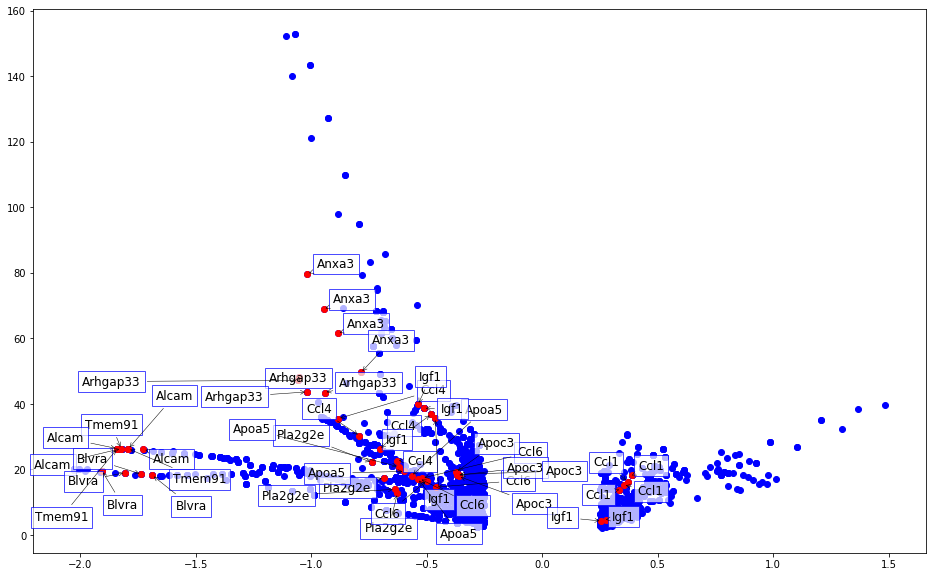

In [55]:
plotdf = mydf_all_more

plt.figure(figsize=(16,10))
xydots = [(x,y) for x,y in zip(list(plotdf["avg_logFC"]), list(-np.log10(plotdf["qvalue"])))]
dotgene = list(plotdf["gene"])
texts = []
seenProts = set()

for i in range(len(xydots)):
    x = xydots[i][0]
    y = xydots[i][1]
    plt.plot(x, y, 'bo')
    
for i in range(len(xydots)):
    x = xydots[i][0]
    y = xydots[i][1]
    if dotgene[i] in ["Pla2g2e", "Ccl4", "Ccl6", "Apoa5", "Tmem91", "Alcam", "Blvra", "Arhgap33", "Anxa3", "Igf1", "Cst3", "Apoc3", "Il13", "Ccl1"]:
        t = plt.text(x, y , dotgene[i], fontsize=12)
        t.set_bbox(dict(facecolor='white', alpha=0.7, edgecolor='blue'))
        texts.append(t)
        plt.plot(x, y, 'ro')
        seenProts.add(dotgene[i])

adjust_text(texts, force_points=1.0, force_text=1.5, expand_points=(1.5, 1.5), expand_text=(1.0, 1.0), arrowprops=dict(arrowstyle="->", color='black', lw=0.5))
plt.show()

2020-12-14 00:43:36,638  CombinedSpectra  INFO: Processing Mass 10175 with best existing mass 10175.044609847908
2020-12-14 00:43:36,649  CombinedSpectra  INFO: Processing Mass 10175 with best existing mass 10175.044609847908
2020-12-14 00:43:36,659  CombinedSpectra  INFO: Processing Mass 10175 with best existing mass 10175.044609847908
2020-12-14 00:43:36,670  CombinedSpectra  INFO: Processing Mass 10175 with best existing mass 10175.044609847908


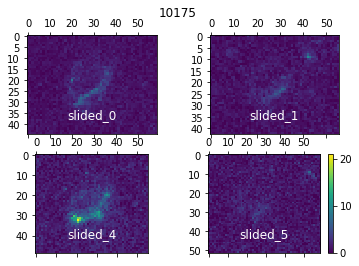

In [257]:
_=combSpec.mass_heatmap([10175])

In [380]:
pw.get_protein_from_mass(10161)

[('Arhgap33', 10161.222399999991)]

2021-01-27 10:55:35,606  CombinedSpectra  INFO: Processing Mass 65767.26550000013 with best existing mass 30009.582432568535
2021-01-27 10:55:35,615  CombinedSpectra  INFO: Processing Mass 8566.063199999999 with best existing mass 8566.308604444257
2021-01-27 10:55:35,623  CombinedSpectra  INFO: Processing Mass 73231.23750000032 with best existing mass 30009.582432568535
2021-01-27 10:55:35,632  CombinedSpectra  INFO: Processing Mass 65767.26550000013 with best existing mass 30009.582432568535
2021-01-27 10:55:35,641  CombinedSpectra  INFO: Processing Mass 8566.063199999999 with best existing mass 8566.308604444257
2021-01-27 10:55:35,648  CombinedSpectra  INFO: Processing Mass 73231.23750000032 with best existing mass 30009.582432568535
2021-01-27 10:55:35,657  CombinedSpectra  INFO: Processing Mass 65767.26550000013 with best existing mass 30009.582432568535
2021-01-27 10:55:35,665  CombinedSpectra  INFO: Processing Mass 8566.063199999999 with best existing mass 8566.308604444257
202

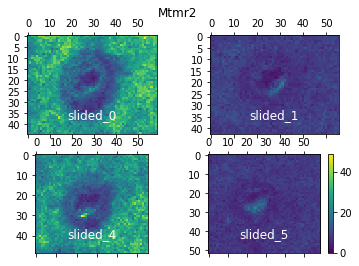

2021-01-27 10:55:35,992  CombinedSpectra  INFO: Processing Mass 8426.702599999993 with best existing mass 8425.959215605102
2021-01-27 10:55:36,000  CombinedSpectra  INFO: Processing Mass 15942.401899999986 with best existing mass 15942.951751173196
2021-01-27 10:55:36,009  CombinedSpectra  INFO: Processing Mass 8426.702599999993 with best existing mass 8425.959215605102
2021-01-27 10:55:36,017  CombinedSpectra  INFO: Processing Mass 15942.401899999986 with best existing mass 15942.951751173196
2021-01-27 10:55:36,025  CombinedSpectra  INFO: Processing Mass 8426.702599999993 with best existing mass 8425.959215605102
2021-01-27 10:55:36,033  CombinedSpectra  INFO: Processing Mass 15942.401899999986 with best existing mass 15942.951751173196
2021-01-27 10:55:36,042  CombinedSpectra  INFO: Processing Mass 8426.702599999993 with best existing mass 8425.959215605102
2021-01-27 10:55:36,050  CombinedSpectra  INFO: Processing Mass 15942.401899999986 with best existing mass 15942.951751173196


                    clusterID              gene_ident    gene_mass   gene  \
157  slided_0_1_2_3_4_5_6_7_8  mass_8563_290338017609  8563.290338  Mtmr2   
158  slided_0_1_2_3_4_5_6_7_8  mass_8564_799471230934  8564.799471  Mtmr2   
160  slided_0_1_2_3_4_5_6_7_8  mass_8566_308604444257  8566.308604  Mtmr2   
163  slided_0_1_2_3_4_5_6_7_8   mass_8567_81773765758  8567.817738  Mtmr2   

     protein_mass  avg_logFC         qvalue  num  anum       mean     median  \
157     8566.0632  -1.068539  1.304960e-153  609   609  10.680195  10.528688   
158     8566.0632  -1.003867  5.455075e-144  609   609  12.385445  12.233066   
160     8566.0632  -0.926562  4.275944e-128  609   609  12.874506  12.744179   
163     8566.0632  -0.854245  1.292639e-110  609   609  12.276417  12.060283   

     num_bg  anum_bg   mean_bg  median_bg  
157     385      385  5.092335   4.806017  
158     385      385  6.176148   5.882984  
160     385      385  6.773420   6.364260  
163     385      385  6.790763   6.36

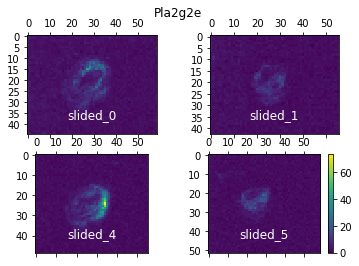

2021-01-27 10:55:36,321  CombinedSpectra  INFO: Processing Mass 10167.716399999996 with best existing mass 10167.498943781287
2021-01-27 10:55:36,329  CombinedSpectra  INFO: Processing Mass 10167.716399999996 with best existing mass 10167.498943781287
2021-01-27 10:55:36,336  CombinedSpectra  INFO: Processing Mass 10167.716399999996 with best existing mass 10167.498943781287
2021-01-27 10:55:36,344  CombinedSpectra  INFO: Processing Mass 10167.716399999996 with best existing mass 10167.498943781287


                   clusterID              gene_ident    gene_mass     gene  \
88  slided_0_1_2_3_4_5_6_7_8  mass_8424_450082391777  8424.450082  Pla2g2e   
89  slided_0_1_2_3_4_5_6_7_8  mass_8425_959215605102  8425.959216  Pla2g2e   
91  slided_0_1_2_3_4_5_6_7_8  mass_8427_468348818427  8427.468349  Pla2g2e   
96  slided_0_1_2_3_4_5_6_7_8   mass_8428_97748203175  8428.977482  Pla2g2e   

    protein_mass  avg_logFC        qvalue  num  anum      mean    median  \
88     8426.7026  -0.626046  2.136392e-13  609   609  7.322958  5.278462   
89     8426.7026  -0.637939  1.188958e-14  609   609  6.170947  4.525155   
91     8426.7026  -0.685917  3.218729e-18  609   609  5.879921  4.494506   
96     8426.7026  -0.736979  7.633085e-23  609   609  6.237250  4.837576   

    num_bg  anum_bg   mean_bg  median_bg  
88     385      384  4.744907   3.280502  
89     385      383  3.965640   2.783824  
91     385      382  3.655024   2.679765  
96     385      384  3.742318   2.844751  


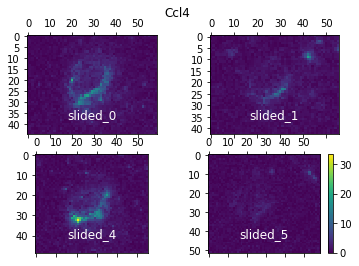

2021-01-27 10:55:36,590  CombinedSpectra  INFO: Processing Mass 12983.867999999982 with best existing mass 12983.541519844339
2021-01-27 10:55:36,598  CombinedSpectra  INFO: Processing Mass 12983.867999999982 with best existing mass 12983.541519844339
2021-01-27 10:55:36,606  CombinedSpectra  INFO: Processing Mass 12983.867999999982 with best existing mass 12983.541519844339
2021-01-27 10:55:36,614  CombinedSpectra  INFO: Processing Mass 12983.867999999982 with best existing mass 12983.541519844339


                    clusterID               gene_ident     gene_mass  gene  \
291  slided_0_1_2_3_4_5_6_7_8  mass_10165_989810567964  10165.989811  Ccl4   
293  slided_0_1_2_3_4_5_6_7_8  mass_10167_498943781287  10167.498944  Ccl4   
297  slided_0_1_2_3_4_5_6_7_8   mass_10169_00807699461  10169.008077  Ccl4   
301  slided_0_1_2_3_4_5_6_7_8  mass_10170_517210207936  10170.517210  Ccl4   

     protein_mass  avg_logFC        qvalue  num  anum      mean    median  \
291    10167.7164  -0.882433  3.163693e-36  609   609  5.003350  3.929174   
293    10167.7164  -0.790638  4.480258e-31  609   609  4.588844  3.664287   
297    10167.7164  -0.702756  7.114302e-27  609   609  3.970233  3.233619   
301    10167.7164  -0.628191  1.973777e-23  609   609  3.309215  2.684910   

     num_bg  anum_bg   mean_bg  median_bg  
291     385      385  2.714075   2.181060  
293     385      385  2.652758   2.128820  
297     385      385  2.439301   1.990003  
301     385      385  2.141019   1.792088  


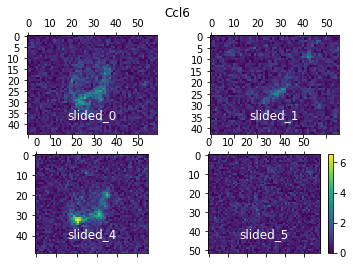

2021-01-27 10:55:36,859  CombinedSpectra  INFO: Processing Mass 12977.634799999993 with best existing mass 12977.504986991042
2021-01-27 10:55:36,867  CombinedSpectra  INFO: Processing Mass 41261.697100000136 with best existing mass 30009.582432568535
2021-01-27 10:55:36,875  CombinedSpectra  INFO: Processing Mass 5229.984300000001 with best existing mass 5229.615069784339
2021-01-27 10:55:36,883  CombinedSpectra  INFO: Processing Mass 12977.634799999993 with best existing mass 12977.504986991042
2021-01-27 10:55:36,891  CombinedSpectra  INFO: Processing Mass 41261.697100000136 with best existing mass 30009.582432568535
2021-01-27 10:55:36,899  CombinedSpectra  INFO: Processing Mass 5229.984300000001 with best existing mass 5229.615069784339
2021-01-27 10:55:36,907  CombinedSpectra  INFO: Processing Mass 12977.634799999993 with best existing mass 12977.504986991042
2021-01-27 10:55:36,916  CombinedSpectra  INFO: Processing Mass 41261.697100000136 with best existing mass 30009.582432568

                    clusterID               gene_ident     gene_mass  gene  \
332  slided_0_1_2_3_4_5_6_7_8  mass_12982_032386631015  12982.032387  Ccl6   
334  slided_0_1_2_3_4_5_6_7_8  mass_12983_541519844339  12983.541520  Ccl6   

     protein_mass  avg_logFC        qvalue  num  anum      mean    median  \
332     12983.868  -0.529612  6.847414e-18  609   608  1.287216  1.130620   
334     12983.868  -0.517835  4.204355e-18  609   607  1.249680  1.094167   

     num_bg  anum_bg   mean_bg  median_bg  
332     385      376  0.891707   0.810651  
334     385      382  0.872801   0.796945  


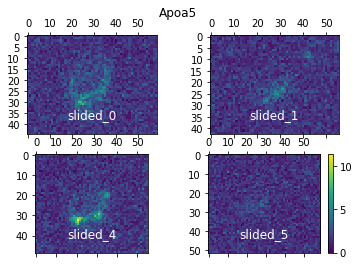

2021-01-27 10:55:37,207  CombinedSpectra  INFO: Processing Mass 14975.600299999976 with best existing mass 14975.59736143235
2021-01-27 10:55:37,216  CombinedSpectra  INFO: Processing Mass 18084.31839999998 with best existing mass 18084.411780880306
2021-01-27 10:55:37,225  CombinedSpectra  INFO: Processing Mass 13191.723099999981 with best existing mass 13191.801903283085
2021-01-27 10:55:37,233  CombinedSpectra  INFO: Processing Mass 14975.600299999976 with best existing mass 14975.59736143235
2021-01-27 10:55:37,241  CombinedSpectra  INFO: Processing Mass 18084.31839999998 with best existing mass 18084.411780880306
2021-01-27 10:55:37,249  CombinedSpectra  INFO: Processing Mass 13191.723099999981 with best existing mass 13191.801903283085
2021-01-27 10:55:37,258  CombinedSpectra  INFO: Processing Mass 14975.600299999976 with best existing mass 14975.59736143235
2021-01-27 10:55:37,266  CombinedSpectra  INFO: Processing Mass 18084.31839999998 with best existing mass 18084.41178088030

                    clusterID               gene_ident     gene_mass   gene  \
322  slided_0_1_2_3_4_5_6_7_8  mass_12975_995853777718  12975.995854  Apoa5   
323  slided_0_1_2_3_4_5_6_7_8  mass_12977_504986991042  12977.504987  Apoa5   
328  slided_0_1_2_3_4_5_6_7_8  mass_12979_014120204367  12979.014120  Apoa5   
331  slided_0_1_2_3_4_5_6_7_8   mass_12980_52325341769  12980.523253  Apoa5   

     protein_mass  avg_logFC        qvalue  num  anum      mean    median  \
322    12977.6348  -0.621104  1.548083e-21  609   609  1.626522  1.344313   
323    12977.6348  -0.596108  4.002163e-20  609   609  1.560509  1.303900   
328    12977.6348  -0.564890  8.521526e-19  609   607  1.494825  1.268766   
331    12977.6348  -0.537447  8.054453e-18  609   607  1.382642  1.204624   

     num_bg  anum_bg   mean_bg  median_bg  
322     385      383  1.057521   0.929143  
323     385      383  1.032334   0.900334  
328     385      384  1.010511   0.895864  
331     385      378  0.952624   0.879770 

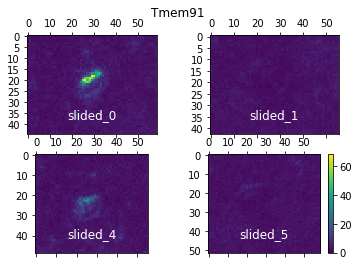

2021-01-27 10:55:37,887  CombinedSpectra  INFO: Processing Mass 14974.23069999999 with best existing mass 14974.088228219027
2021-01-27 10:55:37,896  CombinedSpectra  INFO: Processing Mass 65091.35530000009 with best existing mass 30009.582432568535
2021-01-27 10:55:37,905  CombinedSpectra  INFO: Processing Mass 63667.92050000007 with best existing mass 30009.582432568535
2021-01-27 10:55:37,912  CombinedSpectra  INFO: Processing Mass 61899.91040000007 with best existing mass 30009.582432568535
2021-01-27 10:55:37,921  CombinedSpectra  INFO: Processing Mass 14974.23069999999 with best existing mass 14974.088228219027
2021-01-27 10:55:37,929  CombinedSpectra  INFO: Processing Mass 65091.35530000009 with best existing mass 30009.582432568535
2021-01-27 10:55:37,937  CombinedSpectra  INFO: Processing Mass 63667.92050000007 with best existing mass 30009.582432568535
2021-01-27 10:55:37,946  CombinedSpectra  INFO: Processing Mass 61899.91040000007 with best existing mass 30009.582432568535


                    clusterID               gene_ident     gene_mass    gene  \
452  slided_0_1_2_3_4_5_6_7_8  mass_14974_088228219027  14974.088228  Tmem91   
454  slided_0_1_2_3_4_5_6_7_8   mass_14975_59736143235  14975.597361  Tmem91   
460  slided_0_1_2_3_4_5_6_7_8  mass_14977_106494645675  14977.106495  Tmem91   

     protein_mass  avg_logFC        qvalue  num  anum      mean    median  \
452    14975.6003  -1.791260  4.729918e-27  609   609  5.576148  3.124545   
454    14975.6003  -1.822422  4.424502e-27  609   609  6.212444  3.458629   
460    14975.6003  -1.839503  4.424502e-27  609   609  6.820620  3.773965   

     num_bg  anum_bg   mean_bg  median_bg  
452     385      385  1.611059   1.503611  
454     385      385  1.756545   1.617447  
460     385      385  1.905804   1.736142  


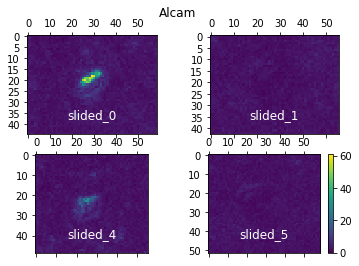

2021-01-27 10:55:38,260  CombinedSpectra  INFO: Processing Mass 33524.10920000004 with best existing mass 30009.582432568535
2021-01-27 10:55:38,269  CombinedSpectra  INFO: Processing Mass 15623.584099999993 with best existing mass 15623.015509948455
2021-01-27 10:55:38,277  CombinedSpectra  INFO: Processing Mass 33524.10920000004 with best existing mass 30009.582432568535
2021-01-27 10:55:38,286  CombinedSpectra  INFO: Processing Mass 15623.584099999993 with best existing mass 15623.015509948455
2021-01-27 10:55:38,294  CombinedSpectra  INFO: Processing Mass 33524.10920000004 with best existing mass 30009.582432568535
2021-01-27 10:55:38,302  CombinedSpectra  INFO: Processing Mass 15623.584099999993 with best existing mass 15623.015509948455
2021-01-27 10:55:38,311  CombinedSpectra  INFO: Processing Mass 33524.10920000004 with best existing mass 30009.582432568535
2021-01-27 10:55:38,320  CombinedSpectra  INFO: Processing Mass 15623.584099999993 with best existing mass 15623.015509948

                    clusterID               gene_ident     gene_mass   gene  \
450  slided_0_1_2_3_4_5_6_7_8  mass_14972_579095005702  14972.579095  Alcam   
451  slided_0_1_2_3_4_5_6_7_8  mass_14974_088228219027  14974.088228  Alcam   
455  slided_0_1_2_3_4_5_6_7_8   mass_14975_59736143235  14975.597361  Alcam   
461  slided_0_1_2_3_4_5_6_7_8  mass_14977_106494645675  14977.106495  Alcam   

     protein_mass  avg_logFC        qvalue  num  anum      mean    median  \
450    14974.2307  -1.725587  6.777513e-27  609   609  4.696977  2.680670   
451    14974.2307  -1.791260  4.729918e-27  609   609  5.576148  3.124545   
455    14974.2307  -1.822422  4.424502e-27  609   609  6.212444  3.458629   
461    14974.2307  -1.839503  4.424502e-27  609   609  6.820620  3.773965   

     num_bg  anum_bg   mean_bg  median_bg  
450     385      383  1.420251   1.333938  
451     385      385  1.611059   1.503611  
455     385      385  1.756545   1.617447  
461     385      385  1.905804   1.736142 

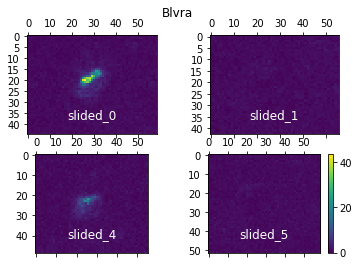

2021-01-27 10:55:38,570  CombinedSpectra  INFO: Processing Mass 137151.1621000008 with best existing mass 30009.582432568535
2021-01-27 10:55:38,578  CombinedSpectra  INFO: Processing Mass 10161.222399999991 with best existing mass 10161.46241092799
2021-01-27 10:55:38,587  CombinedSpectra  INFO: Processing Mass 139799.10570000068 with best existing mass 30009.582432568535
2021-01-27 10:55:38,595  CombinedSpectra  INFO: Processing Mass 137151.1621000008 with best existing mass 30009.582432568535
2021-01-27 10:55:38,603  CombinedSpectra  INFO: Processing Mass 10161.222399999991 with best existing mass 10161.46241092799
2021-01-27 10:55:38,611  CombinedSpectra  INFO: Processing Mass 139799.10570000068 with best existing mass 30009.582432568535
2021-01-27 10:55:38,619  CombinedSpectra  INFO: Processing Mass 137151.1621000008 with best existing mass 30009.582432568535
2021-01-27 10:55:38,627  CombinedSpectra  INFO: Processing Mass 10161.222399999991 with best existing mass 10161.4624109279

                    clusterID               gene_ident     gene_mass   gene  \
652  slided_0_1_2_3_4_5_6_7_8   mass_15621_50637673513  15621.506377  Blvra   
655  slided_0_1_2_3_4_5_6_7_8  mass_15623_015509948455  15623.015510  Blvra   
660  slided_0_1_2_3_4_5_6_7_8  mass_15624_524643161778  15624.524643  Blvra   
663  slided_0_1_2_3_4_5_6_7_8  mass_15626_033776375103  15626.033776  Blvra   

     protein_mass  avg_logFC        qvalue  num  anum      mean    median  \
652    15623.5841  -1.905700  2.541757e-20  609   608  3.572015  1.698552   
655    15623.5841  -1.805337  9.407847e-20  609   608  3.208385  1.529585   
660    15623.5841  -1.735413  2.595735e-19  609   608  2.950561  1.443420   
663    15623.5841  -1.687653  6.178117e-19  609   607  2.693090  1.322438   

     num_bg  anum_bg   mean_bg  median_bg  
652     385      384  0.953324   0.912347  
655     385      382  0.917964   0.871814  
660     385      382  0.886123   0.870165  
663     385      380  0.836020   0.820388 

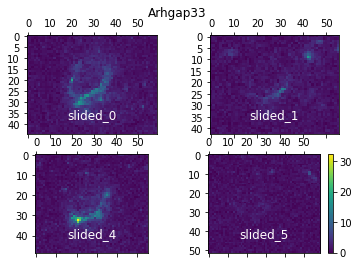

2021-01-27 10:55:38,918  CombinedSpectra  INFO: Processing Mass 3347.6387 with best existing mass 3347.725952768998
2021-01-27 10:55:38,926  CombinedSpectra  INFO: Processing Mass 20003.536099999998 with best existing mass 20004.029228228756
2021-01-27 10:55:38,934  CombinedSpectra  INFO: Processing Mass 36383.64360000005 with best existing mass 30009.582432568535
2021-01-27 10:55:38,942  CombinedSpectra  INFO: Processing Mass 3347.6387 with best existing mass 3347.725952768998
2021-01-27 10:55:38,950  CombinedSpectra  INFO: Processing Mass 20003.536099999998 with best existing mass 20004.029228228756
2021-01-27 10:55:38,958  CombinedSpectra  INFO: Processing Mass 36383.64360000005 with best existing mass 30009.582432568535
2021-01-27 10:55:38,966  CombinedSpectra  INFO: Processing Mass 3347.6387 with best existing mass 3347.725952768998
2021-01-27 10:55:38,976  CombinedSpectra  INFO: Processing Mass 20003.536099999998 with best existing mass 20004.029228228756
2021-01-27 10:55:38,984 

                    clusterID               gene_ident     gene_mass  \
281  slided_0_1_2_3_4_5_6_7_8  mass_10158_444144501342  10158.444145   
282  slided_0_1_2_3_4_5_6_7_8  mass_10159_953277714667  10159.953278   
283  slided_0_1_2_3_4_5_6_7_8   mass_10161_46241092799  10161.462411   
286  slided_0_1_2_3_4_5_6_7_8  mass_10162_971544141314  10162.971544   

         gene  protein_mass  avg_logFC        qvalue  num  anum      mean  \
281  Arhgap33    10161.2224  -0.941516  3.382317e-44  609   609  2.407058   
282  Arhgap33    10161.2224  -1.051934  4.556424e-49  609   609  3.251319   
283  Arhgap33    10161.2224  -1.056738  6.047560e-48  609   609  4.155373   
286  Arhgap33    10161.2224  -1.017893  2.231811e-44  609   609  4.844238   

       median  num_bg  anum_bg   mean_bg  median_bg  
281  2.062794     385      380  1.253320   1.129740  
282  2.651257     385      381  1.568181   1.393429  
283  3.315275     385      383  1.997561   1.658074  
286  3.791472     385      383  2.392

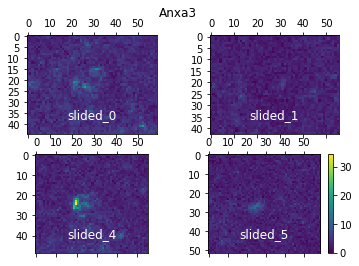

2021-01-27 10:55:39,277  CombinedSpectra  INFO: Processing Mass 17092.86939999998 with best existing mass 17092.911259726272
2021-01-27 10:55:39,285  CombinedSpectra  INFO: Processing Mass 18473.192599999988 with best existing mass 18473.768149917963
2021-01-27 10:55:39,293  CombinedSpectra  INFO: Processing Mass 15991.425699999983 with best existing mass 15991.24401399957
2021-01-27 10:55:39,301  CombinedSpectra  INFO: Processing Mass 15196.506799999977 with best existing mass 15195.93081057769
2021-01-27 10:55:39,311  CombinedSpectra  INFO: Processing Mass 17887.78829999999 with best existing mass 17888.22446314815
2021-01-27 10:55:39,319  CombinedSpectra  INFO: Processing Mass 17092.86939999998 with best existing mass 17092.911259726272
2021-01-27 10:55:39,327  CombinedSpectra  INFO: Processing Mass 18473.192599999988 with best existing mass 18473.768149917963
2021-01-27 10:55:39,335  CombinedSpectra  INFO: Processing Mass 15991.425699999983 with best existing mass 15991.24401399957

                  clusterID               gene_ident    gene_mass   gene  \
2  slided_0_1_2_3_4_5_6_7_8  mass_3344_7076863423495  3344.707686  Anxa3   
3  slided_0_1_2_3_4_5_6_7_8  mass_3346_2168195556737  3346.216820  Anxa3   
4  slided_0_1_2_3_4_5_6_7_8   mass_3347_725952768998  3347.725953  Anxa3   
5  slided_0_1_2_3_4_5_6_7_8  mass_3349_2350859823223  3349.235086  Anxa3   

   protein_mass  avg_logFC        qvalue  num  anum      mean    median  \
2     3347.6387  -0.884532  2.993079e-62  609   608  3.131949  2.965962   
3     3347.6387  -1.016701  1.936143e-80  609   609  4.121637  3.689316   
4     3347.6387  -0.945662  1.096852e-69  609   609  4.227552  3.813610   
5     3347.6387  -0.783525  2.439816e-50  609   609  3.684931  3.300750   

   num_bg  anum_bg   mean_bg  median_bg  
2     385      380  1.696461   1.664370  
3     385      385  2.037098   1.966332  
4     385      385  2.194909   2.115562  
5     385      384  2.140744   2.025972  


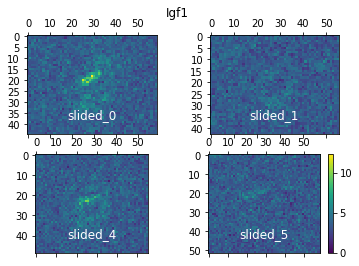

2021-01-27 10:55:39,697  CombinedSpectra  INFO: Processing Mass 15530.657999999992 with best existing mass 15530.958383935675
2021-01-27 10:55:39,705  CombinedSpectra  INFO: Processing Mass 15530.657999999992 with best existing mass 15530.958383935675
2021-01-27 10:55:39,713  CombinedSpectra  INFO: Processing Mass 15530.657999999992 with best existing mass 15530.958383935675
2021-01-27 10:55:39,722  CombinedSpectra  INFO: Processing Mass 15530.657999999992 with best existing mass 15530.958383935675


                    clusterID               gene_ident     gene_mass  gene  \
570  slided_0_1_2_3_4_5_6_7_8  mass_15194_421677364367  15194.421677  Igf1   
573  slided_0_1_2_3_4_5_6_7_8   mass_15195_93081057769  15195.930811  Igf1   

     protein_mass  avg_logFC        qvalue  num  anum      mean    median  \
570    15196.5068  -0.537348  1.524620e-40  609   609  2.672643  2.477474   
573    15196.5068  -0.512016  2.261951e-39  609   609  2.692250  2.523374   

     num_bg  anum_bg   mean_bg  median_bg  
570     385      384  1.841547   1.831013  
573     385      384  1.887919   1.882425  


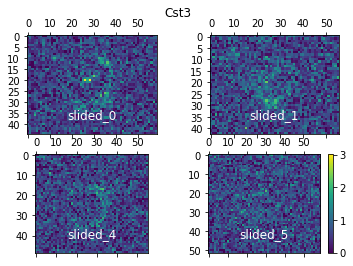

2021-01-27 10:55:39,956  CombinedSpectra  INFO: Processing Mass 10922.135799999993 with best existing mass 10922.065550443413
2021-01-27 10:55:39,964  CombinedSpectra  INFO: Processing Mass 15162.854199999987 with best existing mass 15162.729879884557
2021-01-27 10:55:39,972  CombinedSpectra  INFO: Processing Mass 10922.135799999993 with best existing mass 10922.065550443413
2021-01-27 10:55:39,980  CombinedSpectra  INFO: Processing Mass 15162.854199999987 with best existing mass 15162.729879884557
2021-01-27 10:55:39,988  CombinedSpectra  INFO: Processing Mass 10922.135799999993 with best existing mass 10922.065550443413
2021-01-27 10:55:39,996  CombinedSpectra  INFO: Processing Mass 15162.854199999987 with best existing mass 15162.729879884557
2021-01-27 10:55:40,004  CombinedSpectra  INFO: Processing Mass 10922.135799999993 with best existing mass 10922.065550443413
2021-01-27 10:55:40,013  CombinedSpectra  INFO: Processing Mass 15162.854199999987 with best existing mass 15162.72987

Empty DataFrame
Columns: [clusterID, gene_ident, gene_mass, gene, protein_mass, avg_logFC, qvalue, num, anum, mean, median, num_bg, anum_bg, mean_bg, median_bg]
Index: []


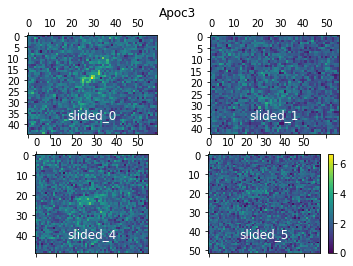

2021-01-27 10:55:40,252  CombinedSpectra  INFO: Processing Mass 14107.345999999974 with best existing mass 14107.845763770905
2021-01-27 10:55:40,260  CombinedSpectra  INFO: Processing Mass 14107.345999999974 with best existing mass 14107.845763770905
2021-01-27 10:55:40,268  CombinedSpectra  INFO: Processing Mass 14107.345999999974 with best existing mass 14107.845763770905
2021-01-27 10:55:40,276  CombinedSpectra  INFO: Processing Mass 14107.345999999974 with best existing mass 14107.845763770905


Empty DataFrame
Columns: [clusterID, gene_ident, gene_mass, gene, protein_mass, avg_logFC, qvalue, num, anum, mean, median, num_bg, anum_bg, mean_bg, median_bg]
Index: []


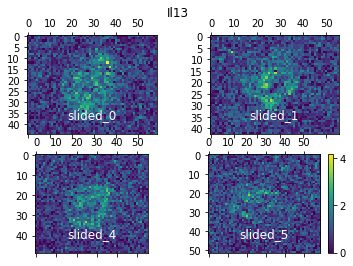

2021-01-27 10:55:40,510  CombinedSpectra  INFO: Processing Mass 10276.213899999992 with best existing mass 10276.156535140633
2021-01-27 10:55:40,518  CombinedSpectra  INFO: Processing Mass 9165.761499999995 with best existing mass 9165.434490133985
2021-01-27 10:55:40,526  CombinedSpectra  INFO: Processing Mass 10276.213899999992 with best existing mass 10276.156535140633
2021-01-27 10:55:40,534  CombinedSpectra  INFO: Processing Mass 9165.761499999995 with best existing mass 9165.434490133985
2021-01-27 10:55:40,542  CombinedSpectra  INFO: Processing Mass 10276.213899999992 with best existing mass 10276.156535140633
2021-01-27 10:55:40,551  CombinedSpectra  INFO: Processing Mass 9165.761499999995 with best existing mass 9165.434490133985
2021-01-27 10:55:40,561  CombinedSpectra  INFO: Processing Mass 10276.213899999992 with best existing mass 10276.156535140633
2021-01-27 10:55:40,569  CombinedSpectra  INFO: Processing Mass 9165.761499999995 with best existing mass 9165.434490133985


Empty DataFrame
Columns: [clusterID, gene_ident, gene_mass, gene, protein_mass, avg_logFC, qvalue, num, anum, mean, median, num_bg, anum_bg, mean_bg, median_bg]
Index: []


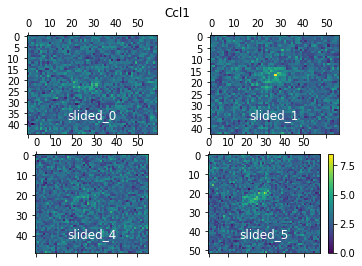

Empty DataFrame
Columns: [clusterID, gene_ident, gene_mass, gene, protein_mass, avg_logFC, qvalue, num, anum, mean, median, num_bg, anum_bg, mean_bg, median_bg]
Index: []


In [57]:
for protid in ["Mtmr2", "Pla2g2e", "Ccl4", "Ccl6", "Apoa5", "Tmem91", "Alcam", "Blvra", "Arhgap33", "Anxa3", "Igf1", "Cst3", "Apoc3", "Il13", "Ccl1"]: #"Il11", "Cst3", "Tnfrsf12a", "Bcl7c", 
    _ = combSpec.mass_heatmap(pw.get_masses_for_protein(protid), scaled=True, title=protid )
    print(mydf_all.loc[mydf_all.gene == protid,])

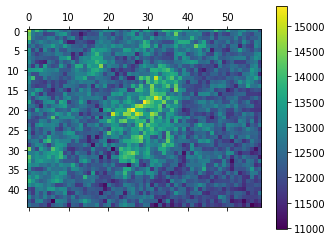

In [242]:
imze.plot_tic(spectra0_intra)

In [315]:
from collections import Counter

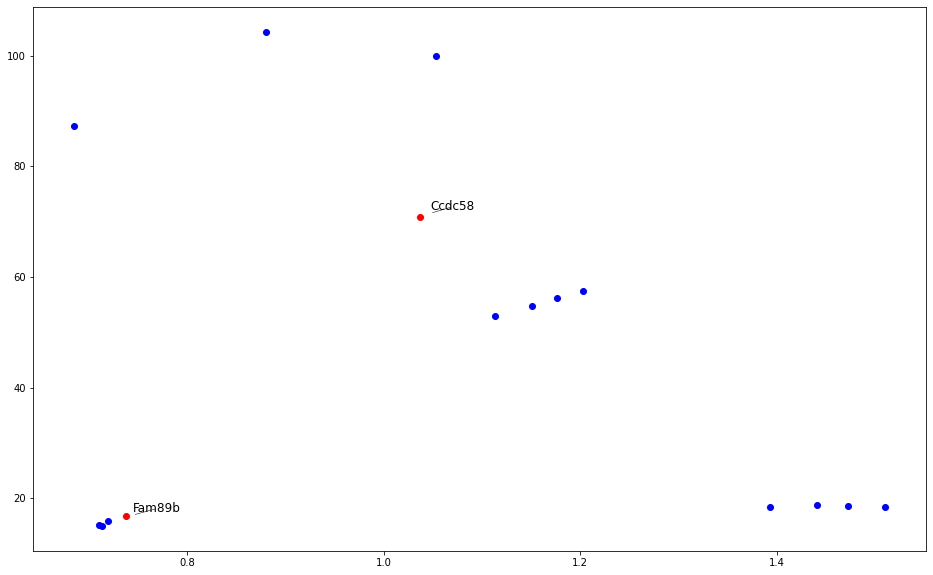

In [321]:
plt.figure(figsize=(16,10))
xydots = [(x,y) for x,y in zip(list(-mydf_all["avg_logFC"]), list(-np.log10(mydf_all["qvalue"])))]
dotgene = list(mydf_all["gene"])
texts = []
seenProts = set()

ralfrelgenes = [x[0] for x in Counter(mydf_all["gene"].to_list()).most_common(2)]

for i in range(len(xydots)):
    x = xydots[i][0]
    y = xydots[i][1]
    
    if not dotgene[i] in ralfrelgenes:
        continue
    
    if not dotgene[i] in seenProts and abs(y) >= 10 and abs(x) >= 0.5:
        texts.append(plt.text(x * (1 + 0.01), y * (1 + 0.01) , dotgene[i], fontsize=12))
        plt.plot(x, y, 'ro')
        seenProts.add(dotgene[i])
    else:
        plt.plot(x, y, 'bo')

adjust_text(texts, force_points=0.2, force_text=0.2, expand_points=(1, 1), expand_text=(1, 1), arrowprops=dict(arrowstyle="-", color='black', lw=0.5))
plt.show()

The comparison of both aorta results again in several differential proteins.

Again, several proteins involved in the respiratory metabolism are listed, like Ndufc2, Ndufa11.

Of interest here are Ifitm3, Ccdc126 and Ubl5, which are all located in the inner part of the aorta.

#### Ifitm3

Known gene involved in the innate immune system (T cells): Yánez, D. C., Ross, S., & Crompton, T. (2020). The IFITM protein family in adaptive immunity. In Immunology (Vol. 159, Issue 4, pp. 365–372). Blackwell Publishing Ltd. https://doi.org/10.1111/imm.13163

Ifitm3 is involved in the plaque uptake in Alzheimer's disease: Hur, J. Y., Frost, G. R., Wu, X., Crump, C., Pan, S. J., Wong, E., Barros, M., Li, T., Nie, P., Zhai, Y., Wang, J. C., Tcw, J., Guo, L., McKenzie, A., Ming, C., Zhou, X., Wang, M., Sagi, Y., Renton, A. E., … Li, Y. M. (2020). The innate immunity protein IFITM3 modulates γ-secretase in Alzheimer’s disease. Nature, 1–6. https://doi.org/10.1038/s41586-020-2681-2


#### Mrps14

Mrps14 effects the mitochondrial translation. 
Hence, again, a disturbation of mitochondrial work can be observed.

Jackson, C. B., Huemer, M., Bolognini, R., Martin, F., Szinnai, G., Donner, B. C., Richter, U., Battersby, B. J., Nuoffer, J. M., Suomalainen, A., & Schaller, A. (2019). A variant in MRPS14 (uS14m) causes perinatal hypertrophic cardiomyopathy with neonatal lactic acidosis, growth retardation, dysmorphic features and neurological involvement. Human Molecular Genetics, 28(4), 639–649. https://doi.org/10.1093/hmg/ddy374

#### Acot13

In chicken it was observed that an Acot13 decreases works as inhibitor during Preadipocytes Differentiation.
Hence, an upregulation of Acot13 leads to an increase in preadipocyte differentiation, which also plays a role in plaque formation.


In [ ]:
_ = combSpec.mass_heatmap(pw.protein2mass.get("Ifitm3"), scaled=True)
_ = combSpec.mass_heatmap(pw.protein2mass.get("Mrps14"), scaled=True)
_ = combSpec.mass_heatmap(pw.protein2mass.get("Acot13"), scaled=True)

In [ ]:
for x in set(mydf_all["gene"]):
    print(x)
    _ = combSpec.mass_heatmap(pw.protein2mass.get(x), scaled=True)

In [ ]:
combSpec.mass_intensity(pw.protein2mass.get("Ccdc126"), regions=["slided_0", "slided_1"], scaled=True)

In [ ]:
combSpec.regions["slided_0"].plot_segments(highlight=1)

In [ ]:
_ = combSpec.mass_heatmap(pw.protein2mass.get("Ccdc126"), scaled=True)

In [ ]:
combSpec.mass_intensity(pw.protein2mass.get("Hsbp1"), regions=["slided_0", "slided_1"], scaled=True)

In [ ]:
_ = combSpec.mass_heatmap(pw.protein2mass.get("Hsbp1"), scaled=True)

## The core DE

In [180]:
slided_0_inner_regions = tuple([1,3,4,6])
slided_1_inner_regions = tuple([2,3,7,8,9])

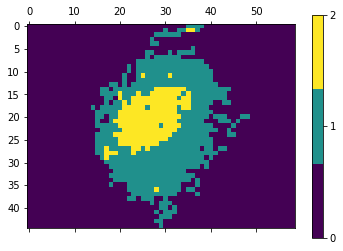

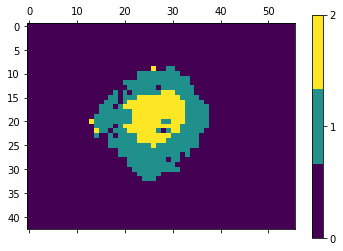

In [181]:
combSpec.regions["slided_0"].plot_segments(highlight=slided_0_inner_regions)
combSpec.regions["slided_1"].plot_segments(highlight=slided_1_inner_regions)

In [182]:
resdf_inner, expr, pdata = combSpec.find_markers("slided_0", slided_0_inner_regions, "slided_1", slided_1_inner_regions, pw, scaled=True)

100% |########################################################################|
100% |########################################################################|
100% |########################################################################|
100% |########################################################################|


Running slided_0 (1, 3, 4, 6) against slided_1 (2, 3, 7, 8, 9)


100% |########################################################################|
100% |########################################################################|
100% |########################################################################|
100% |########################################################################|
100% |########################################################################|
/usr/local/lib/python3.8/dist-packages/anndata/_core/anndata.py:119: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


In [183]:
mydf_inner = resdf_inner["ttest"][('slided_0', slided_0_inner_regions, 'slided_1', slided_1_inner_regions)]
mydf_inner.to_csv("slide.d.0.{}.1.{}.tsv".format("_".join([str(x) for x in slided_0_inner_regions]), "_".join([str(x) for x in slided_1_inner_regions])), sep="\t")
mydf_inner

clusterID               gene_ident     gene_mass     gene  protein_mass  \
0     slided_0  mass_3168_1391003834124   3168.139100  Gm37419     3170.2332   
1     slided_0  mass_3344_7076863423495   3344.707686    Anxa3     3347.6387   
2     slided_0  mass_3346_2168195556737   3346.216820    Anxa3     3347.6387   
3     slided_0   mass_3347_725952768998   3347.725953    Anxa3     3347.6387   
4     slided_0  mass_3349_2350859823223   3349.235086    Anxa3     3347.6387   
...        ...                      ...           ...      ...           ...   
1552  slided_0  mass_21789_333819591342  21789.333820    Tex35    21788.9673   
1553  slided_0  mass_21790_842952804665  21790.842953     Cfc1    21791.8199   
1554  slided_0  mass_21790_842952804665  21790.842953    Tex35    21788.9673   
1555  slided_0  mass_21792_352086017992  21792.352086     Cfc1    21791.8199   
1556  slided_0  mass_21792_352086017992  21792.352086  Gm45261    21793.8471   

      avg_logFC        qvalue  num  anum      mean    median  num_bg  anum_bg  \
0     -0.519265  1.911833e-06  170   170  2.320960  2.251418     105      105   
1     -1.240733  2.543278e-33  170   170  4.234252  3.955380     105      105   
2     -1.406647  1.822066e-39  170   170  5.798659  5.367957     105      105   
3     -1.359639  7.231244e-35  170   170  6.016047  5.479940     105      105   
4     -1.193305  1.436044e-27  170   170  5.216864  4.955850     105      105   
...         ...           ...  ...   ...       ...       ...     ...      ...   
1552  -0.531405  1.300620e-06  170   169  0.622656  0.619492     105      100   
1553  -0.531590  1.018200e-06  170   170  0.633529  0.628219     105      102   
1554  -0.531590  1.018200e-06  170   170  0.633529  0.628219     105      102   
1555  -0.524315  9.146410e-07  170   168  0.653945  0.637684     105      103   
1556  -0.524315  9.146410e-07  170   168  0.653945  0.637684     105      103   

       mean_bg  median_bg  
0     1.619397   1.395893  
1     1.791756   1.713340  
2     2.187179   1.995274  
3     2.344332   2.298958  
4     2.281335   2.083659  
...        ...        ...  
1552  0.430804   0.461318  
1553  0.438271   0.475685  
1554  0.438271   0.475685  
1555  0.454681   0.471876  
1556  0.454681   0.471876  

[1557 rows x 15 columns]

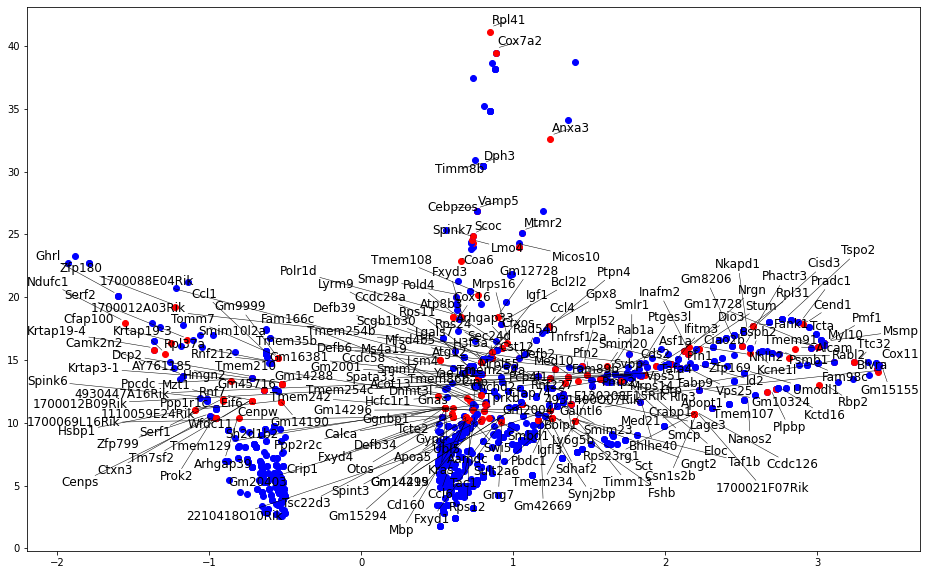

In [184]:
plt.figure(figsize=(16,10))
xydots = [(x,y) for x,y in zip(list(-mydf_inner["avg_logFC"]), list(-np.log10(mydf_inner["qvalue"])))]
dotgene = list(mydf_inner["gene"])
texts = []
seenProts = set()

for i in range(len(xydots)):
    x = xydots[i][0]
    y = xydots[i][1]
    
    if not dotgene[i] in seenProts and abs(y) >= 10 and abs(x) >= 0.5:
        texts.append(plt.text(x * (1 + 0.01), y * (1 + 0.01) , dotgene[i], fontsize=12))
        plt.plot(x, y, 'ro')
        seenProts.add(dotgene[i])
    else:
        plt.plot(x, y, 'bo')

adjust_text(texts, force_points=0.2, force_text=0.2, expand_points=(1, 1), expand_text=(1, 1), arrowprops=dict(arrowstyle="-", color='black', lw=0.5))
plt.show()

Again the same candidates as previously shown can be seen.

Mrps14, Ccdc126, Ndufa11 - which mostly relate to mitochondrial activity.


#### Timm8b
Likewise is Timm8b significantly upregulated.

Timm8b is found to be upregulated in colon mucosa cardinogenesis of diabetes type 2 patients, and is associated with mitochondrial dysfunction.
A similar pattern might be observable in atherosclerosis as well.

Del Puerto-Nevado, L., Santiago-Hernandez, A., Solanes-Casado, S., Gonzalez, N., Ricote, M., Corton, M., Prieto, I., Mas, S., Sanz, A. B., Aguilera, O., Gomez-Guerrero, C., Ayuso, C., Ortiz, A., Rojo, F., Egido, J., Garcia-Foncillas, J., Minguez, P., & Alvarez-Llamas, G. (2019). Diabetes-mediated promotion of colon mucosa carcinogenesis is associated with mitochondrial dysfunction. Molecular Oncology, 13(9), 1887–1897. https://doi.org/10.1002/1878-0261.12531

## GO analysis for plaque-DE experiment

In [ ]:
! wget http://ftp.ebi.ac.uk//pub/databases/GO/goa/HUMAN/goa_human.gaf.gz

In [ ]:
! wget 'http://purl.obolibrary.org/obo/go/go-basic.obo'

In [287]:
import gzip
import Bio.UniProt.GOA as GOA
from goatools.go_enrichment import GOEnrichmentStudy
from goatools import obo_parser

goa_human = "goa_human.gaf.gz"

# File is a gunzip file, so we need to open it in this way
with gzip.open(goa_human, 'rt') as arab_gaf_fp:
    human_funcs = {}  # Initialise the dictionary of functions
    
    # Iterate on each function using Bio.UniProt.GOA library.
    for entry in GOA.gafiterator(arab_gaf_fp):
        uniprot_id = entry.pop('DB_Object_Symbol')
        human_funcs[uniprot_id] = entry

        
go = obo_parser.GODag("go-basic.obo")


go-basic.obo: fmt(1.2) rel(2020-09-10) 47,314 GO Terms


In [288]:

pop = [x.upper() for x in pw_theo.protein2mass]
assoc = {}

for x in human_funcs:
    if x not in assoc:
        assoc[x] = set()
    assoc[x].add(str(human_funcs[x]['GO_ID']))

methods = ["bonferroni", "fdr"]



In [290]:
study = list(set([x.upper() for x in mydf_vessel["gene"]])) #mydf_all

In [291]:
len(study)

186

In [292]:
g = GOEnrichmentStudy(pop, assoc, go,
                         propagate_counts=False,
                         alpha=0.05,
                         methods=['bonferroni', 'fdr_bh'])

g_vessel = g.run_study(study)




Load GOEA Gene Ontology Analysis ...
 69%  5,014 of  7,283 population items found in association

Run GOEA Gene Ontology Analysis: current study set of 186 IDs ... 75%    139 of    186 study items found in association
100%    186 of    186 study items found in population(7283)
Calculating 2,054 uncorrected p-values using fisher
   2,054 GO terms are associated with  5,014 of  7,283 population items
     126 GO terms are associated with    139 of    186 study items
  METHOD bonferroni:
       0 GO terms found significant (< 0.05=alpha) (  0 enriched +   0 purified): local bonferroni
       0 study items associated with significant GO IDs (enriched)
       0 study items associated with significant GO IDs (purified)
  METHOD fdr_bh:
       0 GO terms found significant (< 0.05=alpha) (  0 enriched +   0 purified): statsmodels fdr_bh
       0 study items associated with significant GO IDs (enriched)
       0 study items associated with significant GO IDs (purified)


In [293]:
for x in sorted(g_vessel, key=lambda x: (x.study_count, -x.p_uncorrected), reverse=True):
    if x.study_count > 10:
        print(x.study_count, x)

In [296]:
atheroGenes = ['ABCA1', 'APOA1', 'PON1', 'CRP', 'OLR1', 'PLA2G7', 'SCARB1', 'APOB', 'ABCG1', 'PCSK9', 'ADIPOQ', 'LPA', 'CETP', 'CD36', 'CCL2', 'PLTP', 'MPO', 'APOE', 'PON2', 'KLF2', 'CX3CR1', 'LDLR', 'VCAM1', 'NOS3', 'AGER', 'CX3CL1', 'AHSG', 'PPARD', 'FABP4', 'EDN1', 'ICAM1', 'LIPG', 'NR1H3', 'RETN', 'PTX3', 'TLR4', 'HSPD1', 'SELP', 'NR4A3', 'PPARG', 'F3', 'APOM', 'SREBF2', 'TNFRSF11B', 'APOC3', 'LCAT', 'PPARA', 'LPL', 'PAPPA', 'APOA5', 'CD40LG', 'SAA1', 'ALOX15', 'TOR2A', 'LEP', 'GGT1', 'CD40', 'PON3', 'ALOX15B', 'TXN', 'NLRP3', 'GP6', 'NOX1', 'ITGB2', 'CHIT1', 'LRP1', 'PLA2G2A', 'CDH5', 'PHACTR1', 'TFPI', 'NOX4', 'NR1H2', 'PDE4D', 'HMOX1', 'C5', 'USF1', 'CCR2', 'MMP8', 'APOA2', 'ACE2', 'ALOX5', 'ALOX5AP', 'THBD', 'KL', 'SIRT1', 'ITGAM', 'APLN', 'MSR1', 'AGTR2', 'TNF', 'IL6', 'STAT1', 'NR4A1', 'TNFSF4', 'MAPK14', 'CYBA', 'AGT', 'APOA4', 'NAMPT', 'MAPK8', 'LIPC', 'SERPINE1', 'PRKCB', 'MMP9', 'PRKAA1', 'RBP4', 'SELL', 'NFE2L2', 'NR1H4', 'SELE', 'CD14', 'ANGPTL4', 'ITLN1', 'GCKR', 'EDNRA', 'TLR2', 'IL33', 'TNFSF12', 'UCP2', 'SOST', 'PPARGC1A', 'PECAM1', 'FGB', 'CYBB', 'CXCR2', 'MIF', 'CST3', 'NFKB1', 'KLF4', 'NPPB', 'VWF', 'AGTR1', 'NPY', 'HMGB1', 'FGF23', 'CDKN2B', 'CCR7', 'SERPINF1', 'TIMP3', 'CAV1', 'IL18', 'GDF15', 'BSG', 'IL17A', 'DPP4',]

In [297]:
inflammationGenes = ['Abcc1', 'Abcd1', 'Abcd2', 'Abhd12', 'Abr', 'Ace', 'Acer3', 'Ackr1', 'Ackr1', 'Ackr2', 'Ackr2', 'Acod1', 'Acod1', 'Acp5', 'Ada', 'Ada', 'Ada', 'Ada', 'Ada', 'Adam8', 'Adam8', 'Adam8', 'Adam8', 'Adam8', 'Adam17', 'Adamts12', 'Adcy1', 'Adcy7', 'Adcy8', 'Adcyap1', 'Adcyap1', 'Adipoq', 'Adora1', 'Adora1', 'Adora2a', 'Adora2a', 'Adora2b', 'Adora3', 'Adora3', 'Adora3', 'Adora3', 'Adra2a', 'Adrb2', 'Afap1l2', 'Afap1l2', 'Ager', 'Ager', 'Ager', 'Ager', 'Ager', 'Ager', 'Ager', 'Agt', 'Agt', 'Agt', 'Agtr1a', 'Agtr1a', 'Agtr1b', 'Agtr1b', 'Agtr2', 'Agtr2', 'Agtr2', 'Ahcy', 'Ahsg', 'Ahsg', 'Aif1', 'Aim2', 'Aimp1', 'Ak7', 'Akna', 'Akt1', 'Aldh2', 'Alox5', 'Alox5', 'Alox5', 'Alox5', 'Alox5', 'Alox5', 'Alox5', 'Alox5', 'Alox5', 'Alox5', 'Alox5ap', 'Alox5ap', 'Alox15', 'Ankrd42', 'Ano6', 'Anxa1', 'Anxa1', 'Anxa1', 'Anxa1', 'Aoah', 'Aoah', 'Aoc3', 'Aoc3', 'Ap3b1', 'Apoa1', 'Apod', 'Apoe', 'App', 'App', 'App', 'App', 'Appl1', 'Appl2', 'Arel1', 'Ash1l', 'Ash1l', 'Atm', 'Atrn', 'Axl', 'B4galt1', 'Bap1', 'Bap1', 'Bcl6', 'Bcl6', 'Bcl6', 'Bcl6b', 'Bcr', 'Bdkrb1', 'Bdkrb2', 'Bst1', 'Btk', 'Btk', 'Btk', 'C1qa', 'C1qa', 'C1qtnf3', 'C1qtnf12', 'C2cd4a', 'C2cd4a', 'C2cd4b', 'C2cd4b', 'C3', 'C3', 'C3', 'C3ar1', 'C5ar1', 'C5ar1', 'C5ar1', 'C5ar2', 'Calca', 'Calcrl', 'Camk1d', 'Camk4', 'Camp', 'Casp1', 'Casp1', 'Casp1', 'Casp1', 'Casp4', 'Casp4', 'Casp4', 'Casp6', 'Casp12', 'Ccl1', 'Ccl1', 'Ccl2', 'Ccl2', 'Ccl3', 'Ccl3', 'Ccl4', 'Ccl4', 'Ccl5', 'Ccl5', 'Ccl5', 'Ccl5', 'Ccl6', 'Ccl7', 'Ccl8', 'Ccl9', 'Ccl11', 'Ccl12', 'Ccl12', 'Ccl12', 'Ccl17', 'Ccl19', 'Ccl20', 'Ccl21a', 'Ccl21b', 'Ccl21c', 'Ccl22', 'Ccl24', 'Ccl24', 'Ccl25', 'Ccl26', 'Ccn3', 'Ccn4', 'Ccr1', 'Ccr1', 'Ccr1l1', 'Ccr2', 'Ccr2', 'Ccr2', 'Ccr2', 'Ccr2', 'Ccr2', 'Ccr3', 'Ccr4', 'Ccr5', 'Ccr5', 'Ccr5', 'Ccr6', 'Ccr7', 'Ccr7', 'Ccr7', 'Ccrl2', 'Ccrl2', 'Cd5l', 'Cd6', 'Cd6', 'Cd14', 'Cd14', 'Cd24a', 'Cd24a', 'Cd24a', 'Cd24a', 'Cd24a', 'Cd28', 'Cd40', 'Cd40', 'Cd40lg', 'Cd44', 'Cd44', 'Cd44', 'Cd47', 'Cd47', 'Cd47', 'Cd68', 'Cd81', 'Cd96', 'Cd96', 'Cd163', 'Cd163', 'Cd180', 'Cd200', 'Cd200', 'Cd200', 'Cd200r1', 'Cd200r1', 'Cd200r2', 'Cd200r3', 'Cd200r4', 'Cd276', 'Cd300a', 'Cdh5', 'Cdk19', 'Cebpa', 'Cebpb', 'Cebpb', 'Cela1', 'Cers6', 'Cfh', 'Cfh', 'Cfh', 'Chia1', 'Chia1', 'Chid1', 'Chil1', 'Chil3', 'Chil4', 'Chrna7', 'Chrna7', 'Chst1', 'Chst2', 'Chst4', 'Ciita', 'Clcf1', 'Clec10a', 'Clec10a', 'Clock', 'Clu', 'Cma1', 'Cmklr1', 'Cnr1', 'Cnr1', 'Cnr2', 'Cnr2', 'Cntf', 'Cntf', 'Cr2', 'Crh', 'Crh', 'Crhbp', 'Crlf2', 'Crp', 'Csf1', 'Csf1r', 'Cspg4', 'Csrp3', 'Cst7', 'Cst7', 'Ctla2a', 'Ctnnbip1', 'Ctsc', 'Ctss', 'Cuedc2', 'Cuedc2', 'Cx3cl1', 'Cx3cl1', 'Cx3cl1', 'Cx3cl1', 'Cx3cr1', 'Cx3cr1', 'Cx3cr1', 'Cxcl1', 'Cxcl1', 'Cxcl2', 'Cxcl3', 'Cxcl3', 'Cxcl5', 'Cxcl5', 'Cxcl9', 'Cxcl10', 'Cxcl13', 'Cxcl15', 'Cxcl15', 'Cxcl17', 'Cxcl17', 'Cxcr2', 'Cxcr3', 'Cxcr6', 'Cyba', 'Cybb', 'Cyld', 'Cyp19a1', 'Cyp26b1', 'Cysltr1', 'Cysltr1', 'Dab2ip', 'Dagla', 'Daglb', 'Ddt', 'Ddx3x', 'Dhx9', 'Dhx9', 'Dicer1', 'Dnase1', 'Dnase1l3', 'Dpep1', 'Drosha', 'Duoxa1', 'Duoxa2', 'Dusp10', 'Ecm1', 'Ednra', 'Ednrb', 'Egfr', 'Egfr', 'Eif2ak1', 'Elane', 'Elane', 'Elane', 'Elf3', 'Elf3', 'Enpp3', 'Epha2', 'Ephb6', 'Ephx2', 'Ephx2', 'Esr1', 'Ets1', 'Ets1', 'Ext1', 'F2', 'F2', 'F2r', 'F2r', 'F2rl1', 'F3', 'F8', 'F12', 'F12', 'F630003A18Rik', 'Fabp4', 'Fabp4', 'Fanca', 'Fancd2', 'Fcer1a', 'Fcer1g', 'Fcer1g', 'Fcer1g', 'Fcer1g', 'Fcer1g', 'Fcgr1', 'Fcgr1', 'Fcgr1', 'Fcgr1', 'Fcgr2b', 'Fcgr2b', 'Fcgr2b', 'Fcgr3', 'Fcgr3', 'Fcgr3', 'Fcgr3', 'Fcgr3', 'Fem1a', 'Fem1a', 'Fem1a', 'Fem1al', 'Ffar2', 'Ffar2', 'Ffar2', 'Ffar2', 'Ffar3', 'Ffar3', 'Ffar4', 'Ffar4', 'Fgfr1', 'Fn1', 'Fndc4', 'Fndc4', 'Foxf1', 'Foxp3', 'Foxp3', 'Foxp3', 'Fpr1', 'Fpr2', 'Fpr2', 'Fpr2', 'Fpr2', 'Fpr3', 'Fpr-rs3', 'Fpr-rs4', 'Fpr-rs6', 'Fpr-rs7', 'Fut7', 'Fut7', 'Fut7', 'Gal', 'Gata3', 'Gbp5', 'Gbp5', 'Ggt1', 'Ggt1', 'Ggt5', 'Ggt5', 'Ghrl', 'Ghrl', 'Ghsr', 'Gja1', 'Gm1987', 'Gm5849', 'Gm5849', 'Gper1', 'Gper1', 'Gpr4', 'Gpr17', 'Gpr17', 'Gpr31b', 'Gpr33', 'Gprc5b', 'Gps2', 'Gpsm3', 'Gpsm3', 'Gpsm3', 'Gpx1', 'Gpx2', 'Gpx4', 'Grn', 'Grn', 'Grn', 'Grn', 'Grn', 'Grn', 'Grn', 'Gsdmd', 'Gstp1', 'H2-T23', 'H2bc1', 'Hamp', 'Havcr2', 'Hc', 'Hc', 'Hck', 'Hdac5', 'Hdac7', 'Hdac9', 'Hgf', 'Hif1a', 'Hif1a', 'Hk1', 'Hmgb1', 'Hmgb2', 'Hmgb2', 'Hmox1', 'Hnrnpa0', 'Hp', 'Hp', 'Hps1', 'Hrh4', 'Hrh4', 'Hrh4', 'Hspd1', 'Hyal1', 'Hyal2', 'Hyal2', 'Hyal3', 'Icam1', 'Ido1', 'Ido1', 'Ido1', 'Ier3', 'Ifng', 'Ifng', 'Ifng', 'Ifng', 'Ifng', 'Ifng', 'Ifng', 'Ifng', 'Ifng', 'Ifngr1', 'Ifngr1', 'Ifngr1', 'Ifngr2', 'Igf1', 'Igh-7', 'Igh-7', 'Igh-8', 'Ighg1', 'Ighg1', 'Ighg1', 'Ighg2a', 'Ighg2a', 'Ighg2a', 'Ighg2b', 'Ighg2b', 'Il1a', 'Il1a', 'Il1a', 'Il1a', 'Il1b', 'Il1b', 'Il1b', 'Il1b', 'Il1b', 'Il1b', 'Il1f5', 'Il1f5', 'Il1f6', 'Il1f6', 'Il1f6', 'Il1f8', 'Il1f8', 'Il1f9', 'Il1f9', 'Il1f10', 'Il1f10', 'Il1r1', 'Il1r1', 'Il1r1', 'Il1r2', 'Il1rap', 'Il1rl1', 'Il1rl2', 'Il1rl2', 'Il1rl2', 'Il1rn', 'Il1rn', 'Il1rn', 'Il1rn', 'Il2', 'Il2ra', 'Il2ra', 'Il2ra', 'Il2ra', 'Il4', 'Il4', 'Il4', 'Il4', 'Il4', 'Il4', 'Il4', 'Il4', 'Il4', 'Il4ra', 'Il5ra', 'Il6', 'Il6', 'Il6', 'Il6', 'Il10', 'Il10', 'Il10', 'Il10', 'Il12b', 'Il13', 'Il13', 'Il13', 'Il16', 'Il17a', 'Il17a', 'Il17a', 'Il17a', 'Il17a', 'Il17b', 'Il17b', 'Il17c', 'Il17c', 'Il17c', 'Il17d', 'Il17d', 'Il17f', 'Il17f', 'Il17f', 'Il17f', 'Il17ra', 'Il17ra', 'Il17ra', 'Il17rb', 'Il17rc', 'Il17rc', 'Il17re', 'Il18', 'Il18', 'Il18r1', 'Il18rap', 'Il20rb', 'Il20rb', 'Il22', 'Il22ra2', 'Il23a', 'Il23r', 'Il25', 'Il25', 'Il25', 'Il25', 'Il27', 'Il31ra', 'Il33', 'Il33', 'Il33', 'Il34', 'Ins2', 'Ins2', 'Ins2', 'Irak2', 'Irf3', 'Irf5', 'Isl1', 'Itga2', 'Itgam', 'Itgam', 'Itgam', 'Itgav', 'Itgb1', 'Itgb2', 'Itgb2l', 'Itgb6', 'Itgb6', 'Itih4', 'Jak2', 'Jak2', 'Jak2', 'Jam3', 'Jun', 'Kars', 'Kdm6b', 'Kit', 'Kl', 'Klk1b1', 'Klkb1', 'Klrh1', 'Kng1', 'Kpna6', 'Krt1', 'Krt1', 'Krt16', 'Lacc1', 'Lacc1', 'Lat', 'Lat', 'Lbp', 'Lbp', 'Lbp', 'Lbp', 'Ldlr', 'Ldlr', 'Ldlr', 'Lep', 'Lgals9', 'Lias', 'Lilra5', 'Lilrb4a', 'Lilrb4a', 'Lipa', 'Loxl3', 'Loxl3', 'Lpcat3', 'Lpl', 'Lrfn5', 'Lrp1', 'Lrrc19', 'Lrrk2', 'Lta', 'Lta', 'Ltb4r1', 'Ltb4r2', 'Lxn', 'Ly86', 'Ly96', 'Lyn', 'Lyn', 'Lyn', 'Macir', 'Macir', 'Macir', 'Macir', 'Map2k3', 'Mapk8', 'Mapk14', 'Mapkapk2', 'Mapkapk2', 'Mas1', 'Mas1', 'Mcph1', 'Mdk', 'Mdk', 'Mdk', 'Mdk', 'Mdk', 'Mecom', 'Mefv', 'Mefv', 'Mefv', 'Mep1b', 'Metrnl', 'Mfhas1', 'Mfhas1', 'Mfhas1', 'Mgll', 'Mif', 'Mif', 'Mir21a', 'Mir147', 'Mir155', 'Mir301', 'Mir324', 'Mir883b', 'Mir883b', 'Mir7116', 'Mir7116', 'Mir7578', 'Mmp8', 'Mmp8', 'Mmp8', 'Mmp8', 'Mmp25', 'Mrgpra3', 'Ms4a2', 'Msmp', 'Muc19', 'Muc19', 'Muc19', 'Muc19', 'Muc19', 'Mvk', 'Myd88', 'Myd88', 'Myd88', 'Myd88', 'Mylk3', 'Naip1', 'Naip2', 'Naip2', 'Naip5', 'Naip5', 'Naip6', 'Naip6', 'Naip7', 'Nampt', 'Napepld', 'Ncf1', 'Ndfip1', 'Ndst1', 'Ndufc2', 'Ndufs4', 'Nfe2l1', 'Nfe2l2', 'Nfkb1', 'Nfkbia', 'Nfkbid', 'Nfkbiz', 'Nfkbiz', 'Nlrc3', 'Nlrc3', 'Nlrc3', 'Nlrc4', 'Nlrc4', 'Nlrp1a', 'Nlrp1b', 'Nlrp1b', 'Nlrp3', 'Nlrp3', 'Nlrp3', 'Nlrp3', 'Nlrp3', 'Nlrp4a', 'Nlrp4b', 'Nlrp4c', 'Nlrp4e', 'Nlrp4f', 'Nlrp6', 'Nlrp6', 'Nlrp6', 'Nlrp6', 'Nlrp9a', 'Nlrp9b', 'Nlrp9c', 'Nlrp10', 'Nlrp10', 'Nlrp12', 'Nlrp12', 'Nlrx1', 'Nod2', 'Nod2', 'Nod2', 'Nod2', 'Nos2', 'Nos2', 'Nos2', 'Notch1', 'Notch2', 'Nppa', 'Npy5r', 'Npy5r', 'Nr1d1', 'Nr1d1', 'Nr1d1', 'Nr1d1', 'Nr1d2', 'Nr1d2', 'Nr1h3', 'Nr1h3', 'Nr1h4', 'Nr1h4', 'Nr1h4', 'Nrros', 'Nt5e', 'Nupr1', 'Nupr1', 'Odam', 'Olr1', 'Olr1', 'Orm1', 'Orm2', 'Osm', 'Otulin', 'Otulin', 'Otulin', 'P2rx1', 'P2rx7', 'P2rx7', 'Park7', 'Park7', 'Park7', 'Parp4', 'Pbk', 'Pdcd4', 'Pdcd4', 'Pdcd4', 'Pdcd4', 'Pde2a', 'Pde5a', 'Per1', 'Pf4', 'Pglyrp1', 'Pglyrp2', 'Pik3ap1', 'Pik3cd', 'Pik3cg', 'Pik3cg', 'Pja2', 'Pla2g2d', 'Pla2g2d', 'Pla2g2e', 'Pla2g3', 'Pla2g3', 'Pla2g3', 'Pla2g3', 'Pla2g3', 'Pla2g4a', 'Pla2g5', 'Pla2g7', 'Pla2g10', 'Pla2g10', 'Pla2g10', 'Pla2g10', 'Pla2g10', 'Pla2g10', 'Pla2g10', 'Pla2g10', 'Plaa', 'Pld3', 'Pld3', 'Pld4', 'Pld4', 'Plgrkt', 'Plp1', 'Pmp22', 'Pnma1', 'Polb', 'Ppara', 'Ppara', 'Ppara', 'Ppard', 'Ppard', 'Pparg', 'Pparg', 'Pparg', 'Pparg', 'Pparg', 'Ppbp', 'Ppbp', 'Prcp', 'Prdx2', 'Prkca', 'Prkcq', 'Prkcz', 'Prkd1', 'Proc', 'Psen1', 'Psen1', 'Psma1', 'Psma1', 'Psmb4', 'Pstpip1', 'Ptafr', 'Ptgdr', 'Ptgdr', 'Ptger1', 'Ptger2', 'Ptger3', 'Ptger3', 'Ptger3', 'Ptger3', 'Ptger4', 'Ptger4', 'Ptger4', 'Ptger4', 'Ptger4', 'Ptger4', 'Ptges', 'Ptges', 'Ptgfr', 'Ptgir', 'Ptgis', 'Ptgs1', 'Ptgs2', 'Ptgs2', 'Ptgs2', 'Ptgs2', 'Ptn', 'Ptpn2', 'Pxk', 'Pycard', 'Pycard', 'Pycard', 'Pycard', 'Rabgef1', 'Rarres2', 'Rarres2', 'Rasgrp1', 'Rb1', 'Rbpj', 'Reg3a', 'Reg3a', 'Reg3b', 'Reg3b', 'Reg3g', 'Reg3g', 'Rel', 'Rela', 'Rela', 'Rela', 'Rela', 'Relb', 'Rhbdd3', 'Rictor', 'Ripk1', 'Ripk1', 'Ripk1', 'Rora', 'Rora', 'Rps6ka4', 'Rps6ka5', 'Rps19', 'Rps19', 'Rtn4', 'S1pr3', 'S100a7a', 'S100a7a', 'S100a8', 'S100a8', 'S100a8', 'S100a8', 'S100a8', 'S100a9', 'S100a9', 'S100a9', 'S100a9', 'S100a9', 'S100a9', 'Saa1', 'Saa2', 'Saa3', 'Saa4', 'Sbno2', 'Sbno2', 'Sbno2', 'Scgb1a1', 'Scn9a', 'Scyl1', 'Scyl1', 'Scyl3', 'Sdc1', 'Seh1l', 'Sele', 'Selenos', 'Selenos', 'Selp', 'Sema7a', 'Sema7a', 'Sema7a', 'Serpina1b', 'Serpina3n', 'Serpinb1a', 'Serpinb9', 'Serpine1', 'Serpine1', 'Serpinf1', 'Serpinf2', 'Setd6', 'Sgms1', 'Sharpin', 'Shpk', 'Sigirr', 'Siglece', 'Siglecg', 'Siglecg', 'Sirpa', 'Sirpa', 'Sirpa', 'Slamf1', 'Slamf8', 'Slamf8', 'Slc7a2', 'Slc7a2', 'Slc7a2', 'Slc11a1', 'Slit2', 'Smad3', 'Smo', 'Smpdl3b', 'Smpdl3b', 'Snap23', 'Snca', 'Snca', 'Snx4', 'Socs3', 'Socs5', 'Sod1', 'Spata2', 'Sphk1', 'Sphk1', 'Sphk1', 'Sphk1', 'Spn', 'Stab1', 'Stap1', 'Stard7', 'Stard7', 'Stat3', 'Stat3', 'Stat3', 'Stat5a', 'Stat5b', 'Stat5b', 'Sting1', 'Stk39', 'Sucnr1', 'Syk', 'Syt11', 'Tac1', 'Tac1', 'Tac1', 'Tac4', 'Tafa3', 'Tafa3', 'Tafa3', 'Tafa3', 'Tarm1', 'Tbc1d23', 'Tbxa2r', 'Tbxa2r', 'Tcirg1', 'Tff2', 'Tff2', 'Tgfb1', 'Tgfb1', 'Tgfb1', 'Tgm2', 'Thbs1', 'Thbs1', 'Themis2', 'Ticam1', 'Ticam1', 'Ticam1', 'Ticam2', 'Timp1', 'Tirap', 'Tlr1', 'Tlr1', 'Tlr2', 'Tlr2', 'Tlr2', 'Tlr2', 'Tlr2', 'Tlr3', 'Tlr3', 'Tlr3', 'Tlr4', 'Tlr4', 'Tlr4', 'Tlr4', 'Tlr4', 'Tlr4', 'Tlr4', 'Tlr4', 'Tlr4', 'Tlr5', 'Tlr6', 'Tlr6', 'Tlr6', 'Tlr6', 'Tlr6', 'Tlr7', 'Tlr8', 'Tlr8', 'Tlr9', 'Tlr9', 'Tlr9', 'Tlr9', 'Tlr11', 'Tlr12', 'Tlr13', 'Tnf', 'Tnf', 'Tnf', 'Tnf', 'Tnf', 'Tnf', 'Tnf', 'Tnf', 'Tnf', 'Tnf', 'Tnf', 'Tnfaip3', 'Tnfaip3', 'Tnfaip3', 'Tnfaip3', 'Tnfaip3', 'Tnfaip6', 'Tnfaip6', 'Tnfaip8l2', 'Tnfaip8l2', 'Tnfrsf1a', 'Tnfrsf1a', 'Tnfrsf1a', 'Tnfrsf1a', 'Tnfrsf1a', 'Tnfrsf1b', 'Tnfrsf1b', 'Tnfrsf1b', 'Tnfrsf1b', 'Tnfrsf1b', 'Tnfrsf4', 'Tnfrsf4', 'Tnfrsf4', 'Tnfrsf11a', 'Tnfsf4', 'Tnfsf4', 'Tnfsf4', 'Tnfsf4', 'Tnfsf4', 'Tnfsf11', 'Tnfsf18', 'Tnip1', 'Tnip1', 'Tnip1', 'Tnip2', 'Tollip', 'Tpsb2', 'Tradd', 'Traf3ip2', 'Trem1', 'Trem2', 'Trem2', 'Trem2', 'Trem2', 'Trem2', 'Trem2', 'Trem2', 'Trem2', 'Trem2', 'Trem2', 'Trem2', 'Trex1', 'Trex1', 'Trex1', 'Trex1', 'Tril', 'Trim55', 'Trp73', 'Trpv1', 'Trpv1', 'Trpv4', 'Tslp', 'Tspan2', 'Ttbk1', 'Ttc39aos1', 'Tusc2', 'Tusc2', 'Tyro3', 'Tyrobp', 'Tyrobp', 'Tyrobp', 'Uaca', 'Ulk4', 'Umod', 'Unc13d', 'Usp18', 'Vamp7', 'Vamp8', 'Vnn1', 'Vnn1', 'Vnn1', 'Vps35', 'Wdr83', 'Wdr83', 'Wfdc1', 'Wnt5a', 'Xcl1', 'Xcl1', 'Xcl1', 'Ywhaz', 'Zbp1', 'Zbp1', 'Zc3h12a', 'Zc3h12a', 'Zfp35', 'Zfp36', 'Zfp36', 'Zfp36', 'Zfp580', 'Zp3', 'Zp3']
inflammationGenes = set([str(x).upper() for x in inflammationGenes])

In [204]:
combSpec.mass_intensity(14109, scaled=True)

In [294]:
#myDFGenes_inner = set([str(x).upper() for x in mydf_all["gene"]])
myDFGenes_all = set([str(x).upper() for x in mydf_all["gene"]])
myDFGenes_outer = set([str(x).upper() for x in mydf_vessel["gene"]])

In [298]:
relgenes = set()
for descr, deGenes in [('outer', myDFGenes_outer), ('all', myDFGenes_all)]:
    
    print(descr, "atheroGenes", deGenes.intersection(atheroGenes))
    print(descr, "inflammationGenes", deGenes.intersection(inflammationGenes))
    
    relgenes = relgenes.union(deGenes.intersection(atheroGenes))
    relgenes = relgenes.union(deGenes.intersection(inflammationGenes))

outer atheroGenes {'LEP', 'APOA5', 'ALOX5AP'}
outer inflammationGenes {'PLA2G2E', 'LEP', 'MSMP', 'ALOX5AP', 'CCL4', 'CCL6', 'GHRL', 'HAMP', 'CALCA'}
all atheroGenes {'LEP', 'APOA5', 'ALOX5AP'}
all inflammationGenes {'PLA2G2E', 'LEP', 'MSMP', 'ALOX5AP', 'IGF1', 'CCL4', 'CCL6', 'GHRL', 'HAMP', 'CALCA'}


2020-12-14 09:41:50,371  CombinedSpectra  INFO: Processing Mass 17092.86939999998 with best existing mass 17092.911259726272
2020-12-14 09:41:50,380  CombinedSpectra  INFO: Processing Mass 18473.192599999988 with best existing mass 18473.768149917963
2020-12-14 09:41:50,388  CombinedSpectra  INFO: Processing Mass 15991.425699999983 with best existing mass 15991.24401399957
2020-12-14 09:41:50,399  CombinedSpectra  INFO: Processing Mass 15196.506799999977 with best existing mass 15195.93081057769
2020-12-14 09:41:50,408  CombinedSpectra  INFO: Processing Mass 17887.78829999999 with best existing mass 17888.22446314815
2020-12-14 09:41:50,416  CombinedSpectra  INFO: Processing Mass 17092.86939999998 with best existing mass 17092.911259726272
2020-12-14 09:41:50,424  CombinedSpectra  INFO: Processing Mass 18473.192599999988 with best existing mass 18473.768149917963
2020-12-14 09:41:50,433  CombinedSpectra  INFO: Processing Mass 15991.425699999983 with best existing mass 15991.24401399957

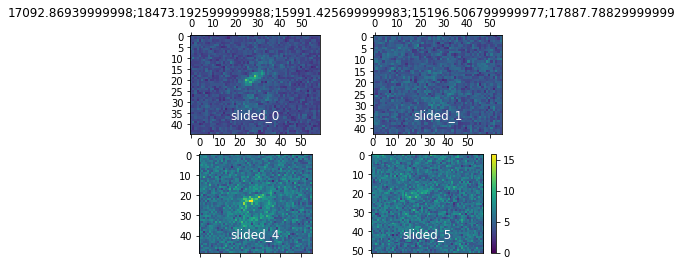

In [299]:
_ = combSpec.mass_heatmap(pw_theo.get_masses_for_protein("Igf1"))

2020-12-14 09:45:17,272  CombinedSpectra  INFO: Processing Mass 14064.970199999983 with best existing mass 14065.590033797827
2020-12-14 09:45:17,281  CombinedSpectra  INFO: Processing Mass 8549.8001 with best existing mass 8549.708139097691
2020-12-14 09:45:17,289  CombinedSpectra  INFO: Processing Mass 15141.055599999985 with best existing mass 15141.602014898019
2020-12-14 09:45:17,297  CombinedSpectra  INFO: Processing Mass 14064.970199999983 with best existing mass 14065.590033797827
2020-12-14 09:45:17,305  CombinedSpectra  INFO: Processing Mass 8549.8001 with best existing mass 8549.708139097691
2020-12-14 09:45:17,313  CombinedSpectra  INFO: Processing Mass 15141.055599999985 with best existing mass 15141.602014898019
2020-12-14 09:45:17,322  CombinedSpectra  INFO: Processing Mass 14064.970199999983 with best existing mass 14065.590033797827
2020-12-14 09:45:17,330  CombinedSpectra  INFO: Processing Mass 8549.8001 with best existing mass 8549.708139097691
2020-12-14 09:45:17,33

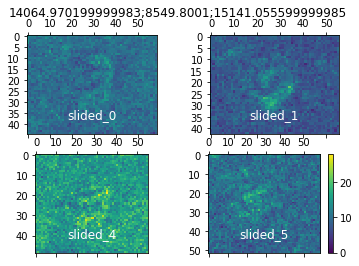

In [304]:
_ = combSpec.mass_heatmap(pw_theo.get_masses_for_protein("Calca"))

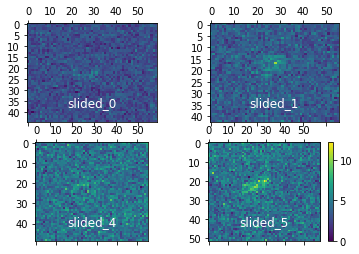

In [254]:
_ = combSpec.mass_heatmap(pw_theo.get_masses_for_protein("Ccl1"))

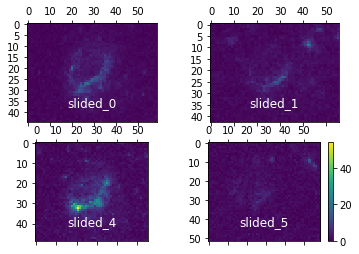

In [255]:
_ = combSpec.mass_heatmap(pw_theo.get_masses_for_protein("Ccl4"))

In [ ]:
_ = combSpec.mass_heatmap(pw_theo.get_masses_for_protein("Ccl25"))

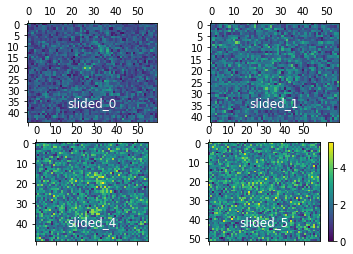

In [243]:
_ = combSpec.mass_heatmap(pw_theo.get_masses_for_protein("Ccl25"))

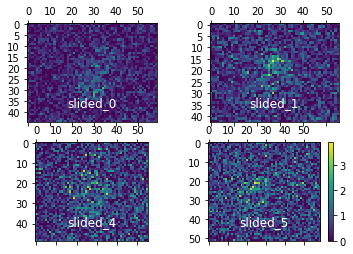

In [249]:
_ = combSpec.mass_heatmap(pw_theo.get_masses_for_protein("Ccl9"))

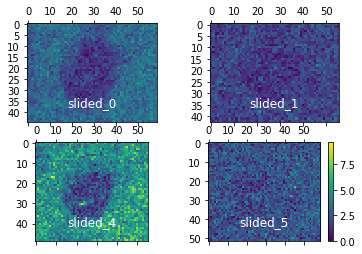

In [250]:
_ = combSpec.mass_heatmap(pw_theo.get_masses_for_protein("Alox5ap"))

ALOX5AP


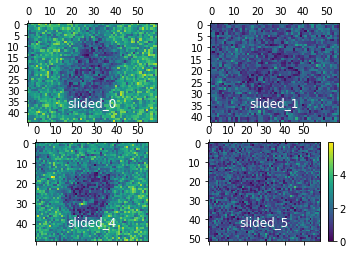

outer     clusterID              gene_ident    gene_mass     gene  protein_mass  \
387  slided_0  mass_8584_418203004148  8584.418203  Alox5ap     8587.0573   
389  slided_0  mass_8585_927336217472  8585.927336  Alox5ap     8587.0573   
391  slided_0  mass_8587_436469430797  8587.436469  Alox5ap     8587.0573   
394  slided_0  mass_8588_945602644122  8588.945603  Alox5ap     8587.0573   

     avg_logFC        qvalue  num  anum      mean    median  num_bg  anum_bg  \
387  -1.264126  6.506938e-43  144   144  2.339953  2.316269     226      217   
389  -1.306904  8.663216e-44  144   144  2.167519  2.109372     226      224   
391  -1.316710  1.002728e-43  144   144  2.043376  2.000331     226      215   
394  -1.322773  1.283208e-42  144   144  1.910559  1.866453     226      215   

      mean_bg  median_bg  
387  0.974243   0.934020  
389  0.876084   0.840054  
391  0.820312   0.807191  
394  0.763776   0.713790  
inner     clusterID              gene_ident    gene_mass     gene  prote

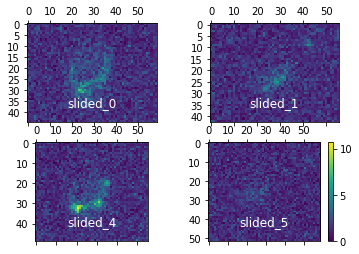

outer Empty DataFrame
Columns: [clusterID, gene_ident, gene_mass, gene, protein_mass, avg_logFC, qvalue, num, anum, mean, median, num_bg, anum_bg, mean_bg, median_bg]
Index: []
inner     clusterID               gene_ident     gene_mass   gene  protein_mass  \
689  slided_0  mass_12975_995853777718  12975.995854  Apoa5    12977.6348   
694  slided_0  mass_12977_504986991042  12977.504987  Apoa5    12977.6348   
697  slided_0  mass_12979_014120204367  12979.014120  Apoa5    12977.6348   
699  slided_0   mass_12980_52325341769  12980.523253  Apoa5    12977.6348   

     avg_logFC        qvalue  num  anum      mean    median  num_bg  anum_bg  \
689  -0.688913  1.127627e-10  170   170  1.522289  1.289111     105      104   
694  -0.685220  1.310783e-10  170   170  1.490492  1.282755     105      104   
697  -0.682145  1.224063e-10  170   170  1.457372  1.338783     105      105   
699  -0.690951  3.809076e-11  170   170  1.390619  1.295350     105      103   

      mean_bg  median_bg  
689

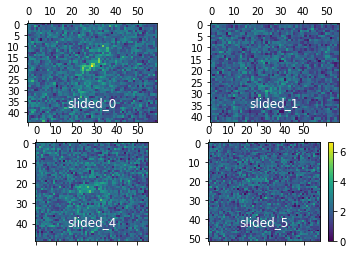

outer Empty DataFrame
Columns: [clusterID, gene_ident, gene_mass, gene, protein_mass, avg_logFC, qvalue, num, anum, mean, median, num_bg, anum_bg, mean_bg, median_bg]
Index: []
inner      clusterID               gene_ident     gene_mass   gene  protein_mass  \
1050  slided_0  mass_15161_220746671233  15161.220747  Apoc3    15162.8542   
1054  slided_0  mass_15162_729879884557  15162.729880  Apoc3    15162.8542   
1057  slided_0  mass_15164_239013097882  15164.239013  Apoc3    15162.8542   
1059  slided_0  mass_15165_748146311205  15165.748146  Apoc3    15162.8542   

      avg_logFC        qvalue  num  anum      mean    median  num_bg  anum_bg  \
1050  -0.554369  3.426229e-09  170   170  1.743144  1.555694     105      104   
1054  -0.546391  1.014404e-08  170   170  1.750429  1.577329     105      105   
1057  -0.531809  2.020764e-08  170   170  1.776105  1.556437     105      105   
1059  -0.516555  4.007192e-08  170   170  1.799177  1.603383     105      105   

       mean_bg  medi

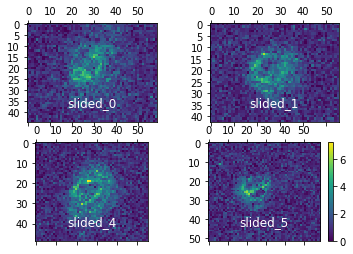

outer     clusterID              gene_ident    gene_mass  gene  protein_mass  \
248  slided_0  mass_8320_319890672405  8320.319891  Apoe     8322.2202   
249  slided_0   mass_8321_82902388573  8321.829024  Apoe     8322.2202   
250  slided_0  mass_8323_338157099053  8323.338157  Apoe     8322.2202   
251  slided_0  mass_8324_847290312377  8324.847290  Apoe     8322.2202   

     avg_logFC        qvalue  num  anum      mean    median  num_bg  anum_bg  \
248   0.796871  9.367610e-29  144   143  1.168134  1.106316     226      226   
249   0.956483  1.174877e-39  144   144  1.294582  1.272676     226      226   
250   1.120973  1.484730e-47  144   142  1.379993  1.355328     226      226   
251   1.248783  3.386248e-52  144   144  1.389944  1.276985     226      226   

      mean_bg  median_bg  
248  2.029433   1.967156  
249  2.512231   2.455951  
250  3.001397   2.883319  
251  3.303076   3.084786  
inner Empty DataFrame
Columns: [clusterID, gene_ident, gene_mass, gene, protein_mass, a

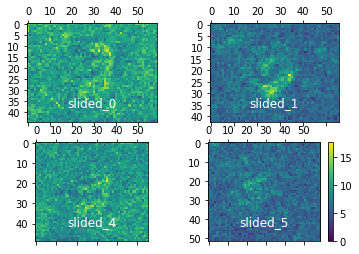

outer     clusterID              gene_ident    gene_mass   gene  protein_mass  \
334  slided_0  mass_8548_199005884366  8548.199006  Calca     8549.8001   
339  slided_0  mass_8549_708139097691  8549.708139  Calca     8549.8001   
341  slided_0  mass_8551_217272311014  8551.217272  Calca     8549.8001   
344  slided_0   mass_8552_72640552434  8552.726406  Calca     8549.8001   

     avg_logFC        qvalue  num  anum      mean    median  num_bg  anum_bg  \
334  -1.273282  4.097453e-58  144   144  3.804649  3.666708     226      226   
339  -1.231817  1.507235e-56  144   144  3.978130  3.898052     226      226   
341  -1.217445  1.502573e-55  144   144  4.069568  4.003571     226      226   
344  -1.259619  3.813024e-57  144   144  4.175975  4.111205     226      226   

      mean_bg  median_bg  
334  1.574049   1.487674  
339  1.693811   1.653862  
341  1.750092   1.669279  
344  1.744114   1.664831  
inner     clusterID              gene_ident    gene_mass   gene  protein_mass  \
3

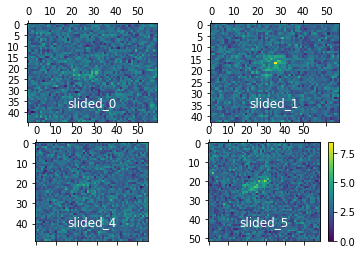

outer Empty DataFrame
Columns: [clusterID, gene_ident, gene_mass, gene, protein_mass, avg_logFC, qvalue, num, anum, mean, median, num_bg, anum_bg, mean_bg, median_bg]
Index: []
inner     clusterID               gene_ident     gene_mass  gene  protein_mass  \
633  slided_0  mass_10274_647401927308  10274.647402  Ccl1    10276.2139   
638  slided_0  mass_10276_156535140633  10276.156535  Ccl1    10276.2139   
642  slided_0  mass_10277_665668353959  10277.665668  Ccl1    10276.2139   
643  slided_0  mass_10279_174801567282  10279.174802  Ccl1    10276.2139   

     avg_logFC        qvalue  num  anum      mean    median  num_bg  anum_bg  \
633   0.625654  3.157646e-16  170   170  1.642036  1.621348     105      105   
638   0.626838  1.818902e-16  170   170  1.621333  1.603961     105      105   
642   0.619899  5.866359e-16  170   170  1.561570  1.559694     105      105   
643   0.607263  1.900390e-15  170   170  1.481347  1.536484     105      105   

      mean_bg  median_bg  
633  2.5

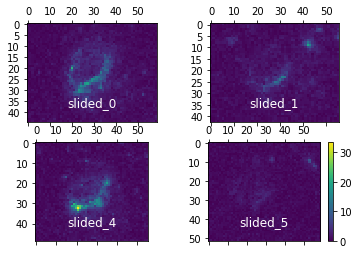

outer     clusterID               gene_ident     gene_mass  gene  protein_mass  \
745  slided_0   mass_10169_00807699461  10169.008077  Ccl4    10167.7164   
748  slided_0  mass_10170_517210207936  10170.517210  Ccl4    10167.7164   

     avg_logFC        qvalue  num  anum      mean    median  num_bg  anum_bg  \
745   0.511604  8.335756e-07  144   144  1.830176  1.759693     226      226   
748   0.535208  4.847055e-08  144   144  1.574439  1.542799     226      226   

      mean_bg  median_bg  
745  2.609163   2.025145  
748  2.281600   1.812508  
inner     clusterID               gene_ident     gene_mass  gene  protein_mass  \
596  slided_0  mass_10165_989810567964  10165.989811  Ccl4    10167.7164   
600  slided_0  mass_10167_498943781287  10167.498944  Ccl4    10167.7164   
604  slided_0   mass_10169_00807699461  10169.008077  Ccl4    10167.7164   
607  slided_0  mass_10170_517210207936  10170.517210  Ccl4    10167.7164   

     avg_logFC        qvalue  num  anum      mean    med

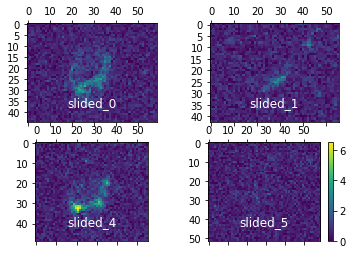

outer Empty DataFrame
Columns: [clusterID, gene_ident, gene_mass, gene, protein_mass, avg_logFC, qvalue, num, anum, mean, median, num_bg, anum_bg, mean_bg, median_bg]
Index: []
inner     clusterID               gene_ident     gene_mass  gene  protein_mass  \
701  slided_0  mass_12982_032386631015  12982.032387  Ccl6     12983.868   
704  slided_0  mass_12983_541519844339  12983.541520  Ccl6     12983.868   
707  slided_0  mass_12985_050653057664  12985.050653  Ccl6     12983.868   
710  slided_0  mass_12986_559786270987  12986.559786  Ccl6     12983.868   

     avg_logFC        qvalue  num  anum      mean    median  num_bg  anum_bg  \
701  -0.685562  3.604728e-11  170   170  1.318364  1.245011     105      102   
704  -0.655948  1.198657e-10  170   170  1.281670  1.194758     105      103   
707  -0.616208  1.300493e-09  170   170  1.235710  1.129089     105      104   
710  -0.563968  4.124520e-08  170   169  1.160621  1.083548     105      104   

      mean_bg  median_bg  
701  0.8

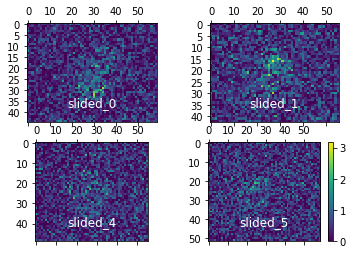

outer      clusterID               gene_ident     gene_mass  gene  protein_mass  \
1022  slided_0   mass_13867_89358285235  13867.893583  Ccl9    13870.7528   
1024  slided_0  mass_13869_402716065675  13869.402716  Ccl9    13870.7528   
1026  slided_0  mass_13870_911849278998  13870.911849  Ccl9    13870.7528   
1028  slided_0  mass_13872_420982492324  13872.420982  Ccl9    13870.7528   

      avg_logFC        qvalue  num  anum      mean    median  num_bg  anum_bg  \
1022   0.754773  1.217692e-10  144   129  0.533836  0.497594     226      213   
1024   0.846901  8.342802e-11  144   128  0.442122  0.428585     226      208   
1026   0.843742  2.334464e-09  144   122  0.388656  0.312468     226      206   
1028   0.739392  4.844713e-07  144   124  0.368965  0.280957     226      207   

       mean_bg  median_bg  
1022  0.900777   0.829128  
1024  0.795216   0.687533  
1026  0.697521   0.582658  
1028  0.615977   0.500408  
inner     clusterID               gene_ident     gene_mass  ge

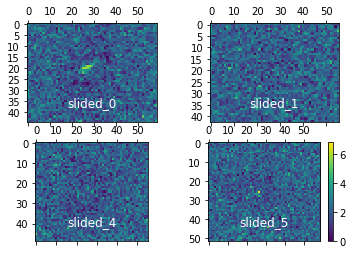

outer Empty DataFrame
Columns: [clusterID, gene_ident, gene_mass, gene, protein_mass, avg_logFC, qvalue, num, anum, mean, median, num_bg, anum_bg, mean_bg, median_bg]
Index: []
inner     clusterID              gene_ident    gene_mass   gene  protein_mass  \
181  slided_0  mass_7799_668932075538  7799.668932  Cd24a     7797.0207   

     avg_logFC    qvalue  num  anum      mean    median  num_bg  anum_bg  \
181  -0.563144  0.000353  170   168  1.575967  1.266537     105       97   

      mean_bg  median_bg  
181  1.066655   0.975583  
all Empty DataFrame
Columns: [clusterID, gene_ident, gene_mass, gene, protein_mass, avg_logFC, qvalue, num, anum, mean, median, num_bg, anum_bg, mean_bg, median_bg]
Index: []
CTSC


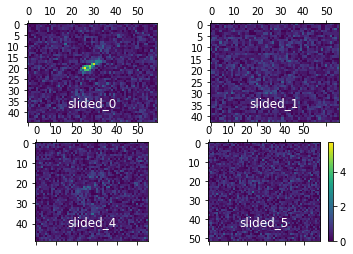

outer Empty DataFrame
Columns: [clusterID, gene_ident, gene_mass, gene, protein_mass, avg_logFC, qvalue, num, anum, mean, median, num_bg, anum_bg, mean_bg, median_bg]
Index: []
inner      clusterID               gene_ident     gene_mass  gene  protein_mass  \
1154  slided_0   mass_15561_14104820216  15561.141048  Ctsc    15561.8383   
1160  slided_0  mass_15562_650181415484  15562.650181  Ctsc    15561.8383   
1166  slided_0  mass_15564_159314628809  15564.159315  Ctsc    15561.8383   

      avg_logFC    qvalue  num  anum      mean    median  num_bg  anum_bg  \
1154  -0.518305  0.016815  170   159  0.904039  0.573887     105      104   
1160  -0.613834  0.003770  170   162  0.951948  0.603191     105      103   
1166  -0.736359  0.000596  170   161  0.995506  0.612978     105      102   

       mean_bg  median_bg  
1154  0.631193   0.610850  
1160  0.622058   0.604939  
1166  0.597555   0.591120  
all Empty DataFrame
Columns: [clusterID, gene_ident, gene_mass, gene, protein_mass, avg

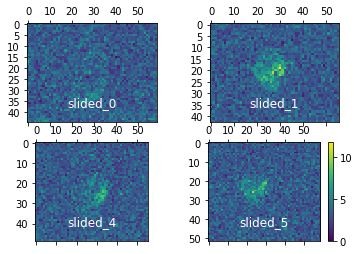

outer     clusterID              gene_ident    gene_mass  gene  protein_mass  \
406  slided_0  mass_8613_091734057309  8613.091734  Ghrl     8614.9029   
409  slided_0  mass_8614_600867270634  8614.600867  Ghrl     8614.9029   
411  slided_0  mass_8616_110000483957  8616.110000  Ghrl     8614.9029   
412  slided_0   mass_8617_61913369728  8617.619134  Ghrl     8614.9029   

     avg_logFC        qvalue  num  anum      mean    median  num_bg  anum_bg  \
406   0.543307  8.491044e-07  144   139  0.731615  0.641949     226      221   
409   0.824511  1.823595e-13  144   140  0.742099  0.663679     226      224   
411   1.097812  2.786588e-20  144   137  0.732711  0.656705     226      224   
412   1.346932  5.727107e-26  144   137  0.691370  0.633926     226      224   

      mean_bg  median_bg  
406  1.066189   0.927904  
409  1.314209   1.162337  
411  1.568221   1.358182  
412  1.758642   1.482160  
inner     clusterID              gene_ident    gene_mass  gene  protein_mass  \
83   sl

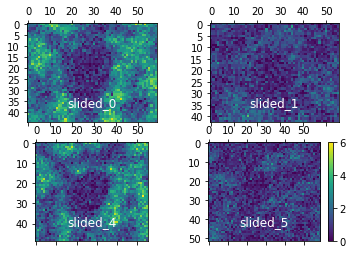

outer     clusterID              gene_ident    gene_mass  gene  protein_mass  \
564  slided_0  mass_9349_548742159543  9349.548742  Hamp     9351.9534   
566  slided_0  mass_9351_057875372868  9351.057875  Hamp     9351.9534   
569  slided_0  mass_9352_567008586193  9352.567009  Hamp     9351.9534   
572  slided_0  mass_9354_076141799516  9354.076142  Hamp     9351.9534   

     avg_logFC        qvalue  num  anum      mean    median  num_bg  anum_bg  \
564  -1.043491  2.362862e-19  144   144  1.758266  1.685693     226      222   
566  -1.077648  3.761369e-20  144   144  1.840906  1.750992     226      224   
569  -1.019985  1.346495e-19  144   143  1.897128  1.776262     226      226   
572  -0.924149  1.909008e-17  144   144  1.867894  1.720382     226      223   

      mean_bg  median_bg  
564  0.853026   0.794075  
566  0.872222   0.788041  
569  0.935514   0.848285  
572  0.984364   0.906984  
inner Empty DataFrame
Columns: [clusterID, gene_ident, gene_mass, gene, protein_mass, a

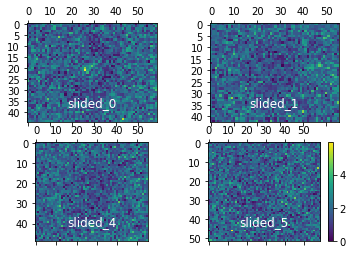

outer Empty DataFrame
Columns: [clusterID, gene_ident, gene_mass, gene, protein_mass, avg_logFC, qvalue, num, anum, mean, median, num_bg, anum_bg, mean_bg, median_bg]
Index: []
inner      clusterID               gene_ident     gene_mass  gene  protein_mass  \
1375  slided_0    mass_15781_4744973475  15781.474497  Hrh4    15783.1757   
1379  slided_0  mass_15782_983630560824  15782.983631  Hrh4    15783.1757   
1383  slided_0   mass_15784_49276377415  15784.492764  Hrh4    15783.1757   
1387  slided_0  mass_15786_001896987473  15786.001897  Hrh4    15783.1757   

      avg_logFC    qvalue  num  anum      mean    median  num_bg  anum_bg  \
1375  -0.761657  0.000003  170   168  0.761512  0.598501     105       96   
1379  -0.801534  0.000002  170   164  0.759867  0.593980     105       97   
1383  -0.752126  0.000008  170   159  0.760279  0.607209     105       97   
1387  -0.683298  0.000030  170   157  0.736947  0.610385     105      101   

       mean_bg  median_bg  
1375  0.449154   

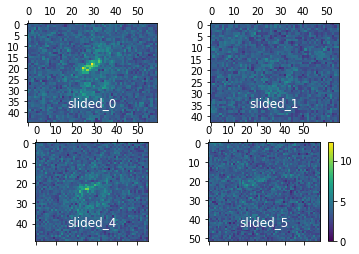

outer Empty DataFrame
Columns: [clusterID, gene_ident, gene_mass, gene, protein_mass, avg_logFC, qvalue, num, anum, mean, median, num_bg, anum_bg, mean_bg, median_bg]
Index: []
inner      clusterID               gene_ident     gene_mass  gene  protein_mass  \
1095  slided_0  mass_15194_421677364367  15194.421677  Igf1    15196.5068   
1100  slided_0   mass_15195_93081057769  15195.930811  Igf1    15196.5068   
1104  slided_0  mass_15197_439943791014  15197.439944  Igf1    15196.5068   
1108  slided_0   mass_15198_94907700434  15198.949077  Igf1    15196.5068   

      avg_logFC        qvalue  num  anum      mean    median  num_bg  anum_bg  \
1095  -0.857234  2.499994e-16  170   170  3.136527  2.555633     105      104   
1100  -0.786968  1.476567e-15  170   170  3.097523  2.569574     105      104   
1104  -0.732650  2.927230e-15  170   170  3.114684  2.586379     105      105   
1108  -0.712086  2.942744e-15  170   170  3.138162  2.618913     105      105   

       mean_bg  median_bg

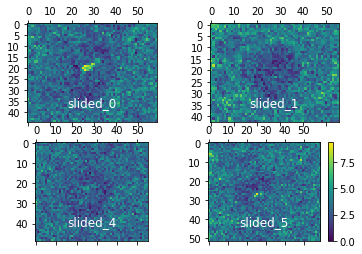

outer      clusterID               gene_ident     gene_mass gene  protein_mass  \
1360  slided_0  mass_15831_275893387201  15831.275893  Il4    15833.3743   
1363  slided_0  mass_15832_785026600524  15832.785027  Il4    15833.3743   
1367  slided_0   mass_15834_29415981385  15834.294160  Il4    15833.3743   
1371  slided_0  mass_15835_803293027173  15835.803293  Il4    15833.3743   

      avg_logFC        qvalue  num  anum      mean    median  num_bg  anum_bg  \
1360  -0.859694  3.352517e-30  144   144  2.104716  2.012963     226      225   
1363  -0.877297  8.664506e-32  144   144  2.228297  2.121577     226      225   
1367  -0.892751  6.968801e-33  144   144  2.332847  2.224490     226      225   
1371  -0.902129  5.806051e-34  144   144  2.441703  2.346080     226      225   

       mean_bg  median_bg  
1360  1.159845   1.148549  
1363  1.213054   1.204778  
1367  1.256439   1.268735  
1371  1.306547   1.284734  
inner      clusterID               gene_ident     gene_mass gene  p

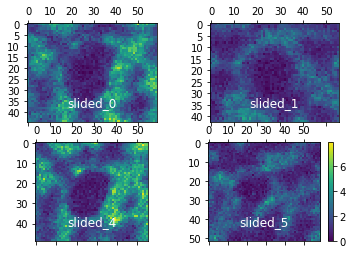

outer      clusterID               gene_ident     gene_mass gene  protein_mass  \
1680  slided_0  mass_18706_174664769896  18706.174665  Lep    18708.4055   
1684  slided_0   mass_18707_68379798322  18707.683798  Lep    18708.4055   
1688  slided_0  mass_18709_192931196547  18709.192931  Lep    18708.4055   
1691  slided_0   mass_18710_70206440987  18710.702064  Lep    18708.4055   

      avg_logFC        qvalue  num  anum      mean    median  num_bg  anum_bg  \
1680  -1.539416  2.094822e-35  144   144  2.921796  2.774181     226      226   
1684  -1.481874  2.651772e-34  144   144  2.797599  2.672751     226      225   
1688  -1.427271  2.692942e-33  144   144  2.659702  2.477178     226      224   
1691  -1.387460  2.886085e-32  144   144  2.499544  2.300837     226      223   

       mean_bg  median_bg  
1680  1.005171   0.913760  
1684  1.001606   0.913279  
1688  0.988967   0.906331  
1691  0.955419   0.900971  
inner Empty DataFrame
Columns: [clusterID, gene_ident, gene_mass, g

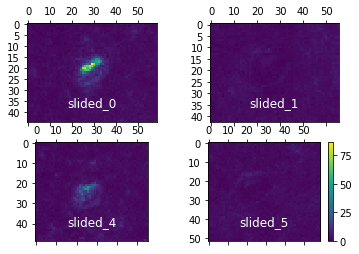

outer      clusterID               gene_ident     gene_mass  gene  protein_mass  \
1250  slided_0  mass_14978_615627858999  14978.615628  Msmp    14981.0579   
1253  slided_0  mass_14980_124761072322  14980.124761  Msmp    14981.0579   

      avg_logFC        qvalue  num  anum      mean    median  num_bg  anum_bg  \
1250  -0.600081  5.925703e-20  144   144  3.313025  3.155271     226      226   
1253  -0.531925  2.965505e-16  144   144  3.356317  3.227828     226      226   

       mean_bg  median_bg  
1250  2.185659   2.016197  
1253  2.321333   2.116522  
inner     clusterID               gene_ident     gene_mass  gene  protein_mass  \
915  slided_0  mass_14978_615627858999  14978.615628  Msmp    14981.0579   
918  slided_0  mass_14980_124761072322  14980.124761  Msmp    14981.0579   
921  slided_0  mass_14981_633894285647  14981.633894  Msmp    14981.0579   
923  slided_0   mass_14983_14302749897  14983.143027  Msmp    14981.0579   

     avg_logFC        qvalue  num  anum       m

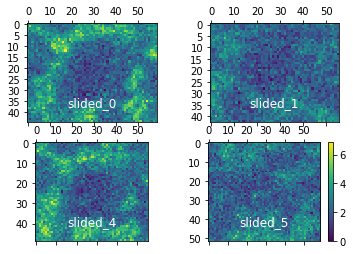

outer      clusterID               gene_ident     gene_mass    gene  protein_mass  \
1131  slided_0  mass_14160_665426237254  14160.665426  Ndufc2     14163.511   
1133  slided_0   mass_14162_17455945058  14162.174559  Ndufc2     14163.511   
1135  slided_0  mass_14163_683692663903  14163.683693  Ndufc2     14163.511   
1136  slided_0  mass_14165_192825877228  14165.192826  Ndufc2     14163.511   

      avg_logFC        qvalue  num  anum      mean    median  num_bg  anum_bg  \
1131  -1.114072  3.148815e-31  144   144  2.126684  1.986769     226      220   
1133  -1.115971  5.181907e-33  144   144  2.400263  2.314656     226      220   
1135  -1.073054  3.644495e-32  144   144  2.502398  2.427581     226      223   
1136  -1.016134  1.153412e-30  144   144  2.530405  2.474334     226      223   

       mean_bg  median_bg  
1131  0.982503   0.972060  
1133  1.107435   1.098001  
1135  1.189419   1.209072  
1136  1.251132   1.274362  
inner Empty DataFrame
Columns: [clusterID, gene_iden

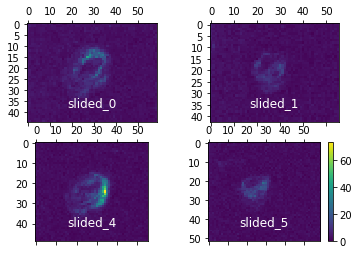

outer     clusterID              gene_ident    gene_mass     gene  protein_mass  \
262  slided_0  mass_8424_450082391777  8424.450082  Pla2g2e     8426.7026   

     avg_logFC    qvalue  num  anum      mean   median  num_bg  anum_bg  \
262   0.552448  0.000002  144   144  2.295329  2.14626     226      225   

      mean_bg  median_bg  
262  3.366265   2.475907  
inner     clusterID              gene_ident    gene_mass     gene  protein_mass  \
263  slided_0  mass_8424_450082391777  8424.450082  Pla2g2e     8426.7026   
265  slided_0  mass_8425_959215605102  8425.959216  Pla2g2e     8426.7026   
268  slided_0  mass_8427_468348818427  8427.468349  Pla2g2e     8426.7026   
271  slided_0   mass_8428_97748203175  8428.977482  Pla2g2e     8426.7026   

     avg_logFC        qvalue  num  anum       mean    median  num_bg  anum_bg  \
263  -0.586311  2.290212e-05  170   170  11.327798  8.797023     105      105   
265  -0.598616  1.357089e-05  170   170   9.356941  7.167438     105      105   

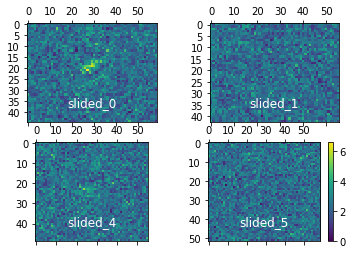

outer Empty DataFrame
Columns: [clusterID, gene_ident, gene_mass, gene, protein_mass, avg_logFC, qvalue, num, anum, mean, median, num_bg, anum_bg, mean_bg, median_bg]
Index: []
inner      clusterID               gene_ident     gene_mass  gene  protein_mass  \
1016  slided_0  mass_15043_508356031942  15043.508356  Tac1    15045.0157   
1018  slided_0  mass_15045_017489245265  15045.017489  Tac1    15045.0157   
1020  slided_0   mass_15046_52662245859  15046.526622  Tac1    15045.0157   

      avg_logFC        qvalue  num  anum      mean    median  num_bg  anum_bg  \
1016  -0.741525  3.261137e-11  170   170  1.434702  1.204358     105      105   
1018  -0.664057  5.351463e-10  170   170  1.428148  1.216188     105      105   
1020  -0.574275  1.601943e-08  170   170  1.421035  1.214097     105      104   

       mean_bg  median_bg  
1016  0.858105   0.800741  
1018  0.901306   0.875430  
1020  0.954401   1.018198  
all Empty DataFrame
Columns: [clusterID, gene_ident, gene_mass, gene, p

In [344]:
for gene in sorted(relgenes):
    
    print(gene)
    #_ = combSpec.mass_heatmap(pw_theo.get_masses_for_protein(gene.capitalize()), scaled=False)
    _ = combSpec.mass_heatmap(pw_theo.get_masses_for_protein(gene.capitalize()), scaled=True)
    
    for rde, rdf in [('outer', mydf), ("inner", mydf_inner), ("all", mydf_all)]:
        print(rde, rdf.loc[rdf.gene == gene.capitalize()])

In [309]:
mydf_all.loc[mydf_all.gene_ident == 'mass_8427_468348818427']

clusterID              gene_ident    gene_mass        gene  protein_mass  \
87  slided_0  mass_8427_468348818427  8427.468349  AC140267.1     8428.7164   
88  slided_0  mass_8427_468348818427  8427.468349        Emc8     8429.9975   
89  slided_0  mass_8427_468348818427  8427.468349     Pla2g2e     8426.7026   

    avg_logFC        qvalue  num  anum      mean    median  num_bg  anum_bg  \
87  -0.511214  2.830754e-11  725   725  5.338555  3.925932     365      362   
88  -0.511214  2.830754e-11  725   725  5.338555  3.925932     365      362   
89  -0.511214  2.830754e-11  725   725  5.338555  3.925932     365      362   

     mean_bg  median_bg  
87  3.745702   2.776078  
88  3.745702   2.776078  
89  3.745702   2.776078

In [334]:
"CCL4" in atheroGenes

False

In [337]:
myDFGenes_outer = set([str(x).upper() for x in mydf_outer["gene"]])

In [338]:
mydf_outer_athero = myDFGenes_outer.intersection(atheroGenes)

In [339]:
len(mydf_outer_athero)
mydf_outer_athero

{'ALOX5AP', 'APOE', 'LEP'}

In [336]:
myDFGenes = set([str(x).upper() for x in mydf["gene"]])

In [230]:
mydf_athero = myDFGenes.intersection(atheroGenes)

In [231]:
len(mydf_athero)

5

In [232]:
myDFGenes_inner = set([str(x).upper() for x in mydf_inner["gene"]])

In [233]:
mydf_inner_athero = myDFGenes_inner.intersection(atheroGenes)

In [234]:
len(mydf_inner_athero)

3

In [209]:
myDFGenes_all = set([str(x).upper() for x in mydf_all["gene"]])

In [235]:
mydf_all_athero = myDFGenes.intersection(atheroGenes)

In [236]:
len(mydf_all_athero)

5

In [238]:
mydf_athero.union(mydf_inner_athero).union(mydf_all_athero)

{'ALOX5AP', 'APOA5', 'APOC3', 'APOE', 'CST3', 'LEP', 'NPY'}